Librerias

In [1]:
import re
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sc
import seaborn as sns
import sklearn as sk
from pandas.plotting import scatter_matrix
from sklearn import tree
from sklearn.ensemble import IsolationForest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import LocalOutlierFactor

warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

Lectura Dataset

In [2]:
from IPython.display import display, HTML


def display_side_by_side(dfs: list, captions: list):
    """Display tables side by side to save vertical space
    Input:
        dfs: list of pandas.DataFrame
        captions: list of table captions
    """
    output = ""
    combined = dict(zip(captions, dfs))
    for caption, df in combined.items():
        output += df.style.set_table_attributes("style='display:inline'").set_caption(caption)._repr_html_()
        output += "\xa0\xa0\xa0"
    display(HTML(output))

In [3]:
complete_dataset = pd.read_csv('properati_argentina_2021.csv')
df = complete_dataset.copy()

### Análisis Exploratorio y Preprocesamiento de Datos

Primero, observaremos un poco los datos que tiene el dataset

**Primeras 5 observaciones**

In [4]:
df.head()

id  start_date    end_date  created_on    latitud  \
0  XZq2dFGxBiboHY3Bo/tqlw==  2021-09-09  2022-01-27  2021-09-09 -38.957632   
1  8afoK+yMH/rnnlYiktwgNA==  2021-09-09  2021-10-23  2021-09-09 -34.888878   
2  iVaG5rBB47dd1Ya4BMXREA==  2021-09-09  2022-03-09  2021-09-09 -32.488717   
3  QE1QVMWKAHWkd0qT0FtPWA==  2021-09-09  2022-01-27  2021-09-09 -34.900165   
4  tJ5lSk7IysG/71OGhacNZA==  2021-09-09  2022-01-27  2021-09-09 -38.954528   

    longitud    place_l2 place_l3 place_l4 place_l5  place_l6 operation  \
0 -68.105443     Neuquén      NaN      NaN      NaN       NaN     Venta   
1 -56.092368  Montevideo      NaN      NaN      NaN       NaN     Venta   
2 -58.257499  Entre Ríos      NaN      NaN      NaN       NaN     Venta   
3 -54.808453   Maldonado      NaN      NaN      NaN       NaN     Venta   
4 -68.041862     Neuquén      NaN      NaN      NaN       NaN     Venta   

  property_type  property_rooms  property_bedrooms  property_surface_total  \
0          Casa             6.0                NaN                     NaN   
1          Casa             4.0                3.0                   193.0   
2          Casa             NaN                NaN                   110.0   
3          Casa             NaN                3.0                     NaN   
4            PH             3.0                2.0                     NaN   

   property_surface_covered  property_price property_currency  \
0                     206.0             NaN               NaN   
1                     193.0        390000.0               USD   
2                      45.0         47000.0               USD   
3                     180.0        400000.0               USD   
4                      98.0        102000.0               USD   

       property_title  
0      Casa - Capital  
1       Casa - Malvín  
2      Casa - Uruguay  
3    Casa - El Chorro  
4  PH - Villa Farrell

**Ultimas 5 observaciones**

In [5]:
df.tail()

id  start_date    end_date  created_on  \
460149  EWHC/xcODFkeEA0+pPE6Rw==  2021-01-05  2021-01-08  2021-01-05   
460150  txKUq0LjMaORjJQeeqTOfw==  2021-01-05  2021-11-01  2021-01-05   
460151  E0zwHT18DX8AxhU22hXgng==  2021-01-05  2021-03-01  2021-01-05   
460152  Ec4Tvy/WX5f6RgfaJf2FHQ==  2021-01-05  2021-11-28  2021-01-05   
460153  Y7KBafQ+e5noGh2Pio0xLg==  2021-01-05  9999-12-31  2021-01-05   

          latitud   longitud                  place_l2               place_l3  \
460149 -34.599594 -58.588715  Bs.As. G.B.A. Zona Oeste        Tres de Febrero   
460150 -34.582777 -58.545220  Bs.As. G.B.A. Zona Norte     General San Martín   
460151        NaN        NaN  Bs.As. G.B.A. Zona Norte     General San Martín   
460152 -33.226234 -60.331848                  Santa Fe     Villa Constitución   
460153 -26.827938 -65.220708                   Tucumán  San Miguel de Tucumán   

           place_l4 place_l5  place_l6 operation    property_type  \
460149          NaN      NaN       NaN     Venta  Local comercial   
460150  Villa Lynch      NaN       NaN     Venta  Local comercial   
460151          NaN      NaN       NaN     Venta  Local comercial   
460152          NaN      NaN       NaN  Alquiler  Local comercial   
460153          NaN      NaN       NaN     Venta  Local comercial   

        property_rooms  property_bedrooms  property_surface_total  \
460149             NaN                NaN                   113.0   
460150             NaN                NaN                 11580.0   
460151             NaN                NaN                   915.0   
460152             NaN                NaN                     NaN   
460153             1.0                NaN                   243.0   

        property_surface_covered  property_price property_currency  \
460149                     113.0        190000.0               USD   
460150                   11580.0       3500000.0               USD   
460151                     915.0        800000.0               USD   
460152                      15.0             NaN               NaN   
460153                     133.0        160000.0               USD   

                                           property_title  
460149   LOCAL COMERCIAL MAS DE 100 MTS. - Ciudad jardín-  
460150                      Nave Industrial - Villa Lynch  
460151  importante edificio comercial en tres plantas ...  
460152                         Local - Villa Constitucion  
460153                      Local - San Miguel De Tucumán

**Filas y Columnas**

In [6]:
print(f"El dataset tiene {df.shape[0]} filas y {df.shape[1]} columnas")

El dataset tiene 460154 filas y 20 columnas


**Metrica del dataset**

In [7]:
df.describe()

latitud       longitud  place_l6  property_rooms  \
count  419740.000000  419740.000000       0.0   368498.000000   
mean      -34.228570     -59.557066       NaN        3.278053   
std         3.251509       2.905129       NaN        1.870832   
min       -54.832057    -103.219258       NaN        1.000000   
25%       -34.640132     -58.899343       NaN        2.000000   
50%       -34.585122     -58.488309       NaN        3.000000   
75%       -34.423414     -58.404876       NaN        4.000000   
max        42.557773     -35.044991       NaN       40.000000   

       property_bedrooms  property_surface_total  property_surface_covered  \
count      344113.000000           397813.000000              4.279160e+05   
mean            2.297960              420.601250              9.605005e+03   
std             1.673985             4026.380748              3.440367e+06   
min            -3.000000               -1.000000             -3.000000e+00   
25%             1.000000               50.000000              4.500000e+01   
50%             2.000000               90.000000              7.800000e+01   
75%             3.000000              210.000000              1.700000e+02   
max           390.000000           200000.000000              2.147484e+09   

       property_price  
count    4.421530e+05  
mean     3.063273e+05  
std      4.899613e+06  
min      0.000000e+00  
25%      4.490000e+04  
50%      9.800000e+04  
75%      1.990000e+05  
max      1.500000e+09

**Tipos de datos**

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460154 entries, 0 to 460153
Data columns (total 20 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        460154 non-null  object 
 1   start_date                460154 non-null  object 
 2   end_date                  460154 non-null  object 
 3   created_on                460154 non-null  object 
 4   latitud                   419740 non-null  float64
 5   longitud                  419740 non-null  float64
 6   place_l2                  460154 non-null  object 
 7   place_l3                  437665 non-null  object 
 8   place_l4                  139020 non-null  object 
 9   place_l5                  2430 non-null    object 
 10  place_l6                  0 non-null       float64
 11  operation                 460154 non-null  object 
 12  property_type             460154 non-null  object 
 13  property_rooms            368498 non-null  f

**Descripción de las columnas**

- type - Tipo de aviso (Propiedad, Desarrollo/Proyecto).
- country - País en el que está publicado el aviso (Argentina, Uruguay, Colombia, Ecuador, Perú)
- id - Identificador del aviso. No es único: si el aviso es actualizado por la inmobiliaria (nueva versión del aviso) se crea un nuevo registro con la misma id pero distintas fechas: de alta y de baja.
- start_date - Fecha de alta del aviso.
- end_date - Fecha de baja del aviso.
- created_on - Fecha de alta de la primera versión del aviso.
- place - Campos referidos a la ubicación de la propiedad o del desarrollo.

   - lat - Latitud.

   - lon - Longitud.

   - l1 - Nivel administrativo 1: país.

   - l2 - Nivel administrativo 2: usualmente provincia.

   - l3 - Nivel administrativo 3: usualmente ciudad.

   - l4 - Nivel administrativo 4: usualmente barrio.
- property - Campos relativos a la propiedad (vacío si el aviso es de un desarrollo/proyecto).

   - operation - Tipo de operación (Venta, Alquiler).

   - type - Tipo de propiedad (Casa, Departamento, PH).

   - rooms - Cantidad de ambientes (útil en Argentina).

   - bedrooms - Cantidad de dormitorios (útil en el resto de los países).

   - bathrooms - Cantidad de baños.

   - surface_total - Superficie total en m².

   - surface_covered - Superficie cubierta en m².

   - price - Precio publicado en el anuncio.

   - currency - Moneda del precio publicado.

   - price_period - Periodo del precio (Diario, Semanal, Mensual)

   - title - Título del anuncio.

   - description - Descripción del anuncio.
- development - Campos relativos al desarrollo inmobiliario (vacío si el aviso es de una propiedad).
- status - Estado del desarrollo (Terminado, En construcción, ...)
- name - Nombre del desarrollo.
- short_description - Descripción corta del anuncio.
- description - Descripción del anuncio.


### Filtrado inicial del Dataset

In [9]:
df_tipo_vivienda = df[(df.property_type == "Casa") | (df.property_type == "PH") | (df.property_type == "Departamento")]
df_por_ubicacion = df_tipo_vivienda[
    (df_tipo_vivienda.place_l2 == "Capital Federal") | (df_tipo_vivienda.place_l3 == "Capital Federal")]
df_cotizacion_usd = df_por_ubicacion[df_por_ubicacion.property_currency == "USD"]
ds_filtrado = df_cotizacion_usd[df_cotizacion_usd.operation == "Venta"]

ds_filtrado[["place_l2", "place_l3", "property_currency", "property_type", "operation"]].head()

place_l2 place_l3 property_currency property_type operation
25  Capital Federal      NaN               USD          Casa     Venta
42  Capital Federal     Boca               USD  Departamento     Venta
43  Capital Federal     Boca               USD  Departamento     Venta
49  Capital Federal     Once               USD  Departamento     Venta
51  Capital Federal    Boedo               USD            PH     Venta

#### Tipos de variable

In [10]:
categoricas = ['created_on', 'start_date', 'end_date', 'place_l2', 'place_l3', 'place_l4', 'place_l5', 'place_l6',
               'operation', 'property_type', 'property_currency', 'property_title']
cuantitativas_discretas = ['property_rooms', 'property_bedrooms', 'property_surface_total', 'property_surface_covered',
                           None, None, None, None, None, None, None, None]
cuantitativas_continuas = ['latitud', 'longitud', 'property_price', None, None, None, None, None, None, None, None,
                           None]
ordinales = [None, None, None, None, None, None, None, None, None, None, None, None]
tipos_de_variable = {'Categoricas': categoricas, 'Ordinales': ordinales,
                     'Cuantitativas Discretas': cuantitativas_discretas,
                     'Cuantitativas Continuas': cuantitativas_discretas}

cuantitativas = cuantitativas_discretas + cuantitativas_continuas

pd.DataFrame(tipos_de_variable)

Categoricas Ordinales   Cuantitativas Discretas  \
0          created_on      None            property_rooms   
1          start_date      None         property_bedrooms   
2            end_date      None    property_surface_total   
3            place_l2      None  property_surface_covered   
4            place_l3      None                      None   
5            place_l4      None                      None   
6            place_l5      None                      None   
7            place_l6      None                      None   
8           operation      None                      None   
9       property_type      None                      None   
10  property_currency      None                      None   
11     property_title      None                      None   

     Cuantitativas Continuas  
0             property_rooms  
1          property_bedrooms  
2     property_surface_total  
3   property_surface_covered  
4                       None  
5                       None  
6                       None  
7                       None  
8                       None  
9                       None  
10                      None  
11                      None

**Separacion en Train y Test**

Separamos el dataset.

Datos de entrenamiento = 80%

Datos de Testing = 20%

Con el 80% entrenaremos a los modelos y con el 20% testearemos que los modelos estén funcionando como se espera.

Realizamos la separación antes de comenzar a trabajar con los datos para que durante la etapa de entrenamiento no se conozcan los mismo ya que luego se usarán para testear y así se podrá predecir de forma adecuada.

In [11]:
from sklearn.model_selection import train_test_split

ds_train, ds_test = train_test_split(ds_filtrado, test_size=0.2)

In [12]:
dias = pd.to_datetime(ds_train[ds_train.end_date != '9999-12-31']['end_date']) - pd.to_datetime(
    ds_train[ds_train.end_date != '9999-12-31']['start_date'])
dias.describe()

count                         71361
mean     74 days 07:43:19.924328415
std      83 days 23:23:43.365106806
min                 0 days 00:00:00
25%                16 days 00:00:00
50%                51 days 00:00:00
75%                99 days 00:00:00
max               618 days 00:00:00
dtype: object

In [13]:
ds_train.loc[ds_train.end_date == '9999-12-31', 'end_date'] = pd.to_datetime(
    ds_train[ds_train.end_date == '9999-12-31']['start_date']) + dias.mean()
ds_train.end_date

354662                       2021-05-01
436534    2021-11-07 07:43:19.924328415
303074                       2021-10-14
102759                       2021-06-03
415231                       2021-09-26
                      ...              
12671                        2021-10-03
167893                       2021-05-01
284368                       2021-05-10
215843                       2022-01-27
408447                       2021-03-08
Name: end_date, Length: 75399, dtype: object

In [14]:
## Train
new_ds = ds_train.copy()
new_ds.start_date = pd.to_datetime(new_ds.start_date, infer_datetime_format=True)
new_ds.end_date = pd.to_datetime(new_ds.end_date, infer_datetime_format=True)
new_ds.created_on = pd.to_datetime(new_ds.created_on, infer_datetime_format=True)
ds_train = new_ds.copy()
ds_train.dtypes

## Test
new_test_ds = ds_test.copy()
new_test_ds.start_date = pd.to_datetime(ds_train.start_date, infer_datetime_format=True)
new_test_ds.end_date = pd.to_datetime(ds_train.end_date, infer_datetime_format=True)
new_test_ds.created_on = pd.to_datetime(ds_train.created_on, infer_datetime_format=True)
ds_test = new_test_ds.copy()
ds_test.dtypes

id                                  object
start_date                  datetime64[ns]
end_date                    datetime64[ns]
created_on                  datetime64[ns]
latitud                            float64
longitud                           float64
place_l2                            object
place_l3                            object
place_l4                            object
place_l5                            object
place_l6                           float64
operation                           object
property_type                       object
property_rooms                     float64
property_bedrooms                  float64
property_surface_total             float64
property_surface_covered           float64
property_price                     float64
property_currency                   object
property_title                      object
dtype: object

#### Variables Cuantitativas: medidas de resumen

In [15]:
# Variables Cuantitativas: calcular medidas de resumen: media, mediana, q1, q3, moda
cuantitativas_filtradas = list(filter(lambda element: element != None, cuantitativas))
description_quantitatives = ds_train[cuantitativas_filtradas].describe()

quantitative_mode = ds_train[cuantitativas_filtradas].mode()
quantitative_mode.rename(index={0: "mode"}, inplace=True)
description_quantitatives = description_quantitatives.append(quantitative_mode)

description_quantitatives.rename(index={"25%": "quartile 1", "50%": "median", "75%": "quartile 3"}, inplace=True)
description_quantitatives

property_rooms  property_bedrooms  property_surface_total  \
count         74559.000000       66533.000000            71491.000000   
mean              2.817487           2.014489              108.474675   
std               1.421612           1.141061             1035.522878   
min               1.000000          -1.000000               10.000000   
quartile 1        2.000000           1.000000               45.000000   
median            3.000000           2.000000               65.000000   
quartile 3        4.000000           3.000000              104.000000   
max              36.000000          70.000000           137000.000000   
mode              3.000000           1.000000               50.000000   

            property_surface_covered       latitud      longitud  \
count                   72727.000000  72405.000000  72405.000000   
mean                       85.756060    -34.591677    -58.450018   
std                       735.982099      0.176327      0.293232   
min                         1.000000    -53.788624    -71.471192   
quartile 1                 40.000000    -34.616038    -58.466601   
median                     57.000000    -34.595857    -58.439019   
quartile 3                 88.000000    -34.577490    -58.408870   
max                    123000.000000    -24.219827    -54.133330   
mode                       40.000000    -34.541250    -58.472966   

            property_price  
count         7.539900e+04  
mean          2.252914e+05  
std           3.130599e+05  
min           5.000000e+03  
quartile 1    9.500000e+04  
median        1.430000e+05  
quartile 3    2.350000e+05  
max           1.200000e+07  
mode          1.100000e+05

#### Variables Cualitativas mostrar cantidad de valores posibles, y frecuencias de cada uno.


In [16]:
qualitative_dataset = ds_train[categoricas]

dfs = list(
    pd.DataFrame(qualitative_dataset[column].value_counts().head()) for column in qualitative_dataset.columns.tolist())
display_side_by_side(dfs, qualitative_dataset.columns.tolist())

#### Análisis gráfico de las distribuciones de las variables

**Distribución de fechas**

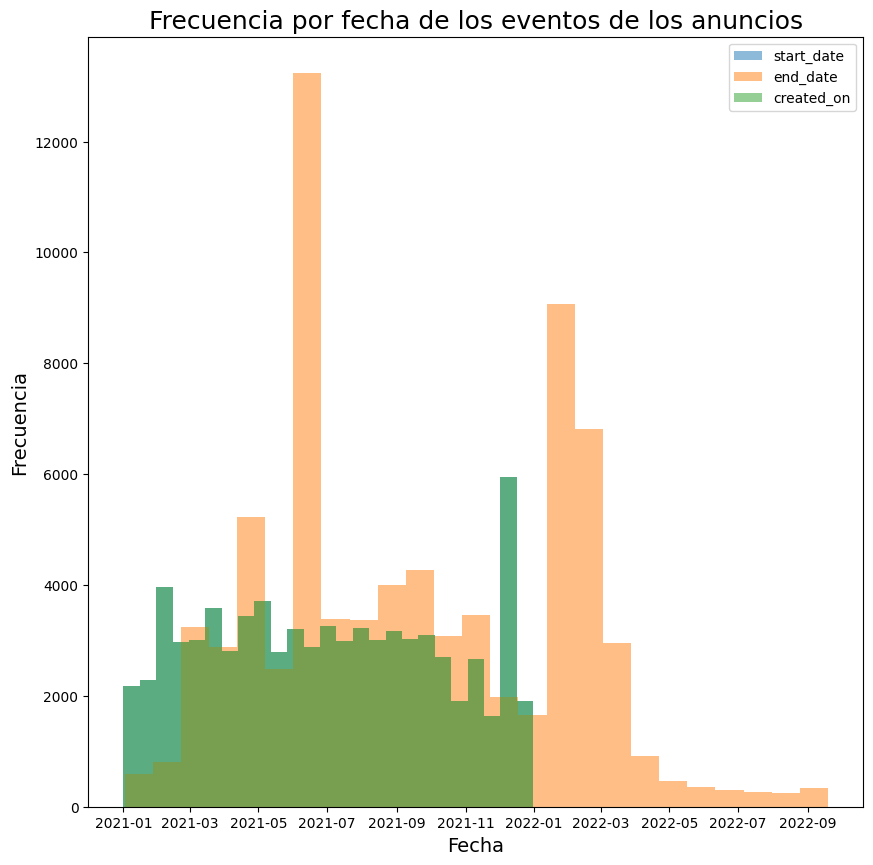

In [17]:
plt.figure(figsize=(10, 10))
plt.hist(ds_train.start_date, bins=25, alpha=0.5, label="start_date")
plt.hist(ds_train.end_date, bins=25, alpha=0.5, label="end_date")
plt.hist(ds_train.created_on, bins=25, alpha=0.5, label="created_on")
plt.xlabel("Fecha", size=14)
plt.ylabel("Frecuencia", size=14)
plt.title("Frecuencia por fecha de los eventos de los anuncios", size=18)
plt.legend(loc='upper right')

**Distribución de barrios**

In [18]:
top25 = ds_train['place_l3'].value_counts().head(25)

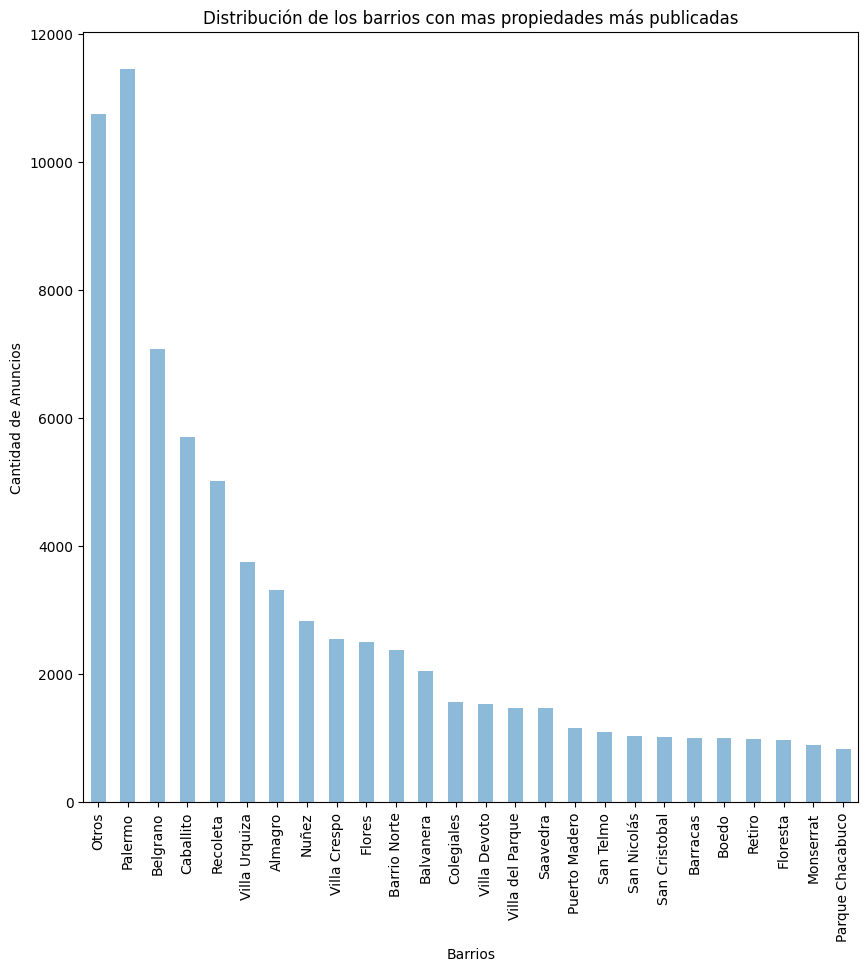

In [19]:
ds_otros_barrios = ds_train[~ds_train['place_l3'].isin(
    top25.index)]  # tomamos solo con las observaciones que no pertenecen al top 25 de barrios
frecuencia_otras = ds_otros_barrios.shape[0]
otras = pd.Series(data=[frecuencia_otras], index=["Otros"])
distribucion_por_barrios = pd.concat([otras, top25])

ax = distribucion_por_barrios.plot.bar(alpha=0.5,
                                       title="Distribución de los barrios con mas propiedades más publicadas",
                                       xlabel="Barrios", ylabel="Cantidad de Anuncios", figsize=(10, 10))

**Distribución de tipos de propiedad**

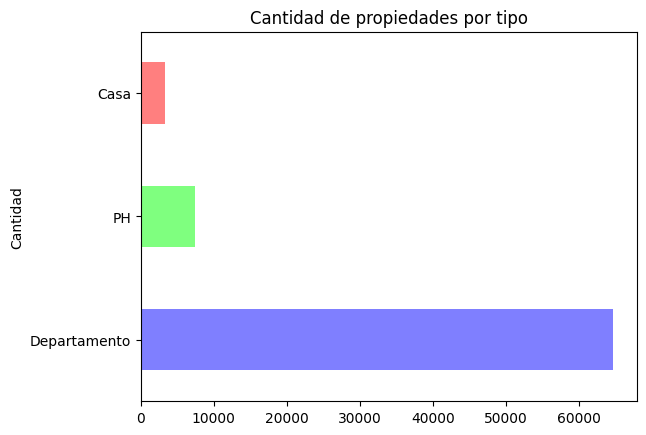

In [20]:
colores = [(0, 0, 1), (0, 1, 0), (1, 0, 0)]
grf = ds_train['property_type'].value_counts().plot.barh(alpha=0.5, color=colores,
                                                         title="Cantidad de propiedades por tipo", ylabel="Cantidad")

**Distribución de latitud y longitud**

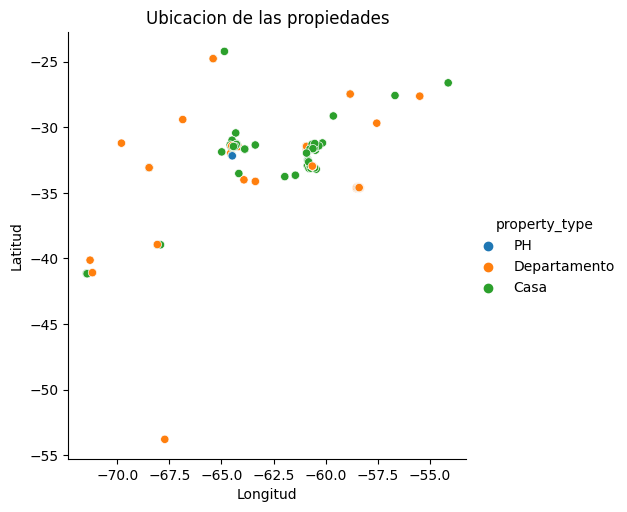

In [21]:

sns.relplot(data=ds_train, x="longitud", y="latitud", hue="property_type").set(title="Ubicacion de las propiedades",
                                                                               xlabel='Longitud', ylabel='Latitud')

**Distribución de habitaciones y baños**

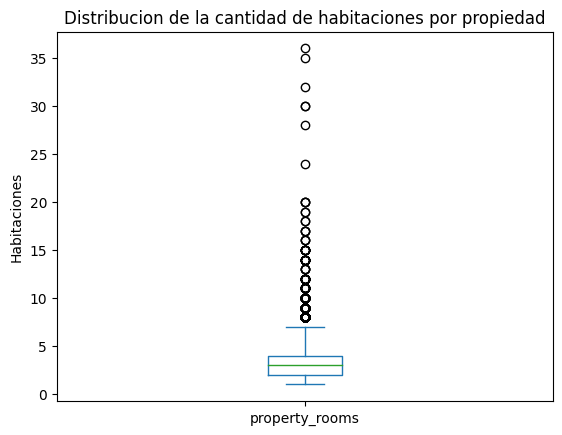

In [22]:
grf = ds_train.property_rooms.plot.box(title="Distribucion de la cantidad de habitaciones por propiedad",
                                       ylabel="Habitaciones")

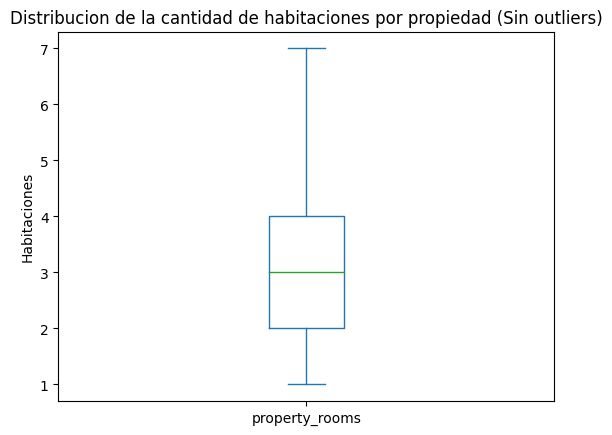

In [23]:
q1 = ds_train.property_rooms.quantile(q=0.25)
q3 = ds_train.property_rooms.quantile(q=0.75)
iqr = q3 - q1
max = q3 + (iqr * 1.5)

property_rooms_filtrado = ds_train[ds_train.property_rooms <= max].property_rooms
grf = property_rooms_filtrado.plot.box(title="Distribucion de la cantidad de habitaciones por propiedad (Sin outliers)",
                                       ylabel="Habitaciones")

<AxesSubplot: title={'center': 'Distribucion de la cantidad de baños por propiedad'}, ylabel='Baños'>

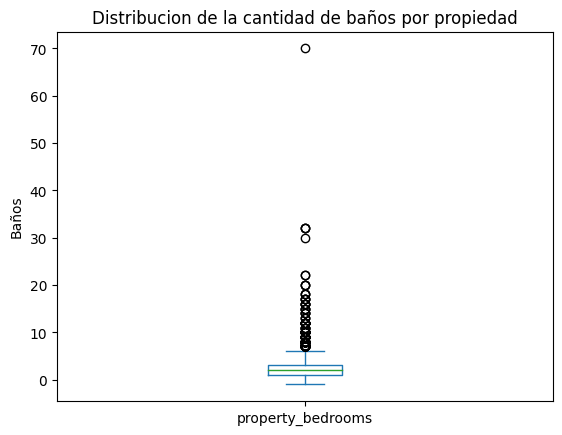

In [24]:
ds_train.property_bedrooms.plot.box(title="Distribucion de la cantidad de baños por propiedad", ylabel="Baños")


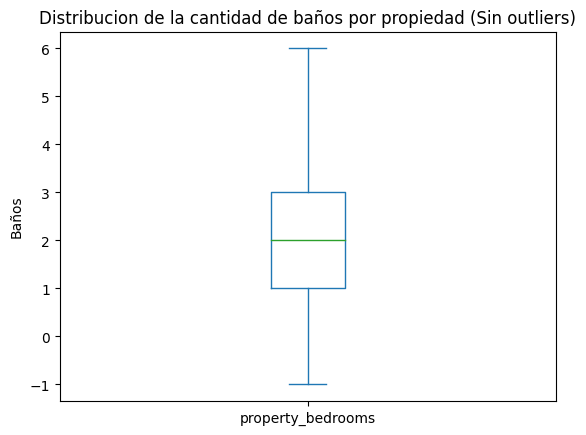

In [25]:
q1 = ds_train.property_rooms.quantile(q=0.25)
q3 = ds_train.property_rooms.quantile(q=0.75)
iqr = q3 - q1
max = q3 + (iqr * 1.5)

property_bedrooms_filtrado = ds_train[ds_train.property_bedrooms < max].property_bedrooms
grf = property_bedrooms_filtrado.plot.box(title="Distribucion de la cantidad de baños por propiedad (Sin outliers)",
                                          xlabel=" ", ylabel="Baños")

**Distribución de precio**

In [26]:
print(f"La mediana del precio es: {ds_train.property_price.median()}")

La mediana del precio es: 143000.0


<AxesSubplot: title={'center': 'Distribucion de los precios de las propiedades'}, ylabel='Rango de precios'>

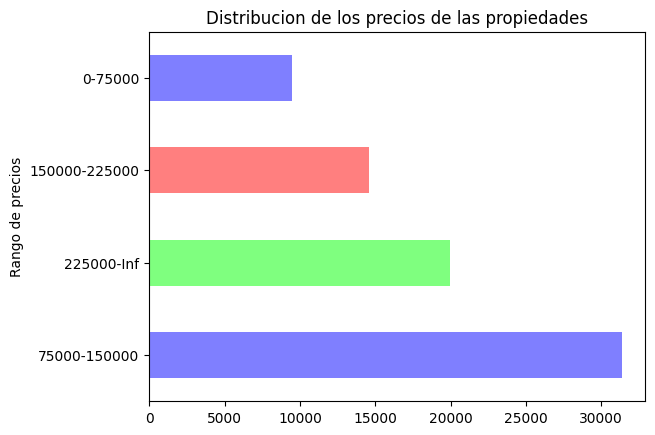

In [27]:
# Tomamos valores alrededor de la mediana
property_price_grouped = pd.cut(ds_train.property_price, bins=[0, 75000, 150000, 225000, float("inf")],
                                labels=["0-75000", "75000-150000", "150000-225000", "225000-Inf"], include_lowest=True)
property_price_grouped.value_counts().plot.barh(alpha=0.5, color=colores,
                                                title="Distribucion de los precios de las propiedades",
                                                xlabel="Rango de precios", ylabel="Frecuencia")

**Distribución de superficie total y cubierta**

<AxesSubplot: >

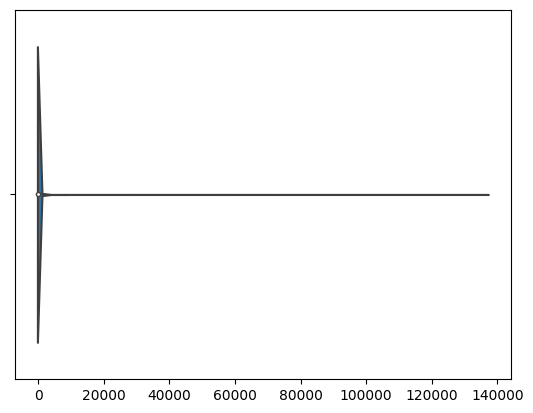

In [28]:
sns.violinplot(ds_train.property_surface_total.values)

<AxesSubplot: >

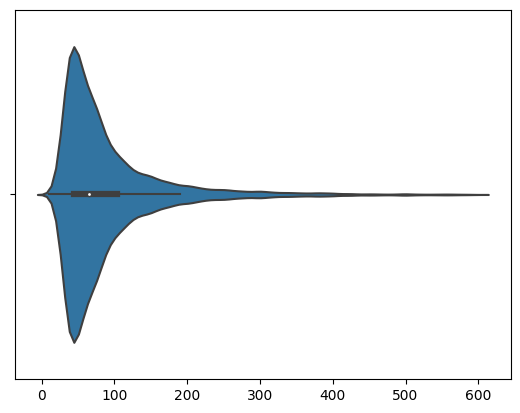

In [29]:
ds_surface_sin_outliers = ds_train[ds_train.property_surface_total < 600]
sns.violinplot(ds_surface_sin_outliers.property_surface_total.values)

<AxesSubplot: >

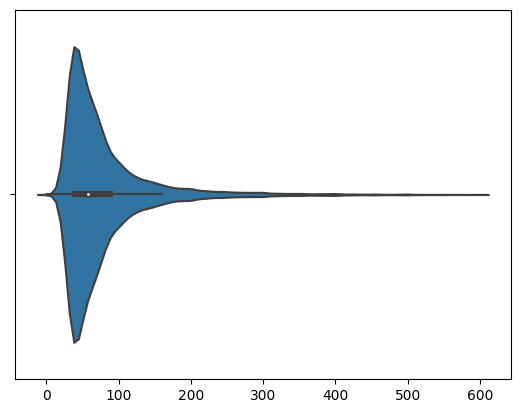

In [30]:
ds_surface_covered_sin_outliers = ds_train[ds_train.property_surface_covered < 600]
sns.violinplot(ds_surface_covered_sin_outliers.property_surface_covered.values)

#### Correlación entre variables

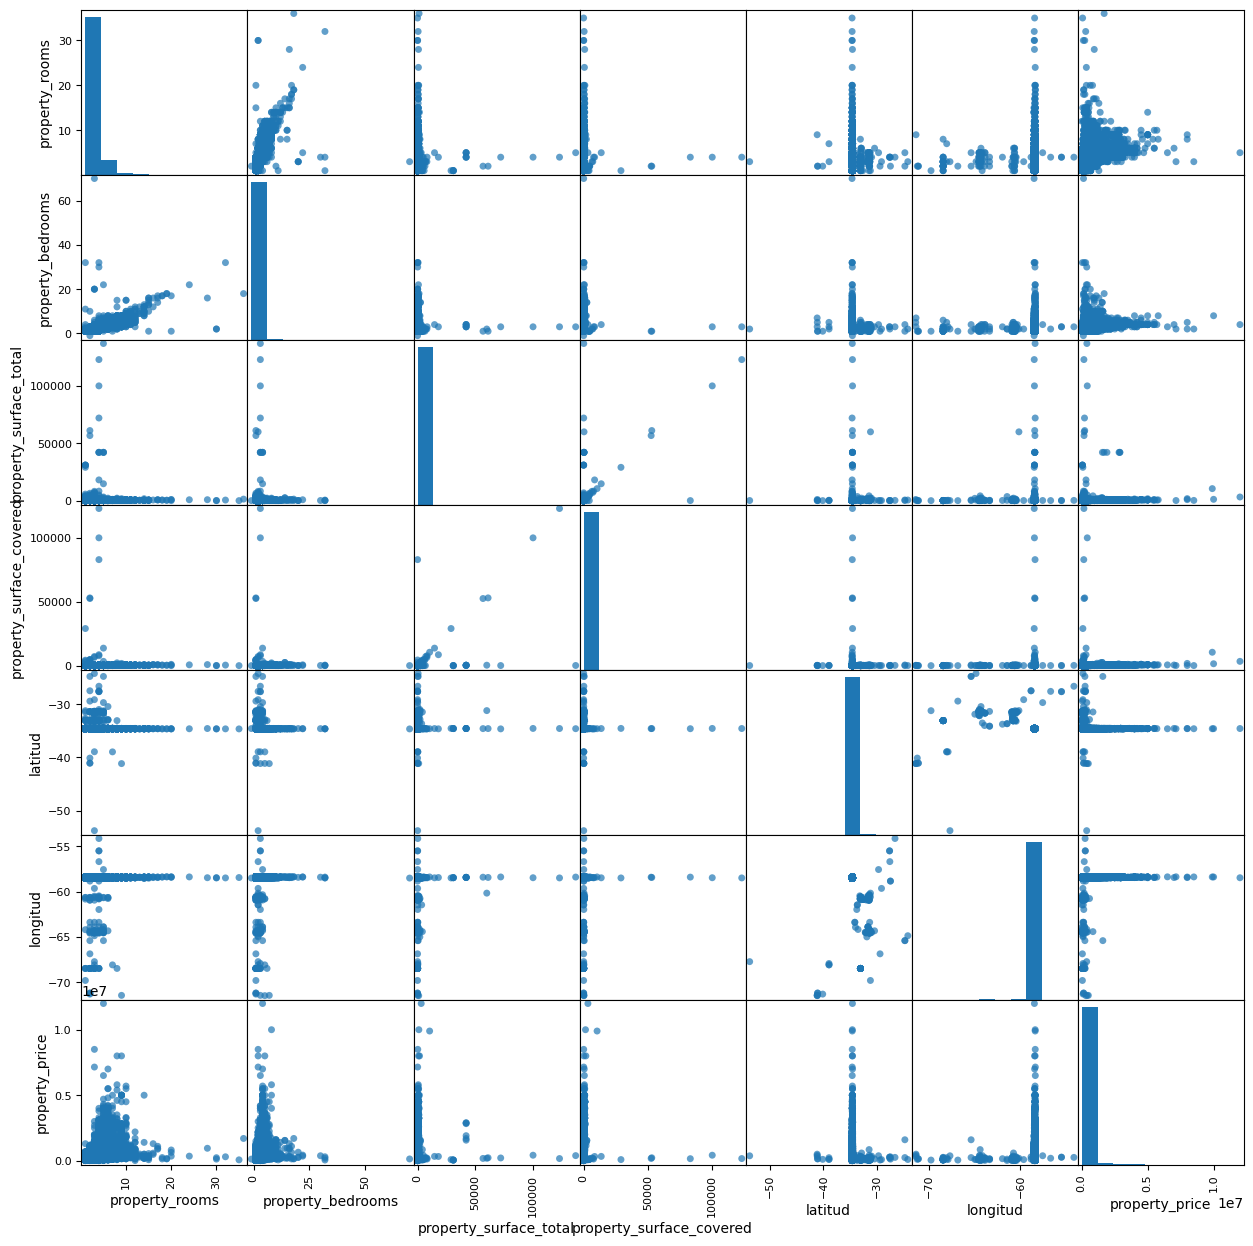

In [31]:
quantitative_dataset = ds_train[cuantitativas_filtradas]
ax = scatter_matrix(quantitative_dataset, alpha=0.7, figsize=(15, 15), s=100)

In [32]:
correlations = quantitative_dataset.corr()
correlations

property_rooms  property_bedrooms  \
property_rooms                  1.000000           0.868247   
property_bedrooms               0.868247           1.000000   
property_surface_total          0.065672           0.064191   
property_surface_covered        0.071481           0.071255   
latitud                         0.002868           0.000164   
longitud                       -0.008181          -0.006715   
property_price                  0.500220           0.419935   

                          property_surface_total  property_surface_covered  \
property_rooms                          0.065672                  0.071481   
property_bedrooms                       0.064191                  0.071255   
property_surface_total                  1.000000                  0.607268   
property_surface_covered                0.607268                  1.000000   
latitud                                 0.026781                  0.003670   
longitud                               -0.014137                 -0.001272   
property_price                          0.084513                  0.078985   

                           latitud  longitud  property_price  
property_rooms            0.002868 -0.008181        0.500220  
property_bedrooms         0.000164 -0.006715        0.419935  
property_surface_total    0.026781 -0.014137        0.084513  
property_surface_covered  0.003670 -0.001272        0.078985  
latitud                   1.000000 -0.245103        0.017661  
longitud                 -0.245103  1.000000        0.024695  
property_price            0.017661  0.024695        1.000000

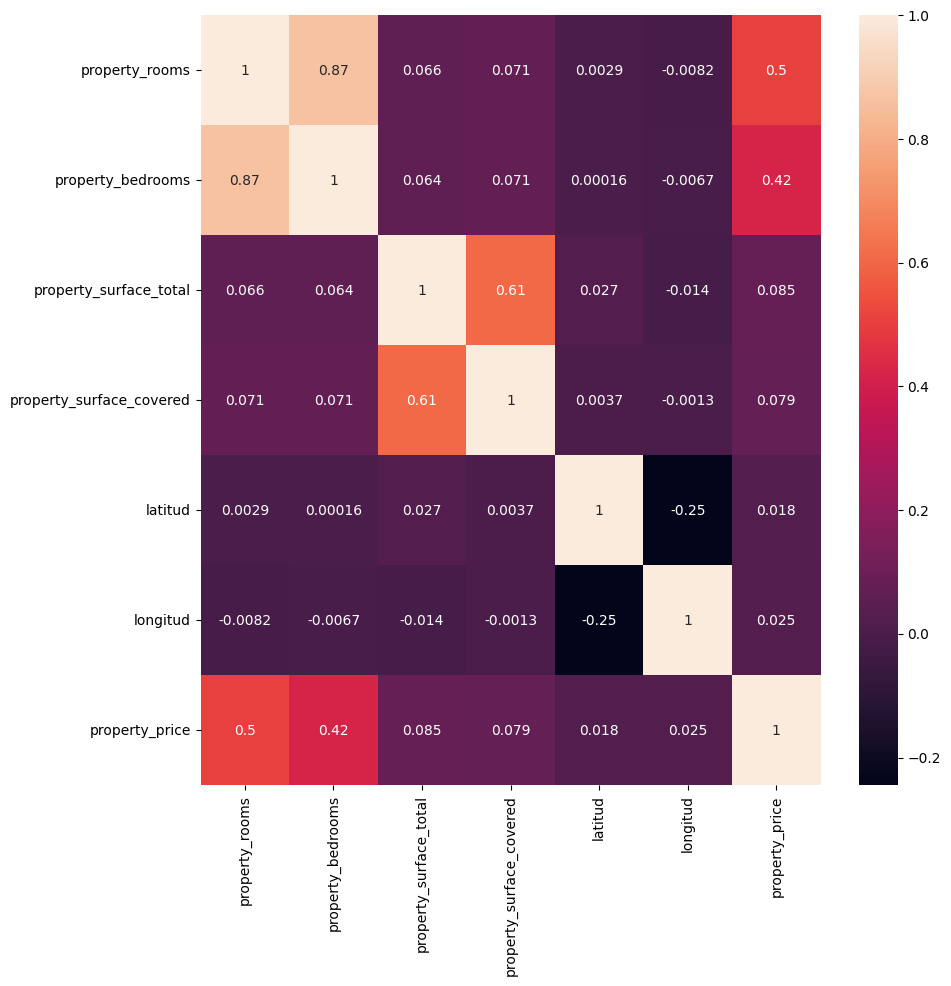

In [33]:
plt.figure(figsize=(10, 10))
ax = sns.heatmap(quantitative_dataset.corr(), annot=True)

In [34]:
posible_correlations = [('property_rooms', 'property_bedrooms'), ('property_price', 'property_bedrooms'),
                        ('property_price', 'property_rooms'), ('property_surface_total', 'property_surface_covered'),
                        ('longitud', 'latitud')]
for corr in posible_correlations:
    print(f"Entre {corr[0]} y {corr[1]}:{round(correlations.loc[corr[0], corr[1]], 2)}")

Entre property_rooms y property_bedrooms:0.87
Entre property_price y property_bedrooms:0.42
Entre property_price y property_rooms:0.5
Entre property_surface_total y property_surface_covered:0.61
Entre longitud y latitud:-0.25


### Análisis de valores faltantes

#### Porcentaje de valores faltantes por columna

id                            0.000000
start_date                    0.000000
end_date                      0.000000
created_on                    0.000000
latitud                       3.970875
longitud                      3.970875
place_l2                      0.000000
place_l3                      0.449608
place_l4                     96.119312
place_l5                    100.000000
place_l6                    100.000000
operation                     0.000000
property_type                 0.000000
property_rooms                1.114073
property_bedrooms            11.758777
property_surface_total        5.183093
property_surface_covered      3.543814
property_price                0.000000
property_currency             0.000000
property_title                0.000000
dtype: float64


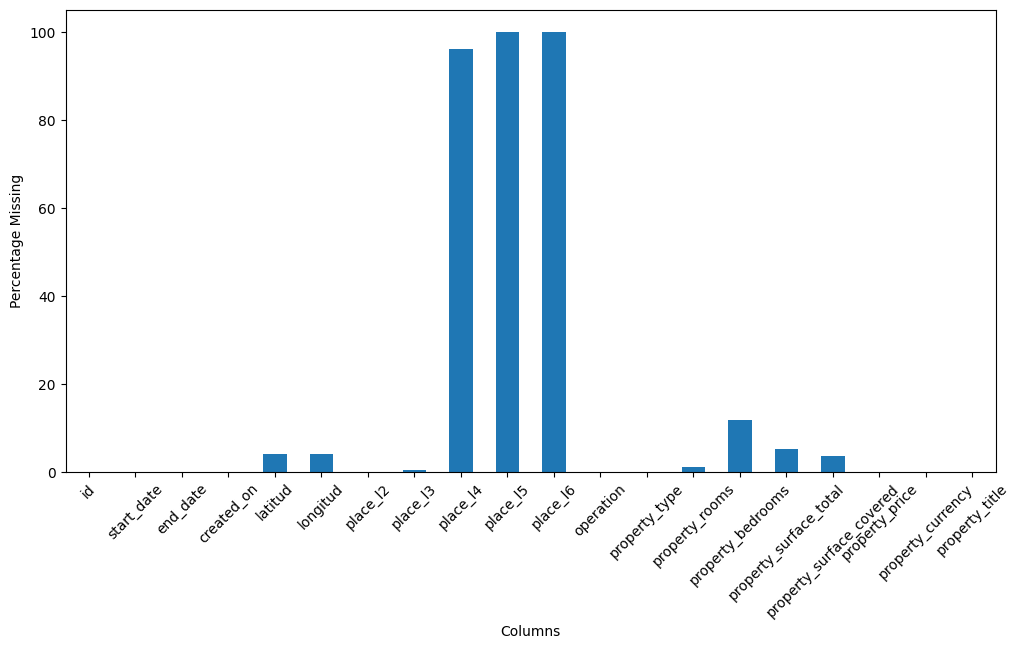

In [35]:
percent_missing = ds_train.isna().sum() * 100 / len(ds_train)
plt.figure(figsize=(12, 6))
percent_missing.plot.bar(x='index', rot=45)
plt.xlabel("Columns")
plt.ylabel("Percentage Missing")
rows = ds_train.shape[0]
print(ds_train.isna().sum() / rows * 100)

#### Porcentaje de datos faltantes por fila

<AxesSubplot: >

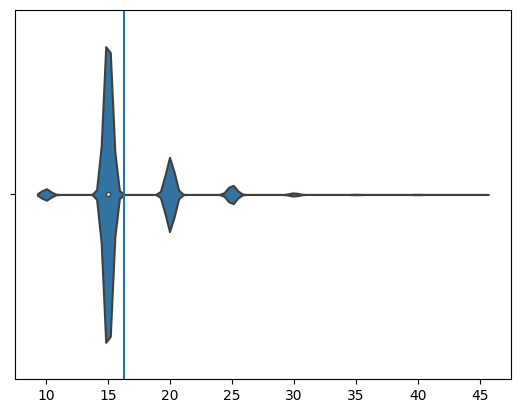

In [36]:
column_count = ds_train.shape[1]
ds_plot = ds_train.T.isna().sum() * 100 / column_count

plt.axvline(ds_plot.mean())
sns.violinplot(ds_plot.values)

In [37]:
def plot_missing_by_column(dataset):
    percent_missing = dataset.isna().sum() * 100 / len(dataset)
    plt.figure(figsize=(12, 6))
    percent_missing.plot.bar(x='index', rot=45)
    plt.xlabel("Columns")
    plt.ylabel("Percentage Missing")
    rows = dataset.shape[0]
    print(dataset.isna().sum() / rows * 100)

id                            0.000000
start_date                    0.000000
end_date                      0.000000
created_on                    0.000000
latitud                       3.970875
longitud                      3.970875
place_l2                      0.000000
place_l3                      0.449608
place_l4                     96.119312
place_l5                    100.000000
place_l6                    100.000000
operation                     0.000000
property_type                 0.000000
property_rooms                1.114073
property_bedrooms            11.758777
property_surface_total        5.183093
property_surface_covered      3.543814
property_price                0.000000
property_currency             0.000000
property_title                0.000000
dtype: float64


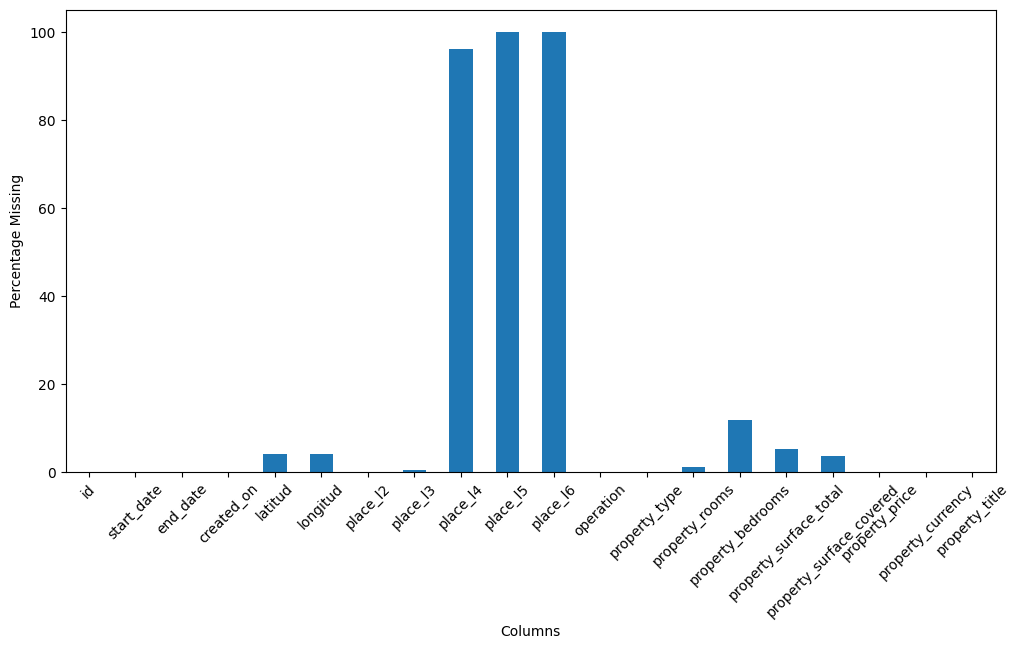

In [38]:
plot_missing_by_column(ds_train)

In [39]:
## Train

ds_train = ds_train.drop(['created_on', 'place_l2', 'place_l4', 'place_l5', 'place_l6', 'operation', 'property_currency'], axis=1)

## Test
ds_test = ds_test.drop(['created_on', 'place_l2', 'place_l4', 'place_l5', 'place_l6', 'operation', 'property_currency'], axis=1)

### Reparacion de datos faltantes

**Pre Imputacion de latitud y longitud**

latitud    3.970875
dtype: float64


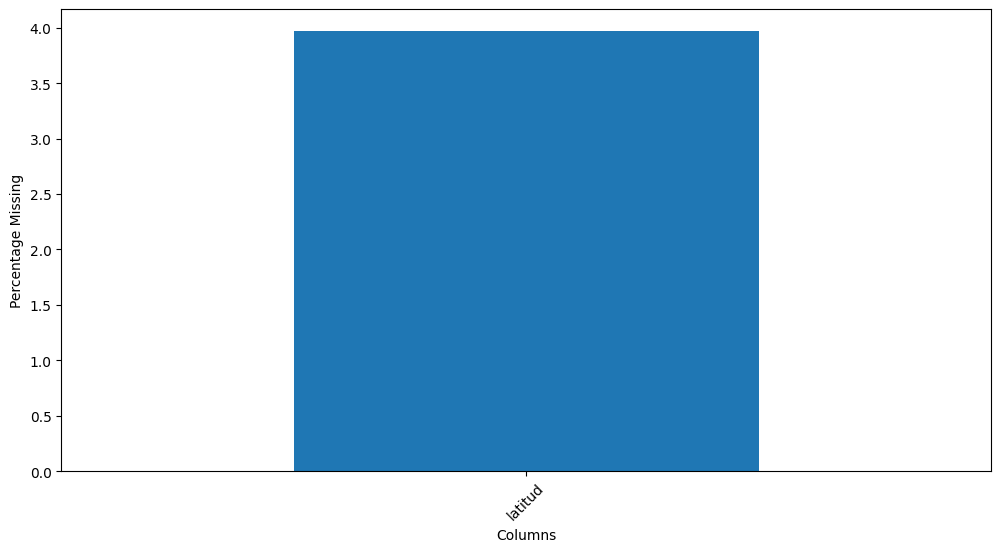

In [40]:
plot_missing_by_column(ds_train[['latitud']])

longitud    3.970875
dtype: float64


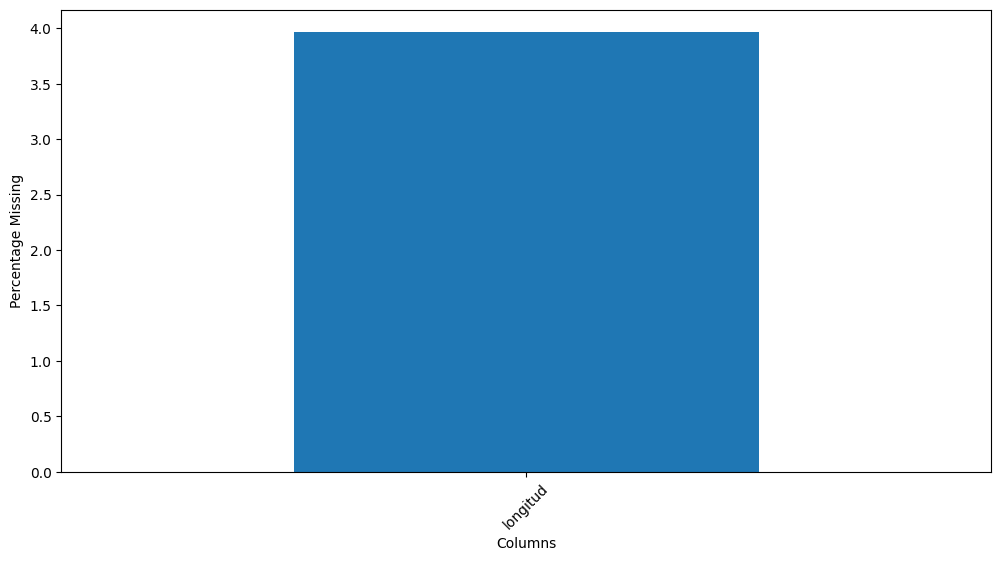

In [41]:
plot_missing_by_column(ds_train[['longitud']])

In [42]:
ds_train[(ds_train.latitud.isna()) & (~ds_train.longitud.isna())]

Empty DataFrame
Columns: [id, start_date, end_date, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, property_title]
Index: []

In [43]:
ds_train[(~ds_train.latitud.isna()) & (ds_train.longitud.isna())]


Empty DataFrame
Columns: [id, start_date, end_date, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, property_title]
Index: []

In [44]:
# Train
percentage_train = ds_train[ds_train.latitud.isna()]['place_l3'].isna().sum() / len(
    ds_train[ds_train.latitud.isna()]['place_l3']) * 100
print(f"Los datos faltantes en la columna place_l3 para train representan el {round(percentage_train, 3)}%")

# Test
percentage_test = ds_test[ds_test.latitud.isna()]['place_l3'].isna().sum() / len(
    ds_test[ds_test.latitud.isna()]['place_l3']) * 100
print(f"Los datos faltantes en la columna place_l3 para test representan el {round(percentage_test, 3)}%")

Los datos faltantes en la columna place_l3 para train representan el 4.643%
Los datos faltantes en la columna place_l3 para test representan el 4.212%


In [45]:
# Train
for barrio in ds_train.place_l3.unique().tolist():
    latitud_media = ds_train[ds_train.place_l3 == barrio].latitud.mean()
    longitud_media = ds_train[ds_train.place_l3 == barrio].longitud.mean()

    ds_train.loc[(ds_train.place_l3 == barrio) & (ds_train.latitud.isna()), ['latitud']] = latitud_media
    ds_train.loc[(ds_train.place_l3 == barrio) & (ds_train.longitud.isna()), ['longitud']] = longitud_media

# Test
for barrio in ds_test.place_l3.unique().tolist():
    latitud_media = ds_train[ds_train.place_l3 == barrio].latitud.mean()
    longitud_media = ds_train[ds_train.place_l3 == barrio].longitud.mean()

    ds_test.loc[(ds_test.place_l3 == barrio) & (ds_test.latitud.isna()), ['latitud']] = latitud_media
    ds_test.loc[(ds_test.place_l3 == barrio) & (ds_test.longitud.isna()), ['longitud']] = longitud_media

In [46]:
ds_train[ds_train.latitud.isna()]

id start_date                      end_date  \
458690  uzOE5TSle78c4dgqiJ8hYg== 2021-01-05 2021-03-01 00:00:00.000000000   
265868  ZjdPr6PFzWhUf8R9DKpAsg== 2021-09-02 2021-09-08 00:00:00.000000000   
57098   k8oVn7UMh5c31oMy3VQMJQ== 2021-04-20 2021-11-04 00:00:00.000000000   
208079  q5poBFQa4cDEgucDmzEGxA== 2021-02-01 2022-05-13 00:00:00.000000000   
318281  bv4GZQnngc8/BdnPLZupdQ== 2021-03-17 2021-11-04 00:00:00.000000000   
...                          ...        ...                           ...   
151051  NWbXB0gPxuUNRgXVhs8sKw== 2021-08-05 2021-11-04 00:00:00.000000000   
309009  lueG6ZNaiqX2qrMCJHFeyg== 2021-09-01 2022-03-09 00:00:00.000000000   
221835  cQOhFHR/RFEu7RjROsN4Rw== 2021-06-30 2021-09-12 07:43:19.924328415   
314302  bwuR+TtMs/dnDTw5YmvC6A== 2021-01-06 2021-11-04 00:00:00.000000000   
114493  7xfS6WRwwvyB0rgPkEgI1A== 2021-12-07 2022-01-27 00:00:00.000000000   

        latitud  longitud place_l3 property_type  property_rooms  \
458690      NaN       NaN      NaN          Casa             NaN   
265868      NaN       NaN      NaN  Departamento             3.0   
57098       NaN       NaN      NaN  Departamento             3.0   
208079      NaN       NaN      NaN  Departamento             3.0   
318281      NaN       NaN      NaN          Casa             3.0   
...         ...       ...      ...           ...             ...   
151051      NaN       NaN      NaN          Casa             4.0   
309009      NaN       NaN      NaN          Casa             NaN   
221835      NaN       NaN      NaN          Casa             NaN   
314302      NaN       NaN      NaN  Departamento             2.0   
114493      NaN       NaN      NaN  Departamento             3.0   

        property_bedrooms  property_surface_total  property_surface_covered  \
458690                2.0                     NaN                      80.0   
265868                2.0                    73.0                      52.0   
57098                 NaN                     NaN                      78.0   
208079                2.0                    90.0                      75.0   
318281                NaN                   150.0                     110.0   
...                   ...                     ...                       ...   
151051                NaN                    90.0                     140.0   
309009                6.0                  2200.0                     500.0   
221835                8.0                   750.0                     450.0   
314302                NaN                     NaN                      42.0   
114493                2.0                    86.0                      86.0   

        property_price                                     property_title  
458690        120000.0               Casa a reciclar 3 Amb. en San Martin  
265868         87500.0  Departamento de 73 m2 - 3 ambientes en Alquile...  
57098         270000.0  Departamento en Venta CABA / Buenos Aires (B11...  
208079        285000.0  Excelente departamento en venta en Dina Huapi ...  
318281        220000.0      Casa  en Venta CABA / Buenos Aires (B134 238)  
...                ...                                                ...  
151051        290000.0     Casa  en Venta Caba / Buenos Aires (D038 1562)  
309009       1500000.0  EXCELENTE CHALET EN DOS PLANTAS CON VISTA AL LAGO  
221835       1200000.0  BAJO EL PRECIO!! Casa de lujo en El Chorro - M...  
314302        125000.0  Departamento en Venta CABA / Buenos Aires (D03...  
114493        170000.0              VENTA DEPARTAMENTO 3 AMBIENTES RETIRO  

[139 rows x 13 columns]

In [47]:
ds_test[ds_test.latitud.isna()]

id start_date end_date  latitud  longitud  \
146411  MbCY2JnbC/KUc446DZLA6w==        NaT      NaT      NaN       NaN   
364007  49YfRYIx481tyM+DHtFlRQ==        NaT      NaT      NaN       NaN   
389690  BNsc9j62YZWgIQAaQ3vR7w==        NaT      NaT      NaN       NaN   
220369  lSS8U6TJT9ouSKhaGqyD2A==        NaT      NaT      NaN       NaN   
80199   26wRmFOoBmdfgg/mhXcV5A==        NaT      NaT      NaN       NaN   
101456  pYxy/6HZGMBjHgbngmG70Q==        NaT      NaT      NaN       NaN   
161698  GhIxeNGs5rOvxRVwOhqxfA==        NaT      NaT      NaN       NaN   
309867  2oiyp4YLGap4pyz/JrKC3A==        NaT      NaT      NaN       NaN   
314306  bFGH2U1OERyQvUia3CD5gg==        NaT      NaT      NaN       NaN   
25      CyZu6IaZgmQYGk8jmPajCg==        NaT      NaT      NaN       NaN   
389004  CPXCgjqRI/3js9VHc63/ew==        NaT      NaT      NaN       NaN   
324195  yZbN/7naQCAKZfRIbH9lqw==        NaT      NaT      NaN       NaN   
318282  OR5WhCzgKUhaDY9kcPPKug==        NaT      NaT      NaN       NaN   
201562  wXF6CbrslY4q4OHdh0q+QQ==        NaT      NaT      NaN       NaN   
286971  Ofh+oK3y43KJLYsPg0uj4w==        NaT      NaT      NaN       NaN   
341285  fH/+4asrLhpVCY1KxLwFKQ==        NaT      NaT      NaN       NaN   
79650   1DQLwAOa+obiAO8Gio08AA==        NaT      NaT      NaN       NaN   
241085  j/qJT+DHmdmfygjem/H1sw==        NaT      NaT      NaN       NaN   
119175  iBAE80MSUHIX96PwAFleUA==        NaT      NaT      NaN       NaN   
348199  9L8mNJdhzxb5vH8bNIKPoQ==        NaT      NaT      NaN       NaN   
384799  RbFNzVNNCitS39u7eBRZJg==        NaT      NaT      NaN       NaN   
270973  91Kb4G/QKBS5FMM4dwZjTQ==        NaT      NaT      NaN       NaN   
381106  VhrNggUdh3Gz+4z9iX4nlw==        NaT      NaT      NaN       NaN   
44423   oGPgLc4InEc+5rOhp+H7PA==        NaT      NaT      NaN       NaN   
267339  +f7X2HemIFMsJr2dJaqCVA==        NaT      NaT      NaN       NaN   
45963   ZMETeO0JxjkcfJd8S+gZOg==        NaT      NaT      NaN       NaN   
161821  feYEI/oWbl3KuB6cR9ouJQ==        NaT      NaT      NaN       NaN   
459199  oYcjmcAXiY+MSWKw0iU28Q==        NaT      NaT      NaN       NaN   
433579  zYQ/wZdOxmyZK1asrNN/Ew==        NaT      NaT      NaN       NaN   
265486  V+xQjMt4j6nVAVIPD0Gyiw==        NaT      NaT      NaN       NaN   
343265  ivCufxbxoTGNCsW8IF72Iw==        NaT      NaT      NaN       NaN   

       place_l3 property_type  property_rooms  property_bedrooms  \
146411      NaN          Casa             4.0                3.0   
364007      NaN          Casa             NaN                4.0   
389690      NaN  Departamento             3.0                3.0   
220369      NaN  Departamento             1.0                1.0   
80199       NaN  Departamento             2.0                1.0   
101456      NaN          Casa             NaN                6.0   
161698      NaN  Departamento             3.0                2.0   
309867      NaN  Departamento             2.0                NaN   
314306      NaN  Departamento             2.0                NaN   
25          NaN          Casa             4.0                3.0   
389004      NaN            PH             3.0                2.0   
324195      NaN  Departamento             3.0                NaN   
318282      NaN          Casa             4.0                NaN   
201562      NaN  Departamento             4.0                3.0   
286971      NaN  Departamento             2.0                NaN   
341285      NaN  Departamento             4.0                NaN   
79650       NaN            PH             3.0                NaN   
241085      NaN          Casa             NaN                2.0   
119175      NaN  Departamento             1.0                NaN   
348199      NaN          Casa             NaN                4.0   
384799      NaN            PH             3.0                NaN   
270973      NaN          Casa             5.0                3.0   
381106      NaN  Departamento             1.0                NaN 

In [48]:
## Train
print(
    f"El porcentaje de valores a eliminar train corresponden a un {round((len(ds_train[ds_train.latitud.isna()]) / len(ds_train)), 4)}%")

## Test
print(
    f"El porcentaje de valores a eliminar en test corresponden a un {round((len(ds_test[ds_test.latitud.isna()]) / len(ds_test)), 4)}%")

El porcentaje de valores a eliminar train corresponden a un 0.0018%
El porcentaje de valores a eliminar en test corresponden a un 0.0016%


In [49]:
## Train

ds_train.drop(ds_train[ds_train.latitud.isna()].index, inplace=True)

## Test
ds_test.drop(ds_test[ds_test.latitud.isna()].index, inplace=True)

**Post Imputacion de latitud y longitud**

latitud    0.0
dtype: float64


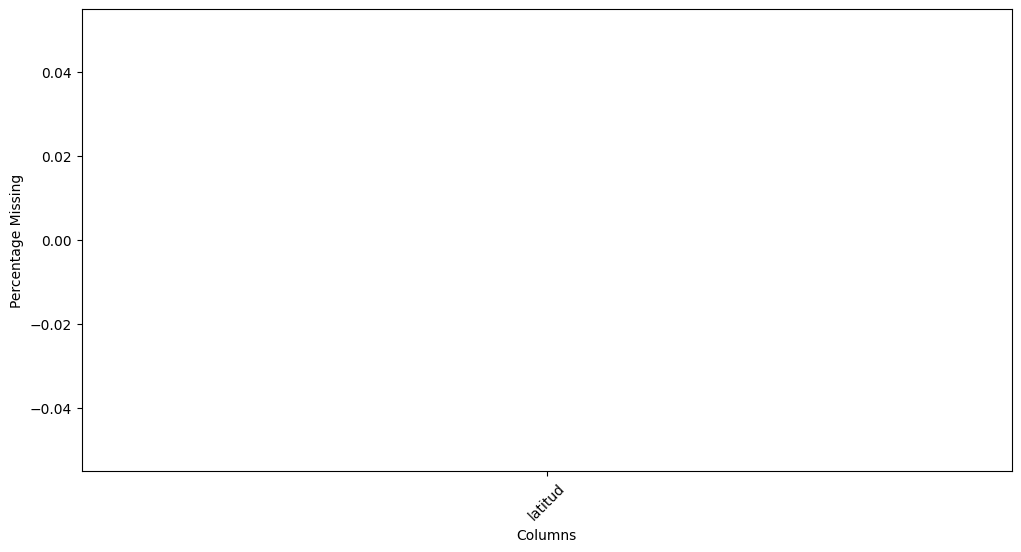

In [50]:
plot_missing_by_column(ds_train[['latitud']])

longitud    0.0
dtype: float64


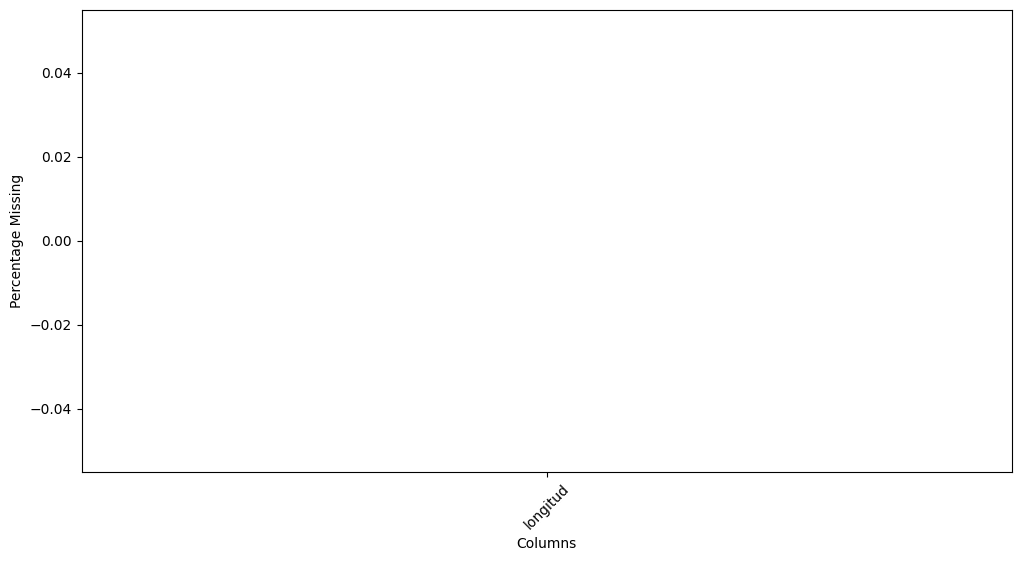

In [51]:
plot_missing_by_column(ds_train[['longitud']])

**Pre imputación de ambientes**

property_rooms    1.081584
dtype: float64


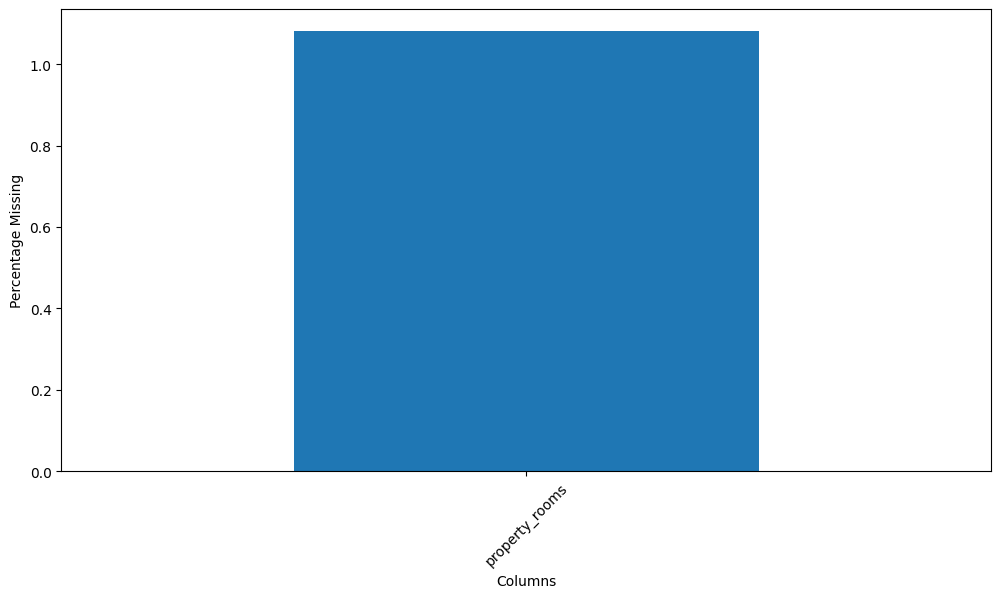

In [52]:
plot_missing_by_column(ds_train[['property_rooms']])

**Reparacion de ambientes faltantes en base al titulo de la propiedad**

In [53]:
def reparacion_amb_por_titulo_prop(ambientes_faltantes, ds):
    print(f"cantidad inicial de ambientes a reparar: {len(ds[ds['property_rooms'].isna()])}")
    regex = re.compile(r"(\d+ \bambientes?\b)")
    regex2 = re.compile(r"(\d+\ \b\bamb\b *)")

    a = {}
    for titulo in ambientes_faltantes.property_title:
        if (len(re.findall(regex, titulo.lower())) > 0):
            a[titulo] = re.findall(regex, titulo.lower())
        if (len(re.findall(regex2, titulo.lower())) > 0):
            a[titulo] = re.findall(regex2, titulo.lower())

    for i in ds.index:
        if ds.loc[i, 'property_title'] in a:
            if len(a[ds.loc[i, 'property_title']]) > 0:
                ds.loc[i, 'property_rooms'] = float("".join(a[ds.loc[i, 'property_title']]).split(" ")[0])
            if ("monoambiente" or "un ambiente" or "mono" or "mono ambiente") in str(
                    ds.loc[i, 'property_title']).lower():
                ds.loc[i, 'property_rooms'] = float(1)
            if "dos ambientes" in str(ds.loc[i, 'property_title']).lower():
                ds.loc[i, 'property_rooms'] = float(2)
            if "tres ambientes" in str(ds.loc[i, 'property_title']).lower():
                ds.loc[i, 'property_rooms'] = float(3)
            if "cuatro ambientes" in str(ds.loc[i, 'property_title']).lower():
                ds.loc[i, 'property_rooms'] = float(4)
            if "cinco ambientes" in str(ds.loc[i, 'property_title']).lower():
                ds.loc[i, 'property_rooms'] = float(5)
            if "seis ambientes" in str(ds.loc[i, 'property_title']).lower():
                ds.loc[i, 'property_rooms'] = float(6)

    print(f"cantidad de ambientes faltantes post reparacion: {len(ds[ds['property_rooms'].isna()])}")

In [54]:
datos_a_reparar = ds_train[['property_title', 'property_rooms']].reset_index()

# Train

ambientes_faltantes = datos_a_reparar[datos_a_reparar['property_rooms'].isna()]
reparacion_amb_por_titulo_prop(ambientes_faltantes, ds_train)

# Test

ambientes_faltantes = datos_a_reparar[datos_a_reparar['property_rooms'].isna()]
reparacion_amb_por_titulo_prop(ambientes_faltantes, ds_test)

cantidad inicial de ambientes a reparar: 814
cantidad de ambientes faltantes post reparacion: 646
cantidad inicial de ambientes a reparar: 200
cantidad de ambientes faltantes post reparacion: 190


**Post Imputacion de ambientes**

property_rooms    0.858358
dtype: float64


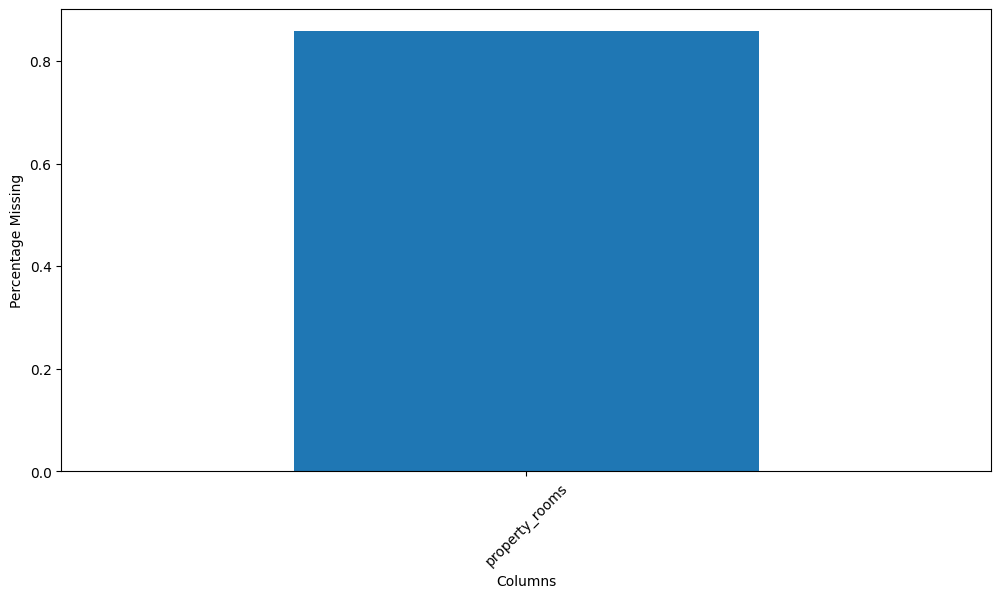

In [55]:
plot_missing_by_column(ds_train[['property_rooms']])

In [56]:
# Train
ds_train.dropna(axis='index', subset=['property_rooms'], inplace=True)
ds_train[ds_train.property_rooms.isna()]

# Test
ds_test.dropna(axis='index', subset=['property_rooms'], inplace=True)
ds_test[ds_test.property_rooms.isna()]

Empty DataFrame
Columns: [id, start_date, end_date, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, property_title]
Index: []

property_rooms    0.0
dtype: float64


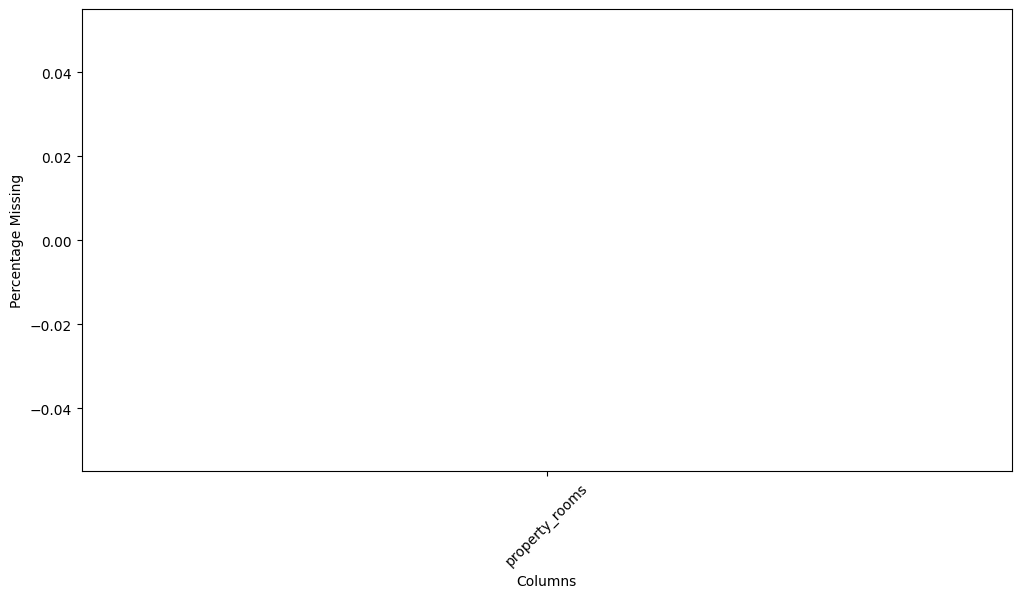

In [57]:
plot_missing_by_column(ds_train[['property_rooms']])

**Pre Imputacion de Habitaciones**

property_bedrooms    11.401346
dtype: float64


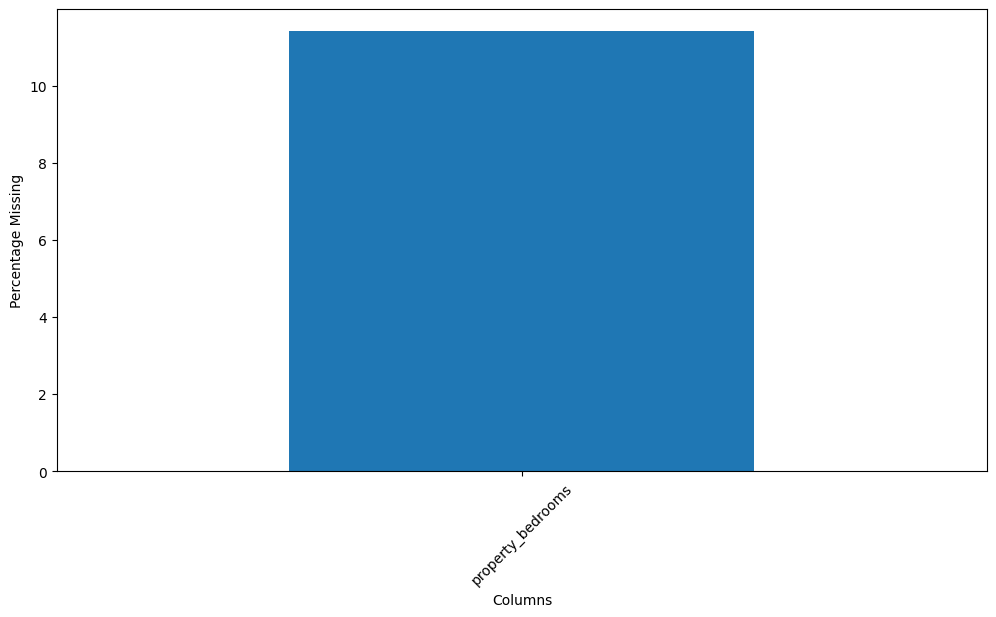

In [58]:
plot_missing_by_column(ds_train[['property_bedrooms']])

**Reparacion de habitaciones faltantes en base a los ambientes**

In [59]:
# Train
print(f"El total de habitaciones en train es: {len(ds_train.property_bedrooms)}")
habitaciones_invalidas = ds_train.loc[(ds_train['property_bedrooms'] > ds_train['property_rooms'])]
print(
    f"El total de habitaciones invalidas es: {len(habitaciones_invalidas)}. Constituye al {(len(habitaciones_invalidas) * 100) // len(ds_train.property_bedrooms)}% de los datos del ds")
habitaciones_invalidas

# Test
print(f"El total de habitaciones en test es: {len(ds_test.property_bedrooms)}")
habitaciones_invalidas = ds_test.loc[(ds_test['property_bedrooms'] > ds_test['property_rooms'])]
print(
    f"El total de habitaciones invalidas es: {len(habitaciones_invalidas)}. Constituye al {(len(habitaciones_invalidas) * 100) // len(ds_test.property_bedrooms)}% de los datos del ds")
habitaciones_invalidas

El total de habitaciones en train es: 74614
El total de habitaciones invalidas es: 131. Constituye al 0% de los datos del ds
El total de habitaciones en test es: 18629
El total de habitaciones invalidas es: 31. Constituye al 0% de los datos del ds


id start_date end_date    latitud   longitud  \
304227  KnJPz4T2aLzhbWY8pjenWg==        NaT      NaT -34.568785 -58.457129   
150144  OwNpobSoNV+5PZJqdx/A0Q==        NaT      NaT -34.605254 -58.468938   
389699  /D5DqZYM2nZ/7R9a/Ty+Gw==        NaT      NaT -34.606923 -58.404533   
236626  UqsbAaBavBuOIQsPBb0fCQ==        NaT      NaT -34.626670 -58.439150   
345928  YtZ92HeeTOj5vzYY05L7Cw==        NaT      NaT -34.577375 -58.413314   
188564  qy6IBMdRGJeeJDIOgE8u2Q==        NaT      NaT -34.625245 -58.445077   
55829   ZRHW+fJ8Az3MqKb1lukayQ==        NaT      NaT -34.638777 -58.432574   
4928    69j280NshNyMCYcFqsmhlw==        NaT      NaT -34.645031 -58.373672   
337831  f48xnLslZAFNd6aFyB7MZA==        NaT      NaT -34.618768 -58.441983   
24686   C3bkeU7dwuSasjU+dZfciw==        NaT      NaT -34.596455 -58.507433   
115493  SdoETVOxVCpxrVP02+fxOA==        NaT      NaT -34.612679 -58.362669   
150143  iHGPXAOMtPXPc++zjbiYzA==        NaT      NaT -34.605254 -58.468938   
115485  hrKv65SUn9Qf8dlGuPYhHw==        NaT      NaT -34.613261 -58.361513   
115491  u5hOV+bJihRU3VAVxsfsrw==        NaT      NaT -34.613037 -58.360984   
41088   ngtAPqtsUhn8Y9+r/FgteA==        NaT      NaT -34.614573 -58.480650   
115482  +/GRR4rodHJolrb0SSNIqQ==        NaT      NaT -34.613261 -58.361513   
399560  qlMqnmUjGt7quE+h6uWNng==        NaT      NaT -34.601997 -58.383625   
276086  26ynaivxGjWUJwbcP5zKfg==        NaT      NaT -34.639591 -58.442952   
115503  xOKrM65pqQHhVKJAvrKJjA==        NaT      NaT -34.613261 -58.361513   
325449  LZhr2owtQ83MiDi55T7vfA==        NaT      NaT -34.598801 -58.436084   
14163   TSH/MP+ATH7g5J0BzcENvg==        NaT      NaT -34.562470 -58.454032   
225101  BvEsXFS0YlkCOSqwO00UjQ==        NaT      NaT -34.624302 -58.396088   
130208  aDyZI32jYV/LuQdSHQRAOQ==        NaT      NaT -34.604930 -58.440416   
115472  8GnXLYvT917uZZQOseeXXw==        NaT      NaT -34.613037 -58.360984   
115489  BtICH9RxtgHdJDZ+32rCdA==        NaT      NaT -34.613261 -58.361513   
432011  s14IJlvWuE+oZmMurxiGpw==        NaT      NaT -34.643086 -58.435170   
137659  mAzAqXdmAZYrERB6k3F51w==        NaT      NaT -34.585134 -58.394394   
259812  Sn6QBrocsb7ut8BM67cJkw==        NaT      NaT -34.598445 -58.431597   
171575  DTZbmjvIiJ4P/Wz5r3lm4g==        NaT      NaT -34.621530 -58.361752   
130394  oGubrAcyAHXx5ilYS91Euw==        NaT      NaT -34.643439 -58.429532   
338919  xkxeuRCy0RtLzQkKyhCaNw==        NaT      NaT -34.669249 -58.474285   

                place_l3 property_type  property_rooms  property_bedrooms  \
304227          Belgrano  Departamento             1.0                5.0   
150144          Paternal          Casa             3.0                5.0   
389699              Once  Departamento             1.0                2.0   
236626         Caballito          Casa             5.0                6.0   
345928           Palermo  Departamento             5.0                6.0   
188564         Caballito            PH             3.0                4.0   
55829   Parque Chacabuco            PH             1.0                2.0   
4928            Barracas  Departamento             1.0                2.0   
337831         Caballito  Departamento             3.0               20.0   
24686       Villa Devoto  Departamento             1.0                2.0   
115493     Puerto Madero  Departamento             4.0                6.0   
150143          Paternal          Casa             3.0                5.0   
115485     Puerto Madero  Departamento             3.0                4.0   
115491     Puerto Madero  Departamento             3.0                4.0   
41088   Villa del Parque  Departamento             2.0               11.0   
115482     Puerto Madero  Departamento             3.0                4.0   
399560       San Nicolás  Departamento             4.0                6.0   
276086  Parque Chacabuco            PH             3.0                5.0   
115503     Puerto Madero  Departamento             3.0                

In [60]:
# Train
habitaciones_con_amb_menos_1_train = ds_train[ds_train.property_rooms == (ds_train.property_bedrooms + 1)]
print(
    f"Las habitaciones que son Ambientes - 1 en train son: {len(habitaciones_con_amb_menos_1_train)}. Constituyen al {(len(habitaciones_con_amb_menos_1_train) * 100) // len(ds_train.property_bedrooms)}% de los datos")

# Test
habitaciones_con_amb_menos_1_test = ds_test[ds_test.property_rooms == (ds_test.property_bedrooms + 1)]
print(f"Las habitaciones que son Ambientes - 1 en test son: {len(habitaciones_con_amb_menos_1_test)}. Constituyen al {(len(habitaciones_con_amb_menos_1_test) * 100) // len(ds_test.property_bedrooms)}% de los datos")

Las habitaciones que son Ambientes - 1 en train son: 55718. Constituyen al 74% de los datos
Las habitaciones que son Ambientes - 1 en test son: 13974. Constituyen al 75% de los datos


In [61]:
print(f"Valor inicial de habitaciones faltantes en el ds de train: {ds_train.property_bedrooms.isna().sum()}")
print(f"Valor inicial de habitaciones faltantes en el ds de test: {ds_test.property_bedrooms.isna().sum()}")

Valor inicial de habitaciones faltantes en el ds de train: 8507
Valor inicial de habitaciones faltantes en el ds de test: 2022


In [62]:
habitaciones_faltantes = ds_train[ds_train.property_bedrooms.isna()]
for i in habitaciones_faltantes.index:
    if ds_train.loc[i, 'property_rooms'] == 1:
        ds_train.loc[i, 'property_bedrooms'] = 1
    else:
        ds_train.loc[i, 'property_bedrooms'] = ds_train.loc[i, 'property_rooms'] - 1
ds_train[ds_train.property_bedrooms.isna()]

Empty DataFrame
Columns: [id, start_date, end_date, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, property_title]
Index: []

In [63]:
habitaciones_faltantes = ds_test[ds_test.property_bedrooms.isna()]
for i in habitaciones_faltantes.index:
    if ds_test.loc[i, 'property_rooms'] == 1:
        ds_test.loc[i, 'property_bedrooms'] = 1
    else:
        ds_test.loc[i, 'property_bedrooms'] = ds_test.loc[i, 'property_rooms'] - 1
ds_test[ds_test.property_bedrooms.isna()]

Empty DataFrame
Columns: [id, start_date, end_date, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, property_title]
Index: []

**Post Imputacion de habitaciones**

property_bedrooms    0.0
dtype: float64


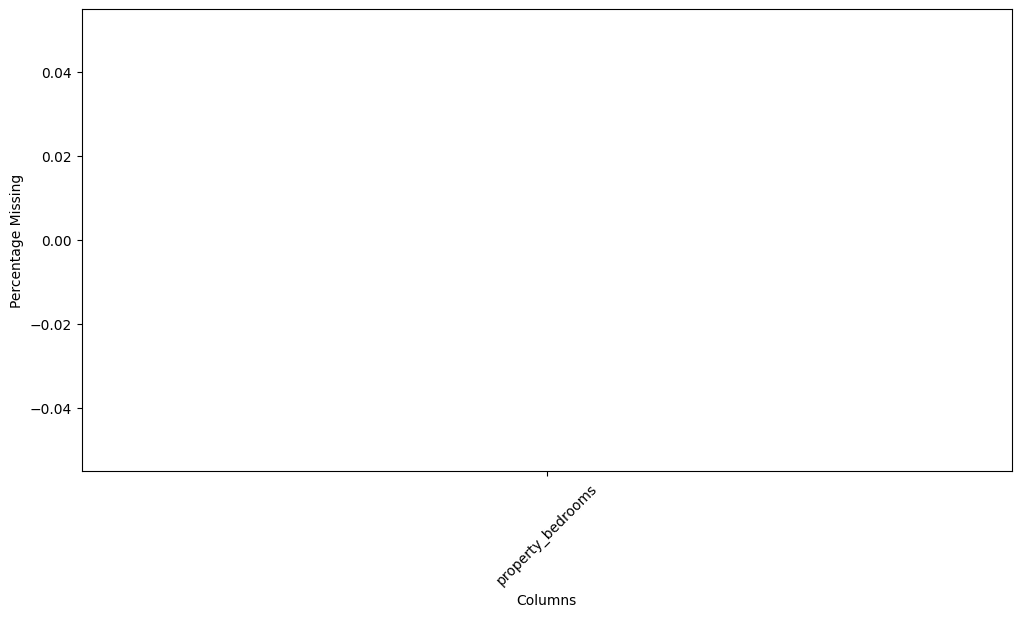

In [64]:
plot_missing_by_column(ds_train[['property_bedrooms']])

**Pre Imputación de Superficie total**

property_surface_total    4.969577
dtype: float64


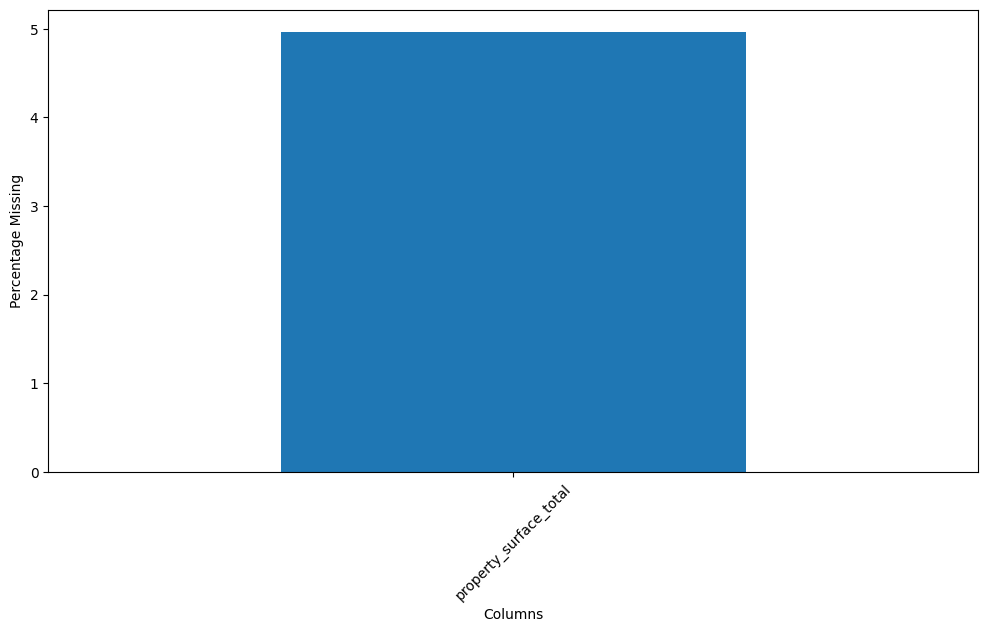

In [65]:
plot_missing_by_column(ds_train[['property_surface_total']])

In [66]:
ds_train[ds_train.property_surface_total.isna()][ds_train.property_surface_covered.isna()]

Empty DataFrame
Columns: [id, start_date, end_date, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, property_title]
Index: []

**Reparación de datos faltantes en superficie cubierta**

In [67]:
# Train
ds_train.loc[ds_train.property_surface_total.isna(), 'property_surface_total'] = ds_train.loc[
    ds_train.property_surface_total.isna(), 'property_surface_covered']
len(ds_train.loc[ds_train.property_surface_total.isna()])

# Test
ds_test.loc[ds_test.property_surface_total.isna(), 'property_surface_total'] = ds_test.loc[
    ds_test.property_surface_total.isna(), 'property_surface_covered']
len(ds_test.loc[ds_test.property_surface_total.isna()])

0

**Post Imputación de Superficie total**

property_surface_total    0.0
dtype: float64


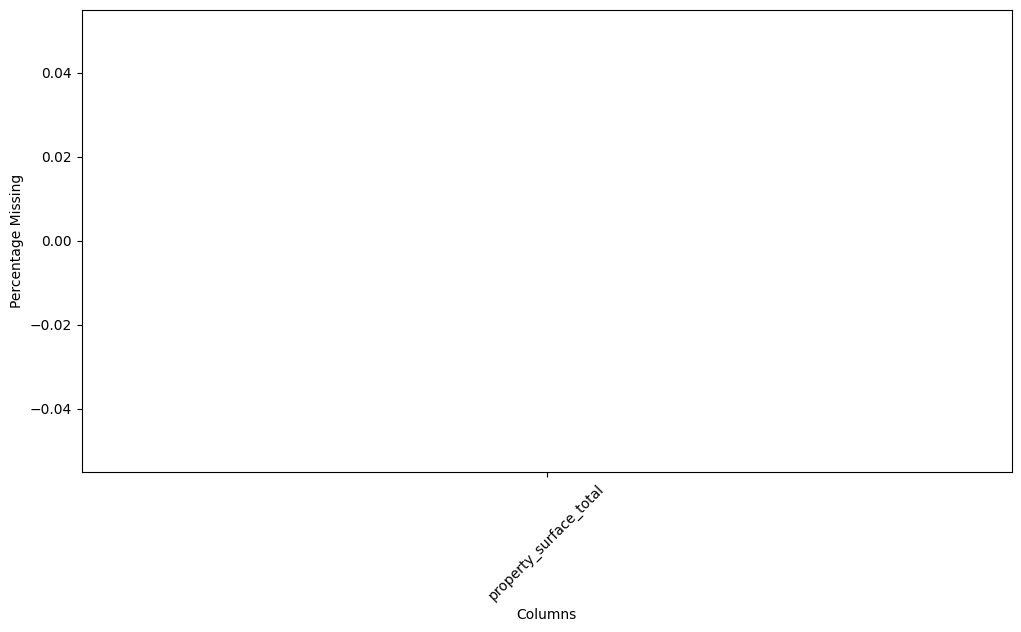

In [68]:
plot_missing_by_column(ds_train[['property_surface_total']])

**Pre Imputación de superficie cubierta**

In [69]:
ds_train[ds_train.property_surface_covered.isna()]

id start_date                      end_date  \
339856  7eZizUzBf+GuhTFWiNweNQ== 2021-06-01 2021-06-05 00:00:00.000000000   
423498  Hh0ROL5irB8/fzCWiJWtcw== 2021-12-15 2022-02-27 07:43:19.924328415   
242589  wCgQzrJFpBMULYjaf7q1vg== 2021-04-01 2021-04-15 00:00:00.000000000   
115284  Q1L8KyxjFdcblBV9lXPmng== 2021-12-07 2022-01-27 00:00:00.000000000   
440786  DHUyHjh5YFBWo4qnJ6TFSA== 2021-07-20 2022-01-19 00:00:00.000000000   
...                          ...        ...                           ...   
313356  rOFBAtPBW8NH7CId/CJjqg== 2021-06-14 2022-01-05 00:00:00.000000000   
354462  OjXcNdtONq9NdIVtVnsXow== 2021-11-04 2022-01-27 00:00:00.000000000   
6432    vIXbWcivD7ScYJDiiOcMbA== 2021-10-29 2022-03-19 00:00:00.000000000   
248094  zFXnTpJGLBM6pJEaUJHN6Q== 2021-09-13 2021-10-24 00:00:00.000000000   
314384  zSlS4XR7Ubzr3pDG4MixBg== 2021-01-06 2021-12-24 00:00:00.000000000   

          latitud   longitud       place_l3 property_type  property_rooms  \
339856 -34.586117 -58.391505       Recoleta  Departamento             1.0   
423498 -34.615510 -58.380091      San Telmo  Departamento             1.0   
242589 -34.572893 -58.478189  Villa Urquiza  Departamento             1.0   
115284 -34.578178 -58.449308     Colegiales  Departamento             3.0   
440786 -34.632493 -58.381533       Barracas  Departamento             1.0   
...           ...        ...            ...           ...             ...   
313356 -34.557335 -58.443635       Belgrano  Departamento             2.0   
354462 -34.589482 -58.507505   Villa Devoto  Departamento             2.0   
6432   -34.597733 -58.426524   Villa Crespo  Departamento             3.0   
248094 -34.582588 -58.417292        Palermo  Departamento             2.0   
314384 -34.554230 -58.465705          Nuñez  Departamento             3.0   

        property_bedrooms  property_surface_total  property_surface_covered  \
339856                1.0                    27.0                       NaN   
423498                1.0                    40.0                       NaN   
242589                1.0                    45.0                       NaN   
115284                2.0                    70.0                       NaN   
440786                1.0                    32.0                       NaN   
...                   ...                     ...                       ...   
313356                1.0                    56.0                       NaN   
354462                1.0                    52.0                       NaN   
6432                  2.0                    81.0                       NaN   
248094                1.0                    64.0                       NaN   
314384                2.0                    74.0                       NaN   

        property_price                                     property_title  
339856         86000.0  VICENTE LOPEZ 2200  27Mts2 MONOAMB. C/BALCON- ...  
423498         80000.0                            1 Ambiente -  San Telmo  
242589        105000.0                       Departamento - Villa Urquiza  
115284        132000.0                          Departamento - Colegiales  
440786         52000.0  Monoambiente dividido c/cocina y lavadero " zo...  
...                ...                                                ...  
313356        144500.0  OPORTUNIDAD - u$ 2600 el m2 - 2 AMB. - COCH. -...  
354462        140000.0  Espectacular 2 ambientes con cochera en Villa ...  
6432          210000.0  OPORTUNIDAD - u$2600 el m2 - 3 amb. c/coch opc...  
248094        120000.0                   Excelente 2 amb con gran patio!!  
314384        240000.0  Cómodo 3 Ambientes con cochera en el barrio de...  

[2605 rows x 13 columns]

property_surface_covered    3.491302
dtype: float64


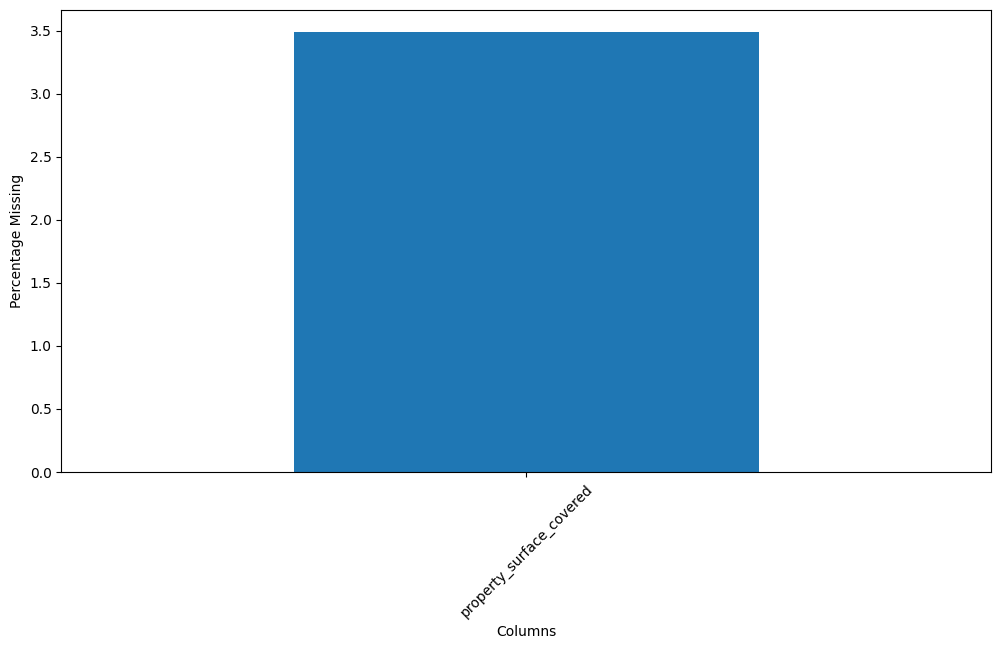

In [70]:
plot_missing_by_column(ds_train[['property_surface_covered']])

**Reparación de datos faltantes en Superficie cubierta**

In [71]:
ds_train[ds_train.property_surface_covered.isna()].property_type.value_counts()

Departamento    2356
PH               170
Casa              79
Name: property_type, dtype: int64

In [72]:
# Test
ds_test.loc[(ds_test.property_surface_covered.isna()) & (
        ds_test.property_type == 'Departamento'), 'property_surface_covered'] = ds_train.loc[
    (ds_train.property_surface_covered.isna()) & (
            ds_train.property_type == 'Departamento'), 'property_surface_total']

len(ds_test.loc[(ds_test.property_surface_covered.isna()) & (ds_test.property_type == 'Departamento')])

# Train
ds_train.loc[(ds_train.property_surface_covered.isna()) & (
        ds_train.property_type == 'Departamento'), 'property_surface_covered'] = ds_train.loc[
    (ds_train.property_surface_covered.isna()) & (
            ds_train.property_type == 'Departamento'), 'property_surface_total']

len(ds_train.loc[(ds_train.property_surface_covered.isna()) & (ds_train.property_type == 'Departamento')])

0

In [73]:
print(f"Registros Train: {ds_train.property_surface_covered.isna().sum()}")

Registros Train: 249


In [74]:
print(f"Registros Test: {ds_test.property_surface_covered.isna().sum()}")

Registros Test: 658


In [75]:
# Train
ds_train.dropna(axis='index', subset=['property_surface_covered'], inplace=True)
ds_train[ds_train.property_surface_covered.isna()]

# Test
ds_test.dropna(axis='index', subset=['property_surface_covered'], inplace=True)
ds_test[ds_test.property_surface_covered.isna()]

Empty DataFrame
Columns: [id, start_date, end_date, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, property_title]
Index: []

id                          0.000000
start_date                  0.000000
end_date                    0.000000
latitud                     0.000000
longitud                    0.000000
place_l3                    0.205742
property_type               0.000000
property_rooms              0.000000
property_bedrooms           0.000000
property_surface_total      0.000000
property_surface_covered    0.000000
property_price              0.000000
property_title              0.000000
dtype: float64


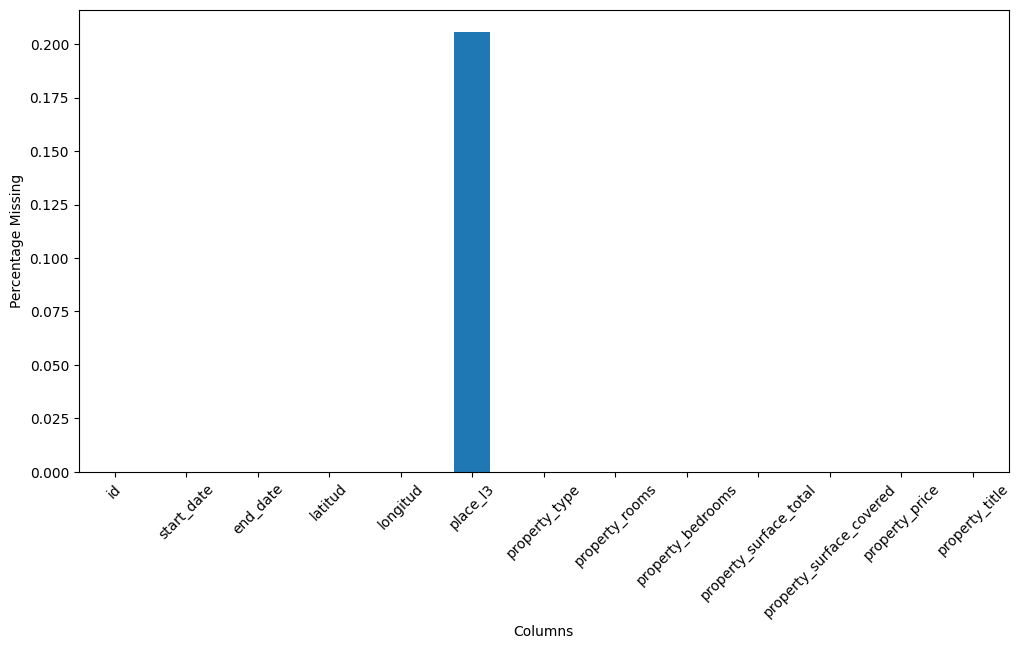

In [76]:
percent_missing = ds_train.isna().sum() * 100 / len(ds_train)
plt.figure(figsize=(12, 6))
percent_missing.plot.bar(x='index', rot=45)
plt.xlabel("Columns")
plt.ylabel("Percentage Missing")
rows = ds_train.shape[0]
print(ds_train.isna().sum() / rows * 100)

### Analisis de Valores Atipicos

#### Univariados

**Metodo IQR**

In [77]:
def calculate_univariate_iqr(column, dataset):
    print(f"cantidad de datos del ds: {len(dataset)}")

    # 1er cuartil para property_rooms
    q1 = column.quantile(0.25)

    # 3er cuartil para property_rooms
    q3 = column.quantile(0.75)
    med = column.median()

    # region IQR
    iqr = q3 - q1

    # Bigotes altos y bajos
    limite_superior = q3 + (1.5 * iqr)
    limite_inferior = q1 - (1.5 * iqr)

    outliers = dataset[(column <= limite_inferior) | (column >= limite_superior)]
    print(f"outliers encontrados para los {column.name}: {len(outliers)}")
    print(f"hay {len(outliers) * 100 // len(dataset)}% de outliers de {column.name} sobre el ds")
    print(f"limit sup: {limite_superior}, limite inf: {limite_inferior}")

    outliers_grafico = dataset[(column >= limite_inferior) & (column <= limite_superior)][column.name]

    plt.figure(figsize=(5, 5))
    plt.boxplot(outliers_grafico)
    plt.title(f"Boxplot de IQR para {column.name}")
    plt.show()

In [78]:
def boxplot_outliers_edges(series, moderated_outliers=True):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1

    if moderated_outliers:
        value = 1.5
    else:
        value = 3

    max = q3 + (value * iqr)
    min = q1 - (value * iqr)

    return min, max


In [79]:
def boxplot_with_outliers(dataset, column_name):
    column = dataset[column_name]
    moderated_min, moderated_max = boxplot_outliers_edges(column)
    severe_min, severe_max = boxplot_outliers_edges(column, moderated_outliers=False)

    print(f"Moderated outliers limits [min: {moderated_min},max: {moderated_max}]")
    print(f"Severe outliers limits [min: {severe_min},max: {severe_max}]")

    plt.figure(figsize=(5, 10))
    column.plot.box()

    plt.axhline(moderated_min, label="Moderated")
    plt.axhline(moderated_max)
    plt.axhline(severe_min, color="r", label="Severe")
    plt.axhline(severe_max, color="r")
    #plt.legend(bbox_to_anchor =(0.75, 1.15), ncol = 2)
    plt.legend(title="Limites")

**Ambientes**

cantidad de datos del ds: 74365
outliers encontrados para los property_rooms: 1161
hay 1% de outliers de property_rooms sobre el ds
limit sup: 7.0, limite inf: -1.0


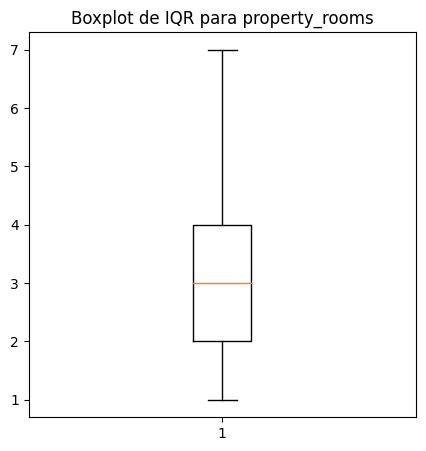

In [80]:
calculate_univariate_iqr(ds_train.property_rooms, ds_train)

In [81]:
# Train
outlier_inf_rooms_iqr_train = ds_train[ds_train['property_rooms'] < 0]
outlier_sup_rooms_iqr_train = ds_train[ds_train['property_rooms'] > 7]

print(
    f"Los outliers inf de rooms en train son: {len(outlier_inf_rooms_iqr_train)}. Constituyen al {(len(outlier_inf_rooms_iqr_train) * 100) // len(ds_train.property_rooms)}% de los datos")
print(
    f"Los outliers sup de rooms en train son: {len(outlier_sup_rooms_iqr_train)}. Constituyen al {(len(outlier_sup_rooms_iqr_train) * 100) // len(ds_train.property_rooms)}% de los datos")

# Test
outlier_inf_rooms_iqr_test = ds_test[ds_test['property_rooms'] < 0]
outlier_sup_rooms_iqr_test = ds_test[ds_test['property_rooms'] > 7]

print(
    f"Los outliers inf de rooms en test son: {len(outlier_inf_rooms_iqr_test)}. Constituyen al {(len(outlier_inf_rooms_iqr_test) * 100) // len(ds_test.property_rooms)}% de los datos")
print(
    f"Los outliers sup de rooms en test son: {len(outlier_sup_rooms_iqr_test)}. Constituyen al {(len(outlier_sup_rooms_iqr_test) * 100) // len(ds_test.property_rooms)}% de los datos")

Los outliers inf de rooms en train son: 0. Constituyen al 0% de los datos
Los outliers sup de rooms en train son: 569. Constituyen al 0% de los datos
Los outliers inf de rooms en test son: 0. Constituyen al 0% de los datos
Los outliers sup de rooms en test son: 158. Constituyen al 0% de los datos


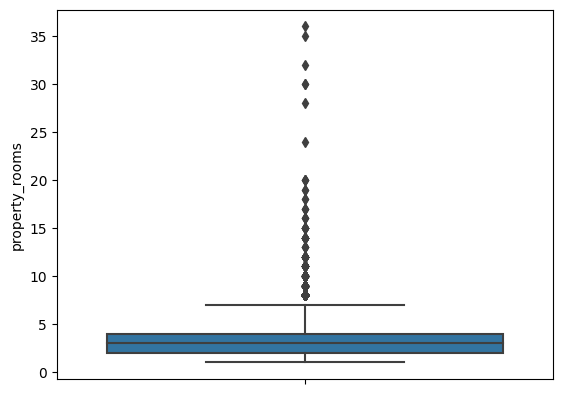

In [82]:
sns.boxplot(y=ds_train.property_rooms)
plt.show()

In [83]:
# Train
ds_train.drop(outlier_sup_rooms_iqr_train.index, inplace=True)
print(f"Los outliers sup de rooms en train post eliminacion son: {len(ds_train[ds_train['property_rooms'] > 7])}")

# Test
ds_test.drop(outlier_sup_rooms_iqr_test.index, inplace=True)
print(f"Los outliers sup de rooms en test post eliminacion son: {len(ds_test[ds_test['property_rooms'] > 7])}")

Los outliers sup de rooms en train post eliminacion son: 0
Los outliers sup de rooms en test post eliminacion son: 0


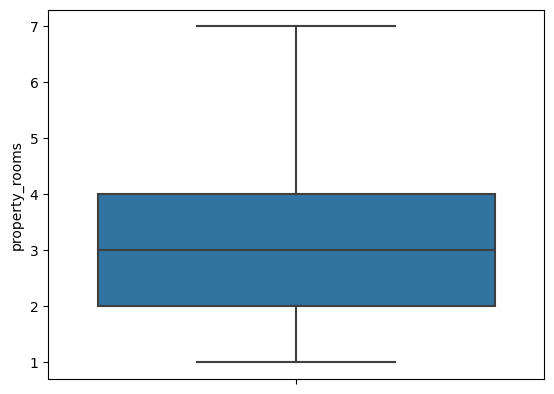

In [84]:
sns.boxplot(y=ds_train.property_rooms)
plt.show()

**Habitaciones**

Moderated outliers limits [min: -0.5,max: 3.5]
Severe outliers limits [min: -2.0,max: 5.0]


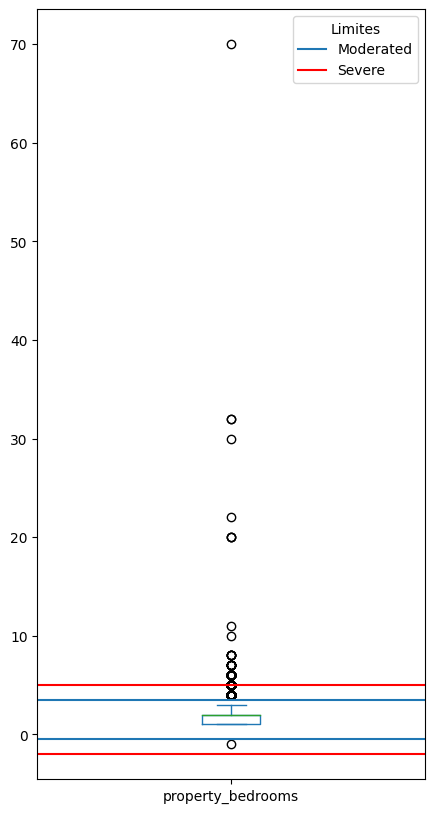

In [85]:
boxplot_with_outliers(ds_train, 'property_bedrooms')

cantidad de datos del ds: 73796
outliers encontrados para los property_bedrooms: 4392
hay 5% de outliers de property_bedrooms sobre el ds
limit sup: 3.5, limite inf: -0.5


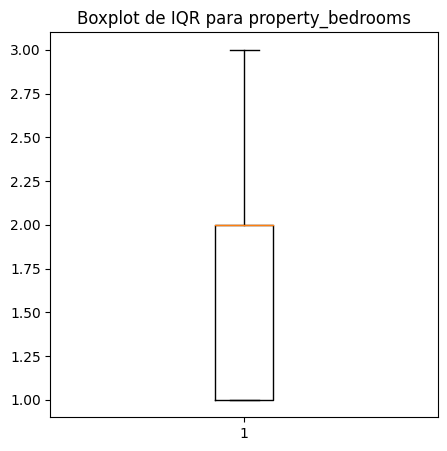

In [86]:
calculate_univariate_iqr(ds_train.property_bedrooms, ds_train)

In [87]:
# Train
outlier_inf_bedrooms_iqr_train = ds_train[ds_train['property_bedrooms'] < 0]
outlier_sup_bedrooms_iqr_train = ds_train[ds_train['property_bedrooms'] > 6]
print(
    f"Los outliers inf de bedrooms son: {len(outlier_inf_bedrooms_iqr_train)}. Constituyen al {(len(outlier_inf_bedrooms_iqr_train) * 100) // len(ds_train.property_bedrooms)}% de los datos")
print(
    f"Los outliers sup de bedrooms son: {len(outlier_sup_bedrooms_iqr_train)}. Constituyen al {(len(outlier_sup_bedrooms_iqr_train) * 100) // len(ds_train.property_bedrooms)}% de los datos")

# Test

outlier_inf_bedrooms_iqr_test = ds_test[ds_test['property_bedrooms'] < 0]
outlier_sup_bedrooms_iqr_test = ds_test[ds_test['property_bedrooms'] > 6]
print(
    f"Los outliers inf de bedrooms son: {len(outlier_inf_bedrooms_iqr_test)}. Constituyen al {(len(outlier_inf_bedrooms_iqr_test) * 100) // len(ds_test.property_bedrooms)}% de los datos")
print(
    f"Los outliers sup de bedrooms son: {len(outlier_sup_bedrooms_iqr_test)}. Constituyen al {(len(outlier_sup_bedrooms_iqr_test) * 100) // len(ds_test.property_bedrooms)}% de los datos")

Los outliers inf de bedrooms son: 1. Constituyen al 0% de los datos
Los outliers sup de bedrooms son: 29. Constituyen al 0% de los datos
Los outliers inf de bedrooms son: 0. Constituyen al 0% de los datos
Los outliers sup de bedrooms son: 5. Constituyen al 0% de los datos


In [88]:
# Train

print(f"fila a eliminar: {ds_train[ds_train['property_bedrooms'] < 0]}")
indice_outlier = outlier_inf_bedrooms_iqr_train.index
ds_train.drop(indice_outlier, inplace=True)
print(f"Se han eliminado: {len(indice_outlier)} registros en train")

# Test

print(f"filas a eliminar: {ds_test[ds_test['property_bedrooms'] < 0]}")
indice_outlier = outlier_inf_bedrooms_iqr_test.index
ds_test.drop(indice_outlier, inplace=True)
print(f"Se han eliminado: {len(indice_outlier)} registros en test")

fila a eliminar:                               id start_date   end_date    latitud   longitud  \
406880  3WI+zCCMeb9TR5kOBm7rhg== 2021-01-07 2021-03-18 -34.577595 -58.495185   

             place_l3 property_type  property_rooms  property_bedrooms  \
406880  Villa Urquiza  Departamento             2.0               -1.0   

        property_surface_total  property_surface_covered  property_price  \
406880                    61.0                      43.0        125000.0   

                                           property_title  
406880  Jardines de Roosevelt - Hermoso 3 ambientes co...  
Se han eliminado: 1 registros en train
filas a eliminar: Empty DataFrame
Columns: [id, start_date, end_date, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, property_title]
Index: []
Se han eliminado: 0 registros en test


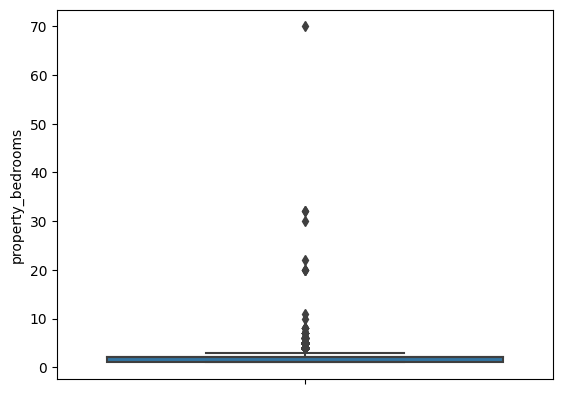

In [89]:
sns.boxplot(y=ds_train.property_bedrooms)
plt.show()

In [90]:
print("Ejemplos: ")
len(f"AMB < HAB = {len(outlier_sup_bedrooms_iqr_train[outlier_sup_bedrooms_iqr_train.property_rooms < outlier_sup_bedrooms_iqr_train.property_rooms])}")

Ejemplos: 


13

In [91]:
# Train

indice_outlier_train = outlier_sup_bedrooms_iqr_train.index
ds_train.drop(indice_outlier_train, inplace=True)
print(f"Se han eliminado: {len(indice_outlier_train)} registros en train")

# Test

indice_outlier_test = outlier_sup_bedrooms_iqr_test.index
ds_test.drop(indice_outlier_test, inplace=True)
print(f"Se han eliminado: {len(indice_outlier_test)} registros en test")

Se han eliminado: 29 registros en train
Se han eliminado: 5 registros en test


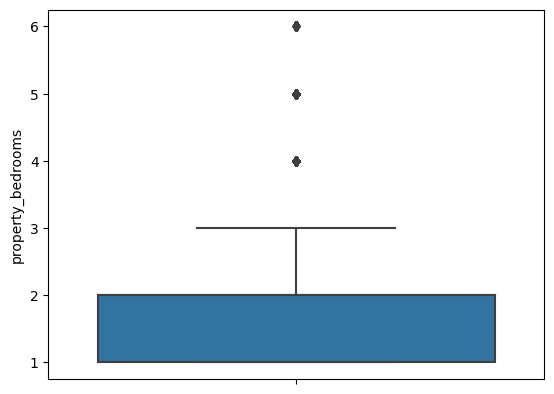

In [92]:
sns.boxplot(y=ds_train.property_bedrooms)
plt.show()

**Superficie Total**

cantidad de datos del ds: 73766
outliers encontrados para los property_surface_total: 6049
hay 8% de outliers de property_surface_total sobre el ds
limit sup: 184.0, limite inf: -40.0


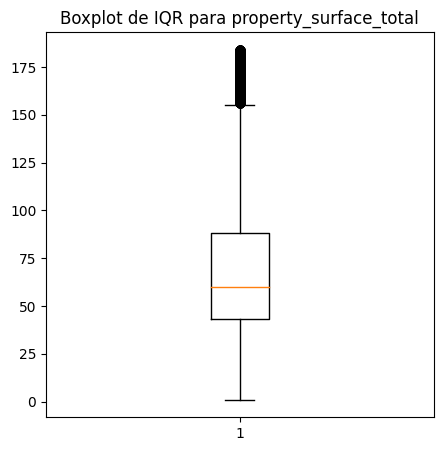

In [93]:
calculate_univariate_iqr(ds_train.property_surface_total, ds_train)

In [94]:
# Train

indice_outlier_train = ds_train[ds_train.property_surface_total < 18].index
ds_train.drop(indice_outlier_train, inplace=True)
print(f"Se han eliminado: {len(indice_outlier_train)} registros en train")

# Test

indice_outlier_test = ds_test[ds_test.property_surface_total < 18].index
ds_test.drop(indice_outlier_test, inplace=True)
print(f"Se han eliminado: {len(indice_outlier_test)} registros en test")

Se han eliminado: 72 registros en train
Se han eliminado: 21 registros en test


In [95]:
inf, sup = boxplot_outliers_edges(ds_train.property_surface_total, False)
print(f"Nuestro rango intercuartil está comprendido entre: {inf}, {sup}")

Nuestro rango intercuartil está comprendido entre: -124.0, 268.0


In [96]:
# Train

outlier_inf_total_iqr_train = ds_train[ds_train['property_surface_total'] < -44]
outlier_sup_total_iqr_train = ds_train[ds_train['property_surface_total'] > 191]
print(
    f"Los outliers inf de sup total en train son: {len(outlier_inf_total_iqr_train)}. Constituyen al {(len(outlier_inf_total_iqr_train) * 100) // len(ds_train.property_surface_total)}% de los datos")
print(
    f"Los outliers sup de sup total en train son: {len(outlier_sup_total_iqr_train)}. Constituyen al {(len(outlier_sup_total_iqr_train) * 100) // len(ds_train.property_surface_total)}% de los datos")

# Test

outlier_inf_total_iqr_test = ds_test[ds_test['property_surface_total'] < -44]
outlier_sup_total_iqr_test = ds_test[ds_test['property_surface_total'] > 191]
print(
    f"Los outliers inf de sup total en test son: {len(outlier_inf_total_iqr_test)}. Constituyen al {(len(outlier_inf_total_iqr_test) * 100) // len(ds_test.property_surface_total)}% de los datos")
print(
    f"Los outliers sup de sup total en test son: {len(outlier_sup_total_iqr_test)}. Constituyen al {(len(outlier_sup_total_iqr_test) * 100) // len(ds_test.property_surface_total)}% de los datos")

Los outliers inf de sup total en train son: 0. Constituyen al 0% de los datos
Los outliers sup de sup total en train son: 5524. Constituyen al 7% de los datos
Los outliers inf de sup total en test son: 0. Constituyen al 0% de los datos
Los outliers sup de sup total en test son: 1393. Constituyen al 7% de los datos


Moderated outliers limits [min: -40.0,max: 184.0]
Severe outliers limits [min: -124.0,max: 268.0]


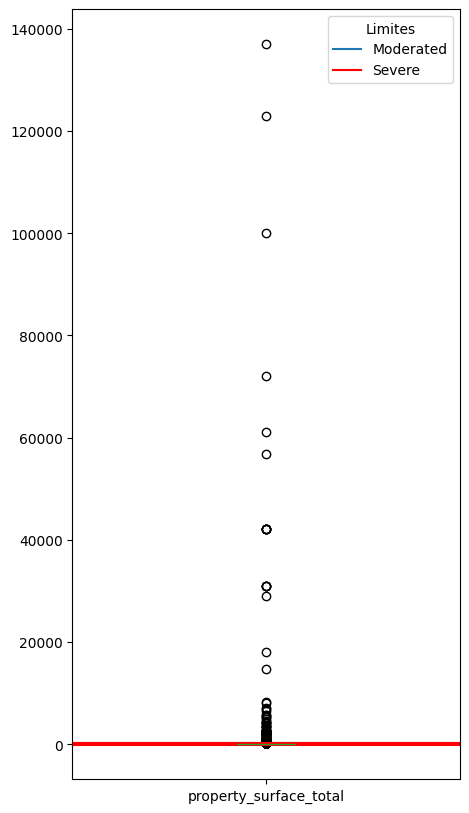

In [97]:
boxplot_with_outliers(ds_train, ds_train.property_surface_total.name)

0-272       3192
272-500     2045
500-750      185
1000-inf      79
750-1000      23
Name: property_surface_total, dtype: int64


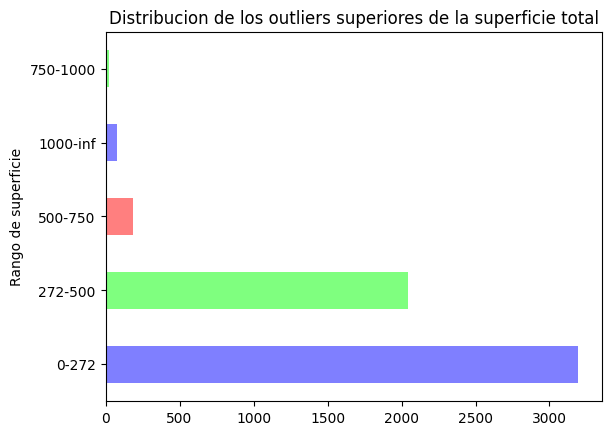

In [98]:
property_surface_grouped = pd.cut(outlier_sup_total_iqr_train.property_surface_total,
                                  bins=[0, 272, 500, 750, 1000, float("inf")],
                                  labels=["0-272", "272-500", "500-750", "750-1000", "1000-inf"], include_lowest=True)
print(property_surface_grouped.value_counts())
ax = property_surface_grouped.value_counts().plot.barh(alpha=0.5, color=colores,
                                                       title="Distribucion de los outliers superiores de la superficie total",
                                                       xlabel="Rango de superficie", ylabel="Frecuencia")

In [99]:
surface_median = ds_train[ds_train.property_type == 'Casa'].property_surface_total.median()
print(
    f"Si bien la mediana de la superficite total es {surface_median} y limite superior de outliers severos es 272, consideramos que sigue siendo un valor válido, por lo tanto, descartaremos los valores mayores a 500")
    
    
    

Si bien la mediana de la superficite total es 220.0 y limite superior de outliers severos es 272, consideramos que sigue siendo un valor válido, por lo tanto, descartaremos los valores mayores a 500


In [100]:
# Train

outlier_sup_total_500_train = ds_train[ds_train['property_surface_total'] > 500]
print(
    f"Los outliers superiores de sup total en train son: {len(ds_train[ds_train['property_surface_total'] > 500])}. Constituyen al {(len(ds_train[ds_train['property_surface_total'] > 500]) * 100) // len(ds_train.property_surface_total)}% de los datos")

# Test

outlier_sup_total_500_test = ds_test[ds_test['property_surface_total'] > 500]
print(
    f"Los outliers superiores de sup total en test son: {len(ds_test[ds_test['property_surface_total'] > 500])}. Constituyen al {(len(ds_test[ds_test['property_surface_total'] > 500]) * 100) // len(ds_test.property_surface_total)}% de los datos")




Los outliers superiores de sup total en train son: 287. Constituyen al 0% de los datos
Los outliers superiores de sup total en test son: 82. Constituyen al 0% de los datos


Moderated outliers limits [min: -40.0,max: 184.0]
Severe outliers limits [min: -124.0,max: 268.0]


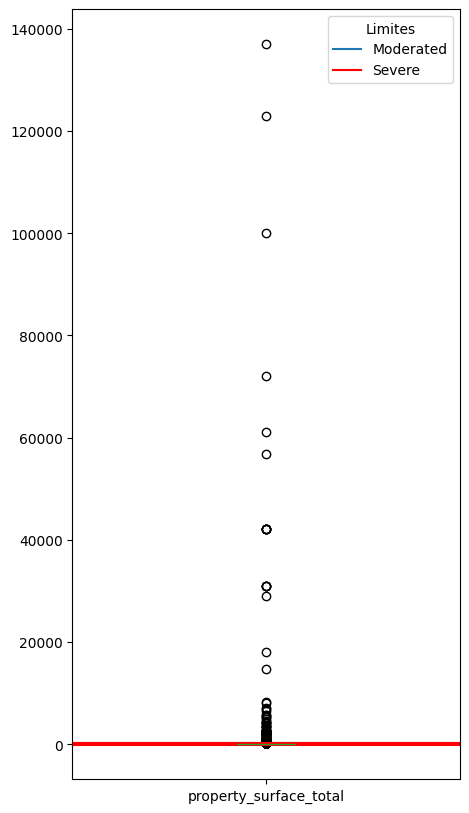

In [101]:
boxplot_with_outliers(ds_train, 'property_surface_total')

In [102]:
# Train

indice_outlier_train = outlier_sup_total_500_train.index
ds_train.drop(indice_outlier_train, inplace=True)
print(f"Se han eliminado: {len(indice_outlier_train)} registros en train")

# Test

indice_outlier_test = outlier_sup_total_500_test.index
ds_test.drop(indice_outlier_test, inplace=True)
print(f"Se han eliminado: {len(indice_outlier_test)} registros en test")

Se han eliminado: 287 registros en train
Se han eliminado: 82 registros en test


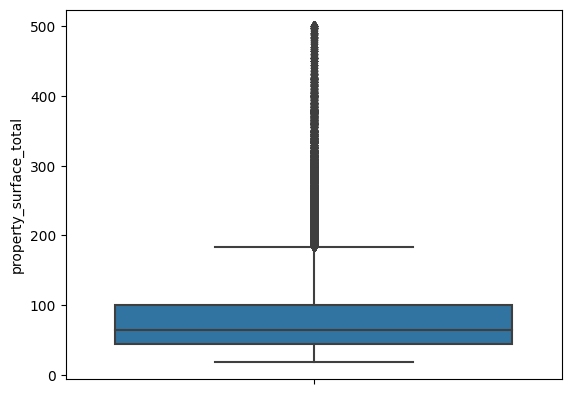

In [103]:
sns.boxplot(y=ds_train.property_surface_total)
plt.show()

**Superficie cubierta**

cantidad de datos del ds: 73407
outliers encontrados para los property_surface_covered: 5752
hay 7% de outliers de property_surface_covered sobre el ds
limit sup: 155.0, limite inf: -29.0


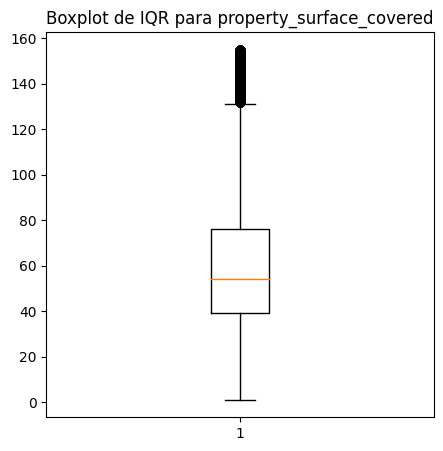

In [104]:
calculate_univariate_iqr(ds_train.property_surface_covered, ds_train)

In [105]:
# Train

outlier_inf_covered_iqr_train = ds_train[ds_train['property_surface_covered'] < 0]
outlier_sup_covered_iqr_train = ds_train[ds_train['property_surface_covered'] > 155]
print(
    f"Los outliers inf de sup cubierta en train son: {len(outlier_inf_covered_iqr_train)}. Constituyen al {(len(outlier_inf_covered_iqr_train) * 100) // len(ds_train.property_surface_covered)}% de los datos")
print(
    f"Los outliers sup de sup cubierta en train son: {len(outlier_sup_covered_iqr_train)}. Constituyen al {(len(outlier_sup_covered_iqr_train) * 100) // len(ds_train.property_surface_covered)}% de los datos")

# Test

outlier_inf_covered_iqr_test = ds_test[ds_test['property_surface_covered'] < 0]
outlier_sup_covered_iqr_test = ds_test[ds_test['property_surface_covered'] > 155]
print(
    f"Los outliers inf de sup cubierta en test son: {len(outlier_inf_covered_iqr_test)}. Constituyen al {(len(outlier_inf_covered_iqr_test) * 100) // len(ds_test.property_surface_covered)}% de los datos")
print(
    f"Los outliers sup de sup cubierta en test son: {len(outlier_sup_covered_iqr_test)}. Constituyen al {(len(outlier_sup_covered_iqr_test) * 100) // len(ds_test.property_surface_covered)}% de los datos")

Los outliers inf de sup cubierta en train son: 0. Constituyen al 0% de los datos
Los outliers sup de sup cubierta en train son: 5659. Constituyen al 7% de los datos
Los outliers inf de sup cubierta en test son: 0. Constituyen al 0% de los datos
Los outliers sup de sup cubierta en test son: 1396. Constituyen al 7% de los datos


Moderated outliers limits [min: -29.0,max: 155.0]
Severe outliers limits [min: -98.0,max: 224.0]


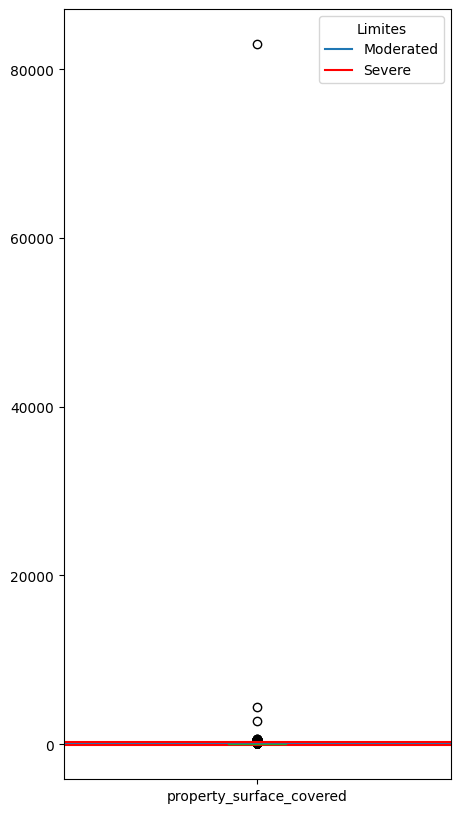

In [106]:
boxplot_with_outliers(ds_train, 'property_surface_covered')

Moderated outliers limits [min: -29.0,max: 155.0]
Severe outliers limits [min: -98.0,max: 224.0]


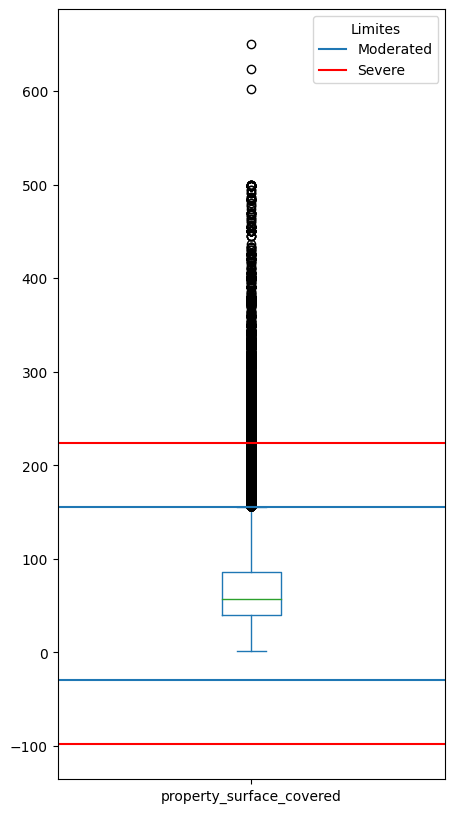

In [107]:
boxplot_with_outliers(ds_train[ds_train.property_surface_covered < 750], 'property_surface_covered')

0-224       3142
224-500     2292
500-750       63
1000-inf      19
750-1000       8
Name: property_surface_covered, dtype: int64


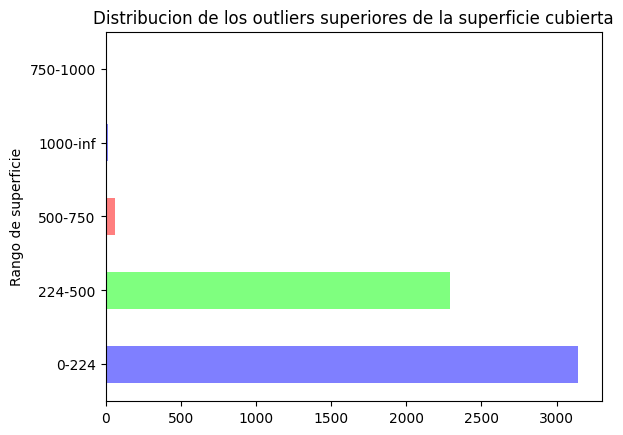

In [108]:
surface_total_grouped = pd.cut(outlier_sup_total_iqr_train.property_surface_covered,
                               bins=[0, 224, 500, 750, 1000, float("inf")],
                               labels=["0-224", "224-500", "500-750", "750-1000", "1000-inf"], include_lowest=True)
print(surface_total_grouped.value_counts())
ax = surface_total_grouped.value_counts().plot.barh(alpha=0.5, color=colores,
                                                    title="Distribucion de los outliers superiores de la superficie cubierta",
                                                    xlabel="Rango de superficie", ylabel="Frecuencia")

In [109]:
# Train

outlier_sup_cubierta_500 = ds_train[ds_train['property_surface_covered'] > 500]
indice_outlier_train = outlier_sup_cubierta_500.index
ds_train.drop(indice_outlier_train, inplace=True)
print(f"Se han eliminado: {len(indice_outlier_train)} registros en train")

# Test

outlier_sup_cubierta_500 = ds_test[ds_test['property_surface_covered'] > 500]
indice_outlier_test = outlier_sup_cubierta_500.index
ds_test.drop(indice_outlier_test, inplace=True)
print(f"Se han eliminado: {len(indice_outlier_test)} registros en test")

Se han eliminado: 6 registros en train
Se han eliminado: 1 registros en test


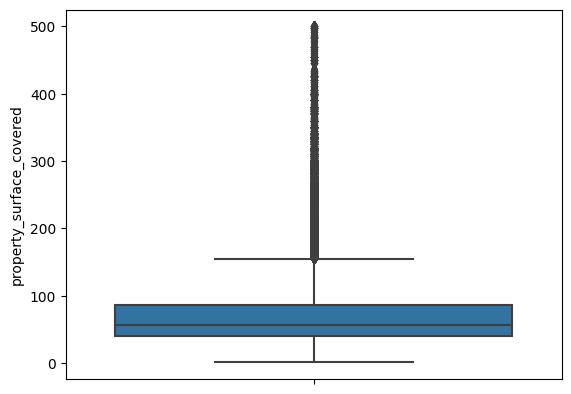

In [110]:
sns.boxplot(y=ds_train.property_surface_covered)
plt.show()

**Latitud y longitud**

cantidad de datos del ds: 73401
outliers encontrados para los latitud: 429
hay 0% de outliers de latitud sobre el ds
limit sup: -34.520214800000005, limite inf: -34.67269639999999


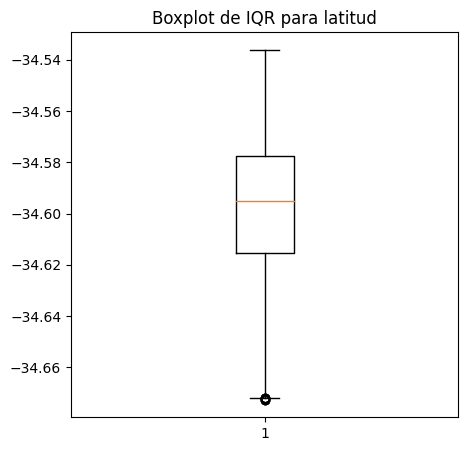

In [111]:
calculate_univariate_iqr(ds_train.latitud, ds_train)

cantidad de datos del ds: 73401
outliers encontrados para los longitud: 87
hay 0% de outliers de longitud sobre el ds
limit sup: -58.324435678, limite inf: -58.5502251532


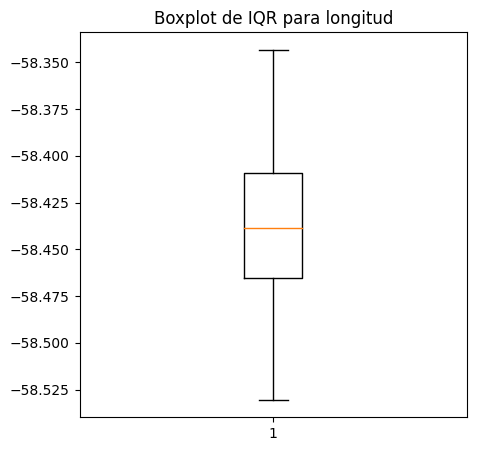

In [112]:
calculate_univariate_iqr(ds_train.longitud, ds_train)

In [113]:
# Train

outlier_inf_latitud_iqr_train = ds_train[ds_train['latitud'] < -34]
outlier_sup_latitud_iqr_train = ds_train[ds_train['latitud'] > -34]
print(
    f"Los outliers inf de latitud en train son: {len(outlier_inf_latitud_iqr_train)}. Constituyen al {(len(outlier_inf_latitud_iqr_train) * 100) // len(ds_train.latitud)}% de los datos")
print(
    f"Los outliers sup de latitud en train son: {len(outlier_sup_latitud_iqr_train)}. Constituyen al {(len(outlier_sup_latitud_iqr_train) * 100) // len(ds_train.latitud)}% de los datos")

# Test

outlier_inf_latitud_iqr_test = ds_test[ds_test['latitud'] < -34]
outlier_sup_latitud_iqr_test = ds_test[ds_test['latitud'] > -34]
print(
    f"Los outliers inf de latitud en test son: {len(outlier_inf_latitud_iqr_test)}. Constituyen al {(len(outlier_inf_latitud_iqr_test) * 100) // len(ds_test.latitud)}% de los datos")
print(
    f"Los outliers sup de latitud en test son: {len(outlier_sup_latitud_iqr_test)}. Constituyen al {(len(outlier_sup_latitud_iqr_test) * 100) // len(ds_test.latitud)}% de los datos")

Los outliers inf de latitud en train son: 73324. Constituyen al 99% de los datos
Los outliers sup de latitud en train son: 77. Constituyen al 0% de los datos
Los outliers inf de latitud en test son: 17685. Constituyen al 99% de los datos
Los outliers sup de latitud en test son: 19. Constituyen al 0% de los datos


#### Metodo Z score

In [114]:
def calculate_zscore_st(dataset, column):
    dataset_copy = dataset.copy()
    media = np.mean(column)
    std = np.std(column)
    dataset_copy[f'z_{column.name}'] = (column - media) / std
    return dataset_copy

**Ambientes**

In [115]:
z_rooms_ds = calculate_zscore_st(ds_train, ds_train.property_rooms)

In [116]:
# Train

print(
    f"Los outliers sup de rooms en train son: {len(z_rooms_ds[z_rooms_ds['z_property_rooms'] > 3])}. Constituyen al {(len(z_rooms_ds[z_rooms_ds['z_property_rooms'] > 3]) * 100) // len(ds_train.property_rooms)}% de los datos")
print(
    f"Los outliers inf de rooms en train son: {len(z_rooms_ds[z_rooms_ds['z_property_rooms'] < -3])}. Constituyen al {(len(z_rooms_ds[z_rooms_ds['z_property_rooms'] < -3]) * 100) // len(ds_train.property_rooms)}% de los datos")

# Test

print(
    f"Los outliers sup de rooms en test son: {len(z_rooms_ds[z_rooms_ds['z_property_rooms'] > 3])}. Constituyen al {(len(z_rooms_ds[z_rooms_ds['z_property_rooms'] > 3]) * 100) // len(ds_test.property_rooms)}% de los datos")
print(
    f"Los outliers inf de rooms en test son: {len(z_rooms_ds[z_rooms_ds['z_property_rooms'] < -3])}. Constituyen al {(len(z_rooms_ds[z_rooms_ds['z_property_rooms'] > 3]) * 100) // len(ds_test.property_rooms)}% de los datos")

Los outliers sup de rooms en train son: 534. Constituyen al 0% de los datos
Los outliers inf de rooms en train son: 0. Constituyen al 0% de los datos
Los outliers sup de rooms en test son: 534. Constituyen al 3% de los datos
Los outliers inf de rooms en test son: 0. Constituyen al 3% de los datos


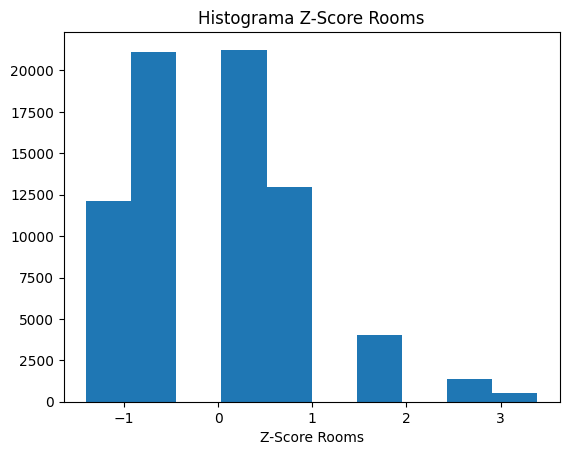

In [117]:
plt.hist(z_rooms_ds.z_property_rooms)
plt.title('Histograma Z-Score Rooms')
plt.xlabel('Z-Score Rooms')
plt.show()

**Habitaciones**

In [118]:
z_bedrooms_ds = calculate_zscore_st(ds_train, ds_train.property_bedrooms)

In [119]:
# Train

print(
    f"Los outliers sup de bedrooms en train son: {len(z_bedrooms_ds[z_bedrooms_ds['z_property_bedrooms'] > 3])}.Constituyen al {(len(z_bedrooms_ds[z_bedrooms_ds['z_property_bedrooms'] > 3]) * 100) // len(ds_train.property_bedrooms)}% de los datos")
z_bedrooms_ds[z_bedrooms_ds['z_property_bedrooms'] > 3]

print(
    f"Los outliers sup de bedrooms en test son: {len(z_bedrooms_ds[z_bedrooms_ds['z_property_bedrooms'] > 3])}.Constituyen al {(len(z_bedrooms_ds[z_bedrooms_ds['z_property_bedrooms'] > 3]) * 100) // len(ds_test.property_bedrooms)}% de los datos")
z_bedrooms_ds[z_bedrooms_ds['z_property_bedrooms'] > 3]

Los outliers sup de bedrooms en train son: 656.Constituyen al 0% de los datos
Los outliers sup de bedrooms en test son: 656.Constituyen al 3% de los datos


id start_date   end_date    latitud   longitud  \
302785  aUYsu/SiMSNmNCZTKuhiZw== 2021-08-26 2021-08-30 -34.579921 -58.423914   
18729   jbT6B64120xkmQ5mYHxPTA== 2021-08-28 2021-09-02 -34.625448 -58.524920   
412692  YRb+Xpi7J/ejXwYrcPjr6Q== 2021-09-18 2022-02-09 -34.626410 -58.378517   
203777  MQK7cGP2aR0BULOIDleEEw== 2021-05-10 2021-06-05 -34.575882 -58.407133   
35821   sZ1ZZyDKS3Q/kLScaBDdSg== 2021-02-08 2021-03-18 -34.655137 -58.465797   
...                          ...        ...        ...        ...        ...   
229574  4KphO1zjEyOra4yQLYjWxQ== 2021-07-27 2021-10-09 -34.664123 -58.504823   
160825  OoYSgYpTstswV4gp3oIOGg== 2021-10-07 2022-02-17 -34.635256 -58.415725   
377952  8sErp+9vCaCGtKWD7Zaf8Q== 2021-03-16 2021-03-23 -34.554519 -58.491599   
7553    l4o76FoGWy1tjotS6Z/AaQ== 2021-02-09 2022-07-01 -34.562310 -58.450953   
237223  /FFhsYLwQYb+dR4a6dembw== 2021-09-05 2021-10-10 -34.649149 -58.522432   

                 place_l3 property_type  property_rooms  property_bedrooms  \
302785            Palermo  Departamento             6.0                5.0   
18729           Versalles          Casa             6.0                5.0   
412692       Constitución  Departamento             6.0                5.0   
203777            Palermo  Departamento             6.0                5.0   
35821   Parque Avellaneda            PH             7.0                5.0   
...                   ...           ...             ...                ...   
229574          Mataderos            PH             6.0                5.0   
160825              Boedo          Casa             6.0                5.0   
377952           Saavedra          Casa             7.0                5.0   
7553             Belgrano  Departamento             6.0                5.0   
237223            Liniers          Casa             6.0                5.0   

        property_surface_total  property_surface_covered  property_price  \
302785                   158.0                     152.0        480000.0   
18729                    300.0                     200.0        400000.0   
412692                   143.0                     105.0        144900.0   
203777                   256.0                     226.0        890000.0   
35821                    149.0                     120.0         94900.0   
...                        ...                       ...             ...   
229574                   170.0                     150.0        149000.0   
160825                   268.0                     268.0        390000.0   
377952                   300.0                     300.0        596000.0   
7553                     380.0                     295.0       1180000.0   
237223                   280.0                     230.0        256000.0   

                                           property_title  z_property_bedrooms  
302785                             Departamento - Palermo             3.295928  
18729      Venta casa de 6 ambientes en Versalles Permuta             3.295928  
412692        VENTA DEPARTAMENTO 6 AMBIENTES EN MONSERRAT             3.295928  
203777                       Departamento - Palermo Chico             3.295928  
35821      Ph en tres plantas con terraza!! Oportunidad!!             3.295928  
...                                                   ...                  ...  
229574                                     PH - Mataderos             3.295928  
160825  Casa 6 ambientes con dependencia y jardín - Boedo             3.295928  
377952  Saavedra - Casa en 2 plantas. 5 ambientes. Jar...             3.295928  
7553                              Departamento - Belgrano             3.295928  
237223             CASA 6 AMB COCHERA EN LINIERS HERMOSA              3.295928  

[656 rows x 14 columns]

In [120]:
# Train

print(
    f"Los outliers inf de bedrooms en train son: {len(z_bedrooms_ds[z_bedrooms_ds['z_property_bedrooms'] < -3])}.Constituyen al {(len(z_bedrooms_ds[z_bedrooms_ds['z_property_bedrooms'] < -3]) * 100) // len(ds_train.property_bedrooms)}% de los datos")
z_bedrooms_ds[z_bedrooms_ds['z_property_bedrooms'] < -3]

# Test

print(
    f"Los outliers inf de bedrooms en test son: {len(z_bedrooms_ds[z_bedrooms_ds['z_property_bedrooms'] < -3])}.Constituyen al {(len(z_bedrooms_ds[z_bedrooms_ds['z_property_bedrooms'] < -3]) * 100) // len(ds_test.property_bedrooms)}% de los datos")
z_bedrooms_ds[z_bedrooms_ds['z_property_bedrooms'] < -3]

Los outliers inf de bedrooms en train son: 0.Constituyen al 0% de los datos
Los outliers inf de bedrooms en test son: 0.Constituyen al 0% de los datos


Empty DataFrame
Columns: [id, start_date, end_date, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, property_title, z_property_bedrooms]
Index: []

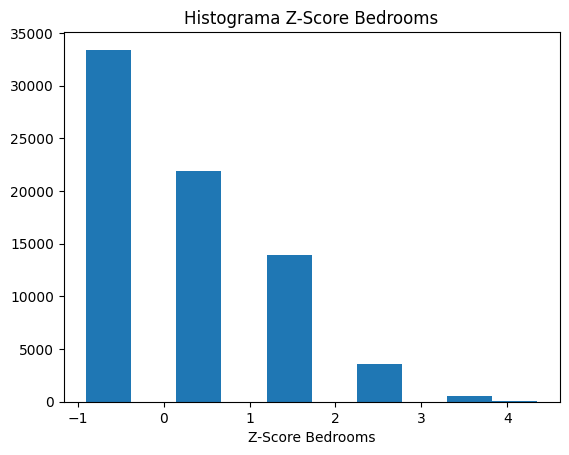

In [121]:
plt.hist(z_bedrooms_ds.z_property_bedrooms)
plt.title('Histograma Z-Score Bedrooms')
plt.xlabel('Z-Score Bedrooms')
plt.show()

**Superficie Total**

In [122]:
z_total_ds = calculate_zscore_st(ds_train, ds_train.property_surface_total)

In [123]:
# Train

print(
    f"Los outliers superiores de sup total en train son: {len(z_total_ds[z_total_ds['z_property_surface_total'] > 3])}. Constituyen al {(len(z_total_ds[z_total_ds['z_property_surface_total'] > 3]) * 100) // len(ds_train.property_surface_total)}% de los datos")
z_total_ds[z_total_ds['z_property_surface_total'] > 3].head()

# Test

print(
    f"Los outliers superiores de sup total en test son: {len(z_total_ds[z_total_ds['z_property_surface_total'] > 3])}. Constituyen al {(len(z_total_ds[z_total_ds['z_property_surface_total'] > 3]) * 100) // len(ds_test.property_surface_total)}% de los datos")
z_total_ds[z_total_ds['z_property_surface_total'] > 3].head()

Los outliers superiores de sup total en train son: 1831. Constituyen al 2% de los datos
Los outliers superiores de sup total en test son: 1831. Constituyen al 10% de los datos


id start_date   end_date    latitud   longitud  \
375309  CSI/oNZqoTTLT8Ui5bYc+A== 2021-10-13 2021-12-11 -34.591681 -58.379194   
274519  VPOuMnTJ+492fyfGy/1+yg== 2021-09-15 2021-09-20 -34.574418 -58.419747   
184242  ig2lE0pUuS+psaMN2mT0BA== 2021-06-06 2021-10-17 -34.615804 -58.457114   
18729   jbT6B64120xkmQ5mYHxPTA== 2021-08-28 2021-09-02 -34.625448 -58.524920   
382827  vSMNSdzp2T83++a5W1nS9A== 2021-04-27 2021-06-05 -34.598979 -58.460782   

         place_l3 property_type  property_rooms  property_bedrooms  \
375309     Retiro  Departamento             7.0                4.0   
274519    Palermo  Departamento             4.0                3.0   
184242  Caballito            PH             1.0                1.0   
18729   Versalles          Casa             6.0                5.0   
382827   Paternal            PH             6.0                4.0   

        property_surface_total  property_surface_covered  property_price  \
375309                   340.0                     321.0        750000.0   
274519                   320.0                     240.0        785000.0   
184242                   376.0                     288.0        299900.0   
18729                    300.0                     200.0        400000.0   
382827                   414.0                     194.0        290000.0   

                                           property_title  \
375309                              Departamento - Retiro   
274519                       Departamento - Palermo Nuevo   
184242  PH-LOFT 367 M2.COCHERAS. A REFACCIONAR .CABALLITO   
18729      Venta casa de 6 ambientes en Versalles Permuta   
382827  PH de 5 Amb con estudio, patio y lavadero. Pat...   

        z_property_surface_total  
375309                  3.878000  
274519                  3.573227  
184242                  4.426591  
18729                   3.268455  
382827                  5.005659

In [124]:
# Train

print(
    f"Los outliers inf de sup total en train son: {len(z_total_ds[z_total_ds['z_property_surface_total'] < -3])}. Constituyen al {(len(z_total_ds[z_total_ds['z_property_surface_total'] < -3]) * 100) // len(ds_train.property_surface_total)}% de los datos")
z_total_ds[z_total_ds['z_property_surface_total'] < -3]

# Test

print(
    f"Los outliers inf de sup total en test son: {len(z_total_ds[z_total_ds['z_property_surface_total'] < -3])}. Constituyen al {(len(z_total_ds[z_total_ds['z_property_surface_total'] < -3]) * 100) // len(ds_test.property_surface_total)}% de los datos")
z_total_ds[z_total_ds['z_property_surface_total'] < -3]

Los outliers inf de sup total en train son: 0. Constituyen al 0% de los datos
Los outliers inf de sup total en test son: 0. Constituyen al 0% de los datos


Empty DataFrame
Columns: [id, start_date, end_date, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, property_title, z_property_surface_total]
Index: []

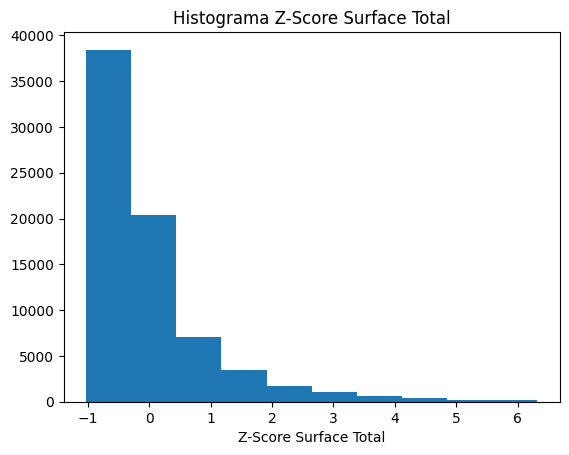

In [125]:
plt.hist(z_total_ds.z_property_surface_total)
plt.title('Histograma Z-Score Surface Total')
plt.xlabel('Z-Score Surface Total')
plt.show()

**Superficie Cubierta**

In [126]:
z_covered_ds = calculate_zscore_st(ds_train, ds_train.property_surface_covered)

In [127]:
# Train

print(
    f"Los outliers superiores de sup cubierta en train son: {len(z_covered_ds[z_covered_ds['z_property_surface_covered'] > 3])}. Constituyen al {(len(z_covered_ds[z_covered_ds['z_property_surface_covered'] > 3]) * 100) // len(ds_train.property_surface_covered)}% de los datos")
z_covered_ds[z_covered_ds['z_property_surface_covered'] > 3]

# Test

print(
    f"Los outliers superiores de sup cubierta en test son: {len(z_covered_ds[z_covered_ds['z_property_surface_covered'] > 3])}. Constituyen al {(len(z_covered_ds[z_covered_ds['z_property_surface_covered'] > 3]) * 100) // len(ds_test.property_surface_covered)}% de los datos")
z_covered_ds[z_covered_ds['z_property_surface_covered'] > 3]

Los outliers superiores de sup cubierta en train son: 1748. Constituyen al 2% de los datos
Los outliers superiores de sup cubierta en test son: 1748. Constituyen al 9% de los datos


id start_date   end_date    latitud   longitud  \
375309  CSI/oNZqoTTLT8Ui5bYc+A== 2021-10-13 2021-12-11 -34.591681 -58.379194   
184242  ig2lE0pUuS+psaMN2mT0BA== 2021-06-06 2021-10-17 -34.615804 -58.457114   
39553   Vw676bwJPWs1/WE833Zx3A== 2021-07-30 2022-03-24 -34.558275 -58.457193   
7535    DpwtjCZsDstzBO4JDR3D1w== 2021-02-09 2021-03-03 -34.561998 -58.447006   
104720  lGeP8zN7pZzfOqx7+SrVjQ== 2021-09-10 2022-02-09 -34.605521 -58.497768   
...                          ...        ...        ...        ...        ...   
184283  6WVWpV5VYPI77ULI+2D7Zg== 2021-06-06 2021-06-18 -34.610453 -58.470005   
146127  hUcunhm2EEPvGQsN7K1p7w== 2021-08-30 2021-09-29 -34.612289 -58.359324   
301408  BJB5fjZvWcKUm6iy3PVaBw== 2021-08-10 2022-01-01 -34.586154 -58.390111   
310145  1rkhUvok/6BU+3qpAfea9w== 2021-09-01 2021-10-03 -34.576959 -58.405434   
451181  M+pL/kZFZchuhJjNrNmM8w== 2021-12-16 2022-02-09 -34.608408 -58.510856   

                   place_l3 property_type  property_rooms  property_bedrooms  \
375309               Retiro  Departamento             7.0                4.0   
184242            Caballito            PH             1.0                1.0   
39553              Belgrano  Departamento             5.0                4.0   
7535               Belgrano  Departamento             7.0                4.0   
104720         Villa Devoto          Casa             6.0                4.0   
...                     ...           ...             ...                ...   
184283  Villa General Mitre            PH             4.0                3.0   
146127        Puerto Madero  Departamento             6.0                4.0   
301408             Recoleta  Departamento             6.0                3.0   
310145              Palermo  Departamento             6.0                3.0   
451181             Barracas            PH             5.0                3.0   

        property_surface_total  property_surface_covered  property_price  \
375309                   340.0                     321.0        750000.0   
184242                   376.0                     288.0        299900.0   
39553                    250.0                     245.0        650000.0   
7535                     263.0                     263.0        850000.0   
104720                   382.0                     292.0        450000.0   
...                        ...                       ...             ...   
184283                   388.0                     338.0        330000.0   
146127                   426.0                     426.0       4000000.0   
301408                   270.0                     252.0       1850000.0   
310145                   270.0                     270.0        845000.0   
451181                   368.0                     288.0        369900.0   

                                           property_title  \
375309                              Departamento - Retiro   
184242  PH-LOFT 367 M2.COCHERAS. A REFACCIONAR .CABALLITO   
39553   Departamento duplex de 250m2 con dos cocheras ...   
7535    VENTA excelente PISO vista RIO y Club Belgrano...   
104720   Venta Casa 6 amb Jardin y Quincho Concordia 2777   
...                                                   ...   
184283   2 PH mas LOCAL en VENTA A RECICLAR VILLA G MITRE   
146127  VENTA importante PISO alto COMPLETO en torre E...   
301408  Reciclado tipo FOA, Espectacular vista sobre l...   
310145  Venta Departamento Palermo Chico PISO 270 m2 3...   
451181                   VENTA PH 5 AMBIENTES EN BARRACAS   

        z_property_surface_covered  
375309                    4.410870  
184242                    3.820476  
39553                     3.051174  
7535                      3.373207  
104720                    3.892039  
...                            ...  
184283                    4.715012  
146127                    6.289397  
301408                    3.176409  
310145                    3.498443  
451181                    3.820476  

[1748 rows x 14 c

In [128]:
# Train

print(
    f"Los outliers inferiores de sup cubierta en train son: {len(z_covered_ds[z_covered_ds['z_property_surface_covered'] < -3])}. Constituyen al {(len(z_covered_ds[z_covered_ds['z_property_surface_covered'] < -3]) * 100) // len(ds_train.property_surface_covered)}% de los datos")
z_covered_ds[z_covered_ds['z_property_surface_covered'] < -3]

# Test

print(
    f"Los outliers inferiores de sup cubierta en test son: {len(z_covered_ds[z_covered_ds['z_property_surface_covered'] < -3])}. Constituyen al {(len(z_covered_ds[z_covered_ds['z_property_surface_covered'] < -3]) * 100) // len(ds_test.property_surface_covered)}% de los datos")
z_covered_ds[z_covered_ds['z_property_surface_covered'] < -3]

Los outliers inferiores de sup cubierta en train son: 0. Constituyen al 0% de los datos
Los outliers inferiores de sup cubierta en test son: 0. Constituyen al 0% de los datos


Empty DataFrame
Columns: [id, start_date, end_date, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, property_title, z_property_surface_covered]
Index: []

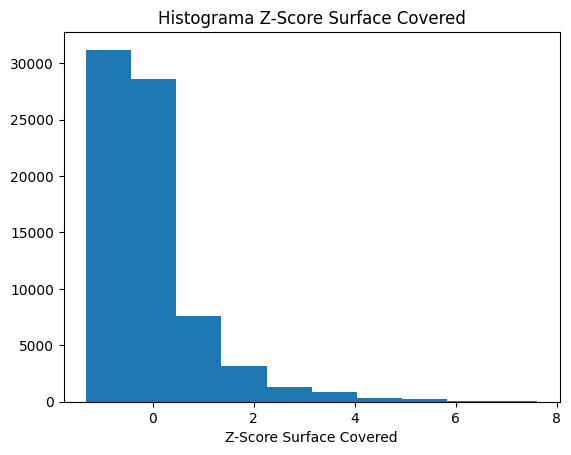

In [129]:
plt.hist(z_covered_ds.z_property_surface_covered)
plt.title('Histograma Z-Score Surface Covered')
plt.xlabel('Z-Score Surface Covered')
plt.show()

**Latitud y Longitud**

In [130]:
z_latitud_ds = calculate_zscore_st(ds_train, ds_train.latitud)

In [131]:
# Train

print(
    f"Los outliers superiores de latitud en train son: {len(z_latitud_ds[z_latitud_ds['z_latitud'] > 3])}. Constituyen al {(len(z_latitud_ds[z_latitud_ds['z_latitud'] > 3]) * 100) // len(ds_train.latitud)}% de los datos")
z_latitud_ds[z_latitud_ds['z_latitud'] > 3]

# Test

print(
    f"Los outliers superiores de latitud en test son: {len(z_latitud_ds[z_latitud_ds['z_latitud'] > 3])}. Constituyen al {(len(z_latitud_ds[z_latitud_ds['z_latitud'] > 3]) * 100) // len(ds_test.latitud)}% de los datos")
z_latitud_ds[z_latitud_ds['z_latitud'] > 3]

Los outliers superiores de latitud en train son: 80. Constituyen al 0% de los datos
Los outliers superiores de latitud en test son: 80. Constituyen al 0% de los datos


id start_date   end_date    latitud   longitud  \
226093  /3HzGdxDHF3F6Syq9x0Ptg== 2021-01-09 2021-01-10 -33.081030 -68.468140   
220851  /4CiKZFK0D3wJRClv4OO8Q== 2021-06-30 2021-07-02 -27.581620 -56.682310   
190823  vUl2yxnOaxBZr/+h5m2TOQ== 2021-11-01 2022-01-27 -31.291586 -64.292297   
234893  FmDOCgqTy/T9iZXvORmyuw== 2021-06-02 2021-06-18 -27.631190 -55.496357   
20196   yRtQDzAD+pg44SO/rnuP7g== 2021-03-15 2021-11-04 -31.473705 -64.193142   
...                          ...        ...        ...        ...        ...   
57097   0dafkOSbRnRyb1kvIdFlCw== 2021-04-20 2021-04-25 -34.128668 -63.376624   
107791  u74hqeFj1Cj8baglm/LrYg== 2021-07-16 2021-08-08 -33.762758 -61.966286   
131184  b2BGl5vIpo+uE+4U3nIDuw== 2021-05-27 2021-06-05 -31.418031 -64.506336   
58773   wZsceZ/M1uZO47xFYmwytw== 2021-03-13 2021-03-16 -31.670423 -60.764403   
102563  2RElZjaDk7sMtqYaODP8PA== 2021-05-28 2021-06-05 -32.962151 -60.646585   

       place_l3 property_type  property_rooms  property_bedrooms  \
226093      NaN  Departamento             2.0                1.0   
220851      NaN          Casa             4.0                2.0   
190823      NaN          Casa             3.0                2.0   
234893      NaN  Departamento             4.0                3.0   
20196       NaN  Departamento             1.0                1.0   
...         ...           ...             ...                ...   
57097       NaN  Departamento             2.0                1.0   
107791      NaN          Casa             4.0                3.0   
131184      NaN  Departamento             2.0                1.0   
58773       NaN          Casa             4.0                3.0   
102563      NaN  Departamento             1.0                1.0   

        property_surface_total  property_surface_covered  property_price  \
226093                    51.0                      51.0         85000.0   
220851                   105.0                     105.0        190000.0   
190823                   267.0                     104.0         85000.0   
234893                    98.0                      88.0        269000.0   
20196                     38.0                      38.0         53000.0   
...                        ...                       ...             ...   
57097                     43.0                      40.0         77500.0   
107791                   180.0                     160.0        154000.0   
131184                    50.0                      50.0         75000.0   
58773                    189.0                     189.0        165000.0   
102563                    47.0                      47.0         59000.0   

                                           property_title  z_latitud  
226093  Vta. 2 Amb. Pozo "Las Victorias Plaza". Entr. ...  10.621122  
220851       Casa jardín 2 dorm escrit. a 1 cdra Estación  49.236612  
190823                 Duplex 2 Dormitorios Villa Allende  23.186150  
234893  Venta departamento 4 amb Vicente Lopez con cochea  48.888544  
20196   Departamento 1 dormitorio A ESTRENAR - Ituzain...  21.907357  
...                                                   ...        ...  
57097   Venta Depto 2amb c/balcon oport/ a estr Saenz ...   3.264868  
107791  VENTA Casa 4 ambientes en Los caracoles Maschwitz   5.834198  
131184         VENTA DE DEPARTAMENTO EN CARLOS PAZ CENTRO  22.298291  
58773      HERMOSA CASA 4 AMB. CON JARDIN EN LUJAN CENTRO  20.526054  
102563            Departamento en venta de un dormitorio   11.455864  

[80 rows x 14 columns]

In [132]:
# Train

print(
    f"Los outliers inferiores de latitud en train son: {len(z_latitud_ds[z_latitud_ds['z_latitud'] < -3])}. Constituyen al {(len(z_latitud_ds[z_latitud_ds['z_latitud'] < -3]) * 100) // len(ds_train.latitud)}% de los datos")
z_latitud_ds[z_latitud_ds['z_latitud'] < -3]

# Test

print(
    f"Los outliers inferiores de latitud en test son: {len(z_latitud_ds[z_latitud_ds['z_latitud'] < -3])}. Constituyen al {(len(z_latitud_ds[z_latitud_ds['z_latitud'] < -3]) * 100) // len(ds_test.latitud)}% de los datos")
z_latitud_ds[z_latitud_ds['z_latitud'] < -3]

Los outliers inferiores de latitud en train son: 7. Constituyen al 0% de los datos
Los outliers inferiores de latitud en test son: 7. Constituyen al 0% de los datos


id start_date                      end_date  \
10486   urWyn9L7ma60VBO8Ru6Xew== 2021-01-13 2021-03-28 07:43:19.924328415   
106288  Hrs1e9U6zkvjRh6gD/BBoQ== 2021-03-11 2021-06-05 00:00:00.000000000   
457631  ZskNGaMaM9MxJ4seQfgjtg== 2021-05-08 2021-08-08 00:00:00.000000000   
410404  KeQ40Z6VTXMHoq4j8oOp+A== 2021-03-02 2021-06-05 00:00:00.000000000   
324200  SSbx+/6MNgxE6rIDYPA0+A== 2021-03-03 2021-06-05 00:00:00.000000000   
106297  oqSIUrrkBRMakJoEW/hYPg== 2021-03-11 2021-06-05 00:00:00.000000000   
208085  2Xn6RKpg2Fps+wLCsSJavw== 2021-02-01 2021-04-16 07:43:19.924328415   

          latitud   longitud place_l3 property_type  property_rooms  \
10486  -41.163826 -71.438923      NaN          Casa             4.0   
106288 -40.131723 -71.299436      NaN  Departamento             2.0   
457631 -53.788624 -67.718089      NaN  Departamento             3.0   
410404 -38.964493 -68.075830      NaN          Casa             7.0   
324200 -38.940227 -68.073865      NaN  Departamento             3.0   
106297 -41.086352 -71.185720      NaN  Departamento             2.0   
208085 -41.085373 -71.185766      NaN  Departamento             2.0   

        property_bedrooms  property_surface_total  property_surface_covered  \
10486                 3.0                   100.0                     100.0   
106288                1.0                    44.0                      44.0   
457631                2.0                   121.0                     100.0   
410404                5.0                   218.0                     218.0   
324200                2.0                    55.0                      55.0   
106297                1.0                    53.0                      53.0   
208085                1.0                    60.0                      50.0   

        property_price                                     property_title  \
10486         410000.0  BAJO EL PRECIO!! CASA 4 AMB. EN LA LOMA - CERR...   
106288        105000.0  Hermoso departamento en venta, totalmente equi...   
457631        375000.0                Depto 3 ambientes Arboris Las Lomas   
410404        230000.0  CASA 5 DORM BARRIO VILLA FLORENCIA CALLE REMIG...   
324200        120000.0  DEPTO 2 DORM EN COMPLEJO CALLE LOS LIRIOS BARR...   
106297        145000.0  POSIBLE PERMUTA-Villa Huapi - Dina Huapi - Río...   
208085        142000.0  Excelente departamento en venta en Dina Huapi ...   

         z_latitud  
10486   -46.134261  
106288  -38.887092  
457631 -134.782457  
410404  -30.691095  
324200  -30.520703  
106297  -45.590261  
208085  -45.583388

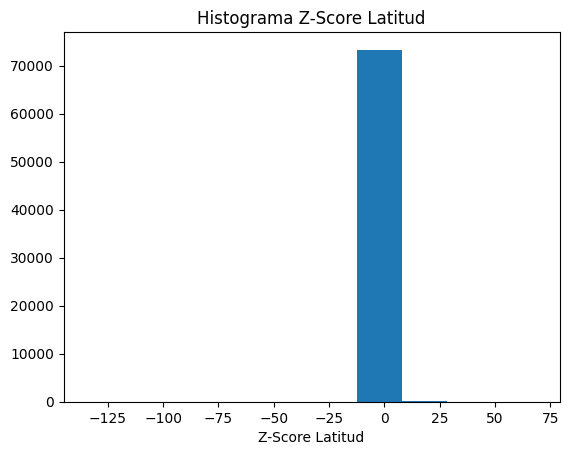

In [133]:
plt.hist(z_latitud_ds.z_latitud)
plt.title('Histograma Z-Score Latitud')
plt.xlabel('Z-Score Latitud')
plt.show()

In [134]:
z_longitud_ds = calculate_zscore_st(ds_train, ds_train.longitud)
z_latitud_ds.head()

id start_date                      end_date  \
354662  SwXZaNyfO0CbXXW59oSp2g== 2021-03-31 2021-05-01 00:00:00.000000000   
436534  tOlObh+4Rly3GF+Lyd2IeA== 2021-08-25 2021-11-07 07:43:19.924328415   
303074  kvnbG7HQLUTqcUoAq4zRTg== 2021-08-26 2021-10-14 00:00:00.000000000   
102759  xLB5HBPzxU8HoVLjDvZfQw== 2021-05-28 2021-06-03 00:00:00.000000000   
415231  uH4bX2cowY0mYdrH8DZaMw== 2021-09-08 2021-09-26 00:00:00.000000000   

          latitud   longitud    place_l3 property_type  property_rooms  \
354662 -34.635768 -58.494408    Floresta            PH             2.0   
436534 -34.569809 -58.447177  Colegiales  Departamento             4.0   
303074 -34.623384 -58.436355   Caballito  Departamento             4.0   
102759 -34.590503 -58.408862     Palermo  Departamento             4.0   
415231 -34.628205 -58.374628    Barracas  Departamento             3.0   

        property_bedrooms  property_surface_total  property_surface_covered  \
354662                1.0                    58.0                      56.0   
436534                3.0                    91.0                      80.0   
303074                3.0                    80.0                      75.0   
102759                3.0                    67.0                      67.0   
415231                2.0                    52.0                      52.0   

        property_price                                     property_title  \
354662        107000.0   VENTA PH FLORESTA DOS AMBIENTES APTO PROFESIONAL   
436534        270000.0  Departamento venta 4 ambientes cochera baulera...   
303074        170000.0                           Departamento - Caballito   
102759        212000.0                             Departamento - Palermo   
415231        115200.0    VENTA DEPARTAMENTO DE 3 AMBIENTES  en SAN TELMO   

        z_latitud  
354662  -0.295862  
436534   0.167289  
303074  -0.208901  
102759   0.021976  
415231  -0.242758

In [135]:
# Train

print(
    f"Los outliers superiores de longitud en train son: {len(z_longitud_ds[z_longitud_ds['z_longitud'] > 3])}. Constituyen al {(len(z_longitud_ds[z_longitud_ds['z_longitud'] > 3]) * 100) // len(ds_train.longitud)}% de los datos")
z_longitud_ds[z_longitud_ds['z_longitud'] > 3]

# Test

print(
    f"Los outliers superiores de longitud en test son: {len(z_longitud_ds[z_longitud_ds['z_longitud'] > 3])}. Constituyen al {(len(z_longitud_ds[z_longitud_ds['z_longitud'] > 3]) * 100) // len(ds_test.longitud)}% de los datos")
z_longitud_ds[z_longitud_ds['z_longitud'] > 3]

Los outliers superiores de longitud en train son: 5. Constituyen al 0% de los datos
Los outliers superiores de longitud en test son: 5. Constituyen al 0% de los datos


id start_date   end_date   latitud   longitud  \
220851  /4CiKZFK0D3wJRClv4OO8Q== 2021-06-30 2021-07-02 -27.58162 -56.682310   
234893  FmDOCgqTy/T9iZXvORmyuw== 2021-06-02 2021-06-18 -27.63119 -55.496357   
173667  NPA86ettFBDIW2fcHGhq9Q== 2021-05-11 2021-05-12 -27.63119 -55.496357   
187631  kQaGoFd//JEG6YJEilDGzg== 2021-06-05 2021-08-26 -29.68992 -57.556660   
241662  MKUbLxaAzotEHRijSe9a0w== 2021-04-01 2021-04-19 -26.61667 -54.133330   

       place_l3 property_type  property_rooms  property_bedrooms  \
220851      NaN          Casa             4.0                2.0   
234893      NaN  Departamento             4.0                3.0   
173667      NaN  Departamento             4.0                3.0   
187631      NaN  Departamento             5.0                4.0   
241662      NaN          Casa             4.0                3.0   

        property_surface_total  property_surface_covered  property_price  \
220851                   105.0                     105.0        190000.0   
234893                    98.0                      88.0        269000.0   
173667                    98.0                      88.0        269000.0   
187631                   158.0                     150.0        380000.0   
241662                   230.0                     200.0        255000.0   

                                           property_title  z_longitud  
220851       Casa jardín 2 dorm escrit. a 1 cdra Estación    7.016234  
234893  Venta departamento 4 amb Vicente Lopez con cochea   11.734832  
173667  Venta departamento 4 amb Vicente Lopez con cochea   11.734832  
187631  5 Ambientes, 4 baños, AMENITIES, Talar de Mart...    3.537424  
241662  Venta casa  barrio  cerrado Santa Rita 4 ambie...   17.157960

In [136]:
# Train

print(
    f"Los outliers inferiores de longitud en train son: {len(z_longitud_ds[z_longitud_ds['z_longitud'] < -3])}. Constituyen al {(len(z_longitud_ds[z_longitud_ds['z_longitud'] < -3]) * 100) // len(ds_train.longitud)}% de los datos")
z_longitud_ds[z_longitud_ds['z_longitud'] < -3]

# Test

print(
    f"Los outliers inferiores de longitud en test son: {len(z_longitud_ds[z_longitud_ds['z_longitud'] < -3])}. Constituyen al {(len(z_longitud_ds[z_longitud_ds['z_longitud'] < -3]) * 100) // len(ds_test.longitud)}% de los datos")
z_longitud_ds[z_longitud_ds['z_longitud'] < -3]

Los outliers inferiores de longitud en train son: 80. Constituyen al 0% de los datos
Los outliers inferiores de longitud en test son: 80. Constituyen al 0% de los datos


id start_date                      end_date  \
226093  /3HzGdxDHF3F6Syq9x0Ptg== 2021-01-09 2021-01-10 00:00:00.000000000   
190823  vUl2yxnOaxBZr/+h5m2TOQ== 2021-11-01 2022-01-27 00:00:00.000000000   
10486   urWyn9L7ma60VBO8Ru6Xew== 2021-01-13 2021-03-28 07:43:19.924328415   
106288  Hrs1e9U6zkvjRh6gD/BBoQ== 2021-03-11 2021-06-05 00:00:00.000000000   
20196   yRtQDzAD+pg44SO/rnuP7g== 2021-03-15 2021-11-04 00:00:00.000000000   
...                          ...        ...                           ...   
57097   0dafkOSbRnRyb1kvIdFlCw== 2021-04-20 2021-04-25 00:00:00.000000000   
107791  u74hqeFj1Cj8baglm/LrYg== 2021-07-16 2021-08-08 00:00:00.000000000   
131184  b2BGl5vIpo+uE+4U3nIDuw== 2021-05-27 2021-06-05 00:00:00.000000000   
58773   wZsceZ/M1uZO47xFYmwytw== 2021-03-13 2021-03-16 00:00:00.000000000   
102563  2RElZjaDk7sMtqYaODP8PA== 2021-05-28 2021-06-05 00:00:00.000000000   

          latitud   longitud place_l3 property_type  property_rooms  \
226093 -33.081030 -68.468140      NaN  Departamento             2.0   
190823 -31.291586 -64.292297      NaN          Casa             3.0   
10486  -41.163826 -71.438923      NaN          Casa             4.0   
106288 -40.131723 -71.299436      NaN  Departamento             2.0   
20196  -31.473705 -64.193142      NaN  Departamento             1.0   
...           ...        ...      ...           ...             ...   
57097  -34.128668 -63.376624      NaN  Departamento             2.0   
107791 -33.762758 -61.966286      NaN          Casa             4.0   
131184 -31.418031 -64.506336      NaN  Departamento             2.0   
58773  -31.670423 -60.764403      NaN          Casa             4.0   
102563 -32.962151 -60.646585      NaN  Departamento             1.0   

        property_bedrooms  property_surface_total  property_surface_covered  \
226093                1.0                    51.0                      51.0   
190823                2.0                   267.0                     104.0   
10486                 3.0                   100.0                     100.0   
106288                1.0                    44.0                      44.0   
20196                 1.0                    38.0                      38.0   
...                   ...                     ...                       ...   
57097                 1.0                    43.0                      40.0   
107791                3.0                   180.0                     160.0   
131184                1.0                    50.0                      50.0   
58773                 3.0                   189.0                     189.0   
102563                1.0                    47.0                      47.0   

        property_price                                     property_title  \
226093         85000.0  Vta. 2 Amb. Pozo "Las Victorias Plaza". Entr. ...   
190823         85000.0                 Duplex 2 Dormitorios Villa Allende   
10486         410000.0  BAJO EL PRECIO!! CASA 4 AMB. EN LA LOMA - CERR...   
106288        105000.0  Hermoso departamento en venta, totalmente equi...   
20196          53000.0  Departamento 1 dormitorio A ESTRENAR - Ituzain...   
...                ...                                                ...   
57097          77500.0  Venta Depto 2amb c/balcon oport/ a estr Saenz ...   
107791        154000.0  VENTA Casa 4 ambientes en Los caracoles Maschwitz   
131184         75000.0         VENTA DE DEPARTAMENTO EN CARLOS PAZ CENTRO   
58773         165000.0     HERMOSA CASA 4 AMB. CON JARDIN EN LUJAN CENTRO   
102563         59000.0            Departamento en venta de un dormitorio    

        z_longitud  
226093  -39.876507  
190823  -23.261918  
10486   -51.696475  
106288  -51.141496  
20196   -22.867405  
...            ...  
57097   -19.618694  
107791  -14.007327  
131184  -24.113521  
58773    -9.225348  
102563   -8.756580  

[80 rows x 14 columns]

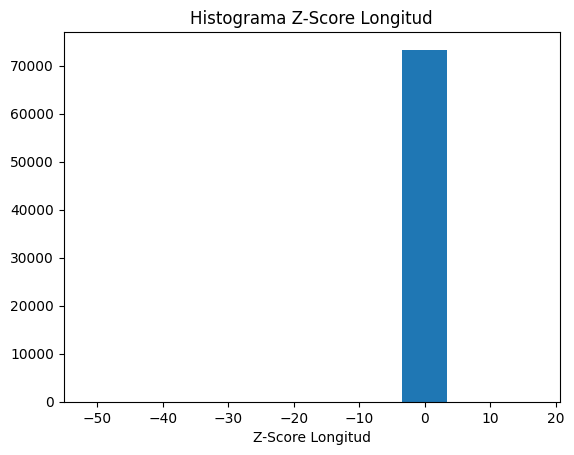

In [137]:
plt.hist(z_longitud_ds.z_longitud)
plt.title('Histograma Z-Score Longitud')
plt.xlabel('Z-Score Longitud')
plt.show()

**Metodo Z Score modificado**

In [138]:
def calculate_modified_zscore_st(dataset, column):
    new_df = dataset.copy()
    mediana = column.median()
    MAD = np.absolute(column - mediana).median()

    new_df[f'zm_{column.name}'] = (column - mediana) * 0.6745 / MAD
    return new_df

**Ambientes**

In [139]:
zm_rooms_ds = calculate_modified_zscore_st(ds_train, ds_train.property_rooms)

In [140]:
# Train

print(
    f"Los outliers superiores de rooms en train son: {len(zm_rooms_ds[zm_rooms_ds['zm_property_rooms'] > 3.5])}. Constituyen al {(len(zm_rooms_ds[zm_rooms_ds['zm_property_rooms'] > 3.5]) * 100) // len(ds_train.property_rooms)}% de los datos")
zm_rooms_ds[zm_rooms_ds['zm_property_rooms'] > 3.5]

# Test

print(
    f"Los outliers superiores de rooms en test son: {len(zm_rooms_ds[zm_rooms_ds['zm_property_rooms'] > 3.5])}. Constituyen al {(len(zm_rooms_ds[zm_rooms_ds['zm_property_rooms'] > 3.5]) * 100) // len(ds_test.property_rooms)}% de los datos")
zm_rooms_ds[zm_rooms_ds['zm_property_rooms'] > 3.5]

Los outliers superiores de rooms en train son: 0. Constituyen al 0% de los datos
Los outliers superiores de rooms en test son: 0. Constituyen al 0% de los datos


Empty DataFrame
Columns: [id, start_date, end_date, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, property_title, zm_property_rooms]
Index: []

In [141]:
# Train

print(
    f"Los outliers inferiores de rooms en train son: {len(zm_rooms_ds[zm_rooms_ds['zm_property_rooms'] < -3.5])}. Constituyen al {(len(zm_rooms_ds[zm_rooms_ds['zm_property_rooms'] < -3.5]) * 100) // len(ds_train.property_rooms)}% de los datos")
zm_rooms_ds[zm_rooms_ds['zm_property_rooms'] < -3.5]

# Test


print(
    f"Los outliers inferiores de rooms en train son: {len(zm_rooms_ds[zm_rooms_ds['zm_property_rooms'] < -3.5])}. Constituyen al {(len(zm_rooms_ds[zm_rooms_ds['zm_property_rooms'] < -3.5]) * 100) // len(ds_test.property_rooms)}% de los datos")
zm_rooms_ds[zm_rooms_ds['zm_property_rooms'] < -3.5]

Los outliers inferiores de rooms en train son: 0. Constituyen al 0% de los datos
Los outliers inferiores de rooms en train son: 0. Constituyen al 0% de los datos


Empty DataFrame
Columns: [id, start_date, end_date, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, property_title, zm_property_rooms]
Index: []

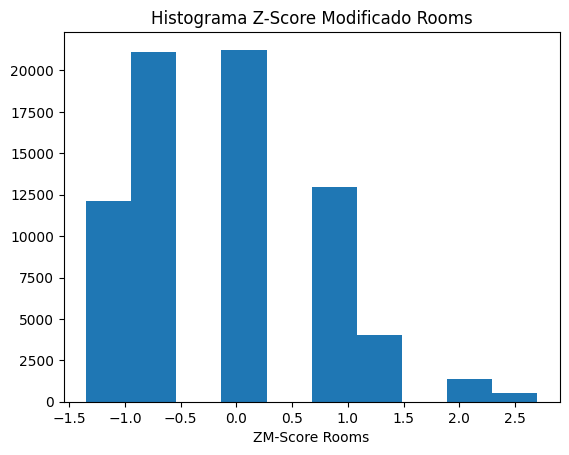

In [142]:
plt.hist(zm_rooms_ds.zm_property_rooms)
plt.title('Histograma Z-Score Modificado Rooms')
plt.xlabel('ZM-Score Rooms')
plt.show()

**Habitaciones**

In [143]:
zm_bedrooms_ds = calculate_modified_zscore_st(ds_train, ds_train.property_bedrooms)

In [144]:
# Train

print(
    f"Los outliers superiores de bedrooms en train son: {len(zm_bedrooms_ds[zm_bedrooms_ds['zm_property_bedrooms'] > 3.5])}. Constituyen al {(len(zm_bedrooms_ds[zm_bedrooms_ds['zm_property_bedrooms'] > 3.5]) * 100) // len(ds_train.property_bedrooms)}% de los datos")
zm_bedrooms_ds[zm_bedrooms_ds['zm_property_bedrooms'] > 3.5]

# Test

print(
    f"Los outliers superiores de bedrooms en test son: {len(zm_bedrooms_ds[zm_bedrooms_ds['zm_property_bedrooms'] > 3.5])}. Constituyen al {(len(zm_bedrooms_ds[zm_bedrooms_ds['zm_property_bedrooms'] > 3.5]) * 100) // len(ds_test.property_bedrooms)}% de los datos")
zm_bedrooms_ds[zm_bedrooms_ds['zm_property_bedrooms'] > 3.5]

Los outliers superiores de bedrooms en train son: 0. Constituyen al 0% de los datos
Los outliers superiores de bedrooms en test son: 0. Constituyen al 0% de los datos


Empty DataFrame
Columns: [id, start_date, end_date, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, property_title, zm_property_bedrooms]
Index: []

In [145]:
# Train

print(
    f"Los outliers inferiores de bedrooms en train son: {len(zm_bedrooms_ds[zm_bedrooms_ds['zm_property_bedrooms'] < -3.5])}. Constituyen al {(len(zm_bedrooms_ds[zm_bedrooms_ds['zm_property_bedrooms'] < -3.5]) * 100) // len(ds_train.property_bedrooms)}% de los datos")
zm_bedrooms_ds[zm_bedrooms_ds['zm_property_bedrooms'] < -3.5]

# Test

print(
    f"Los outliers inferiores de bedrooms en test son: {len(zm_bedrooms_ds[zm_bedrooms_ds['zm_property_bedrooms'] < -3.5])}. Constituyen al {(len(zm_bedrooms_ds[zm_bedrooms_ds['zm_property_bedrooms'] < -3.5]) * 100) // len(ds_test.property_bedrooms)}% de los datos")
zm_bedrooms_ds[zm_bedrooms_ds['zm_property_bedrooms'] < -3.5]

Los outliers inferiores de bedrooms en train son: 0. Constituyen al 0% de los datos
Los outliers inferiores de bedrooms en test son: 0. Constituyen al 0% de los datos


Empty DataFrame
Columns: [id, start_date, end_date, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, property_title, zm_property_bedrooms]
Index: []

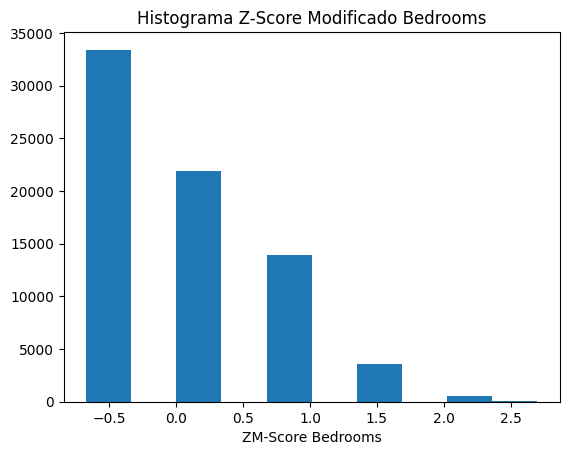

In [146]:
plt.hist(zm_bedrooms_ds.zm_property_bedrooms)
plt.title('Histograma Z-Score Modificado Bedrooms')
plt.xlabel('ZM-Score Bedrooms')
plt.show()

**Superficie Total**

In [147]:
zm_total_ds = calculate_modified_zscore_st(ds_train, ds_train.property_surface_total)
zm_total_ds.head()

id start_date                      end_date  \
354662  SwXZaNyfO0CbXXW59oSp2g== 2021-03-31 2021-05-01 00:00:00.000000000   
436534  tOlObh+4Rly3GF+Lyd2IeA== 2021-08-25 2021-11-07 07:43:19.924328415   
303074  kvnbG7HQLUTqcUoAq4zRTg== 2021-08-26 2021-10-14 00:00:00.000000000   
102759  xLB5HBPzxU8HoVLjDvZfQw== 2021-05-28 2021-06-03 00:00:00.000000000   
415231  uH4bX2cowY0mYdrH8DZaMw== 2021-09-08 2021-09-26 00:00:00.000000000   

          latitud   longitud    place_l3 property_type  property_rooms  \
354662 -34.635768 -58.494408    Floresta            PH             2.0   
436534 -34.569809 -58.447177  Colegiales  Departamento             4.0   
303074 -34.623384 -58.436355   Caballito  Departamento             4.0   
102759 -34.590503 -58.408862     Palermo  Departamento             4.0   
415231 -34.628205 -58.374628    Barracas  Departamento             3.0   

        property_bedrooms  property_surface_total  property_surface_covered  \
354662                1.0                    58.0                      56.0   
436534                3.0                    91.0                      80.0   
303074                3.0                    80.0                      75.0   
102759                3.0                    67.0                      67.0   
415231                2.0                    52.0                      52.0   

        property_price                                     property_title  \
354662        107000.0   VENTA PH FLORESTA DOS AMBIENTES APTO PROFESIONAL   
436534        270000.0  Departamento venta 4 ambientes cochera baulera...   
303074        170000.0                           Departamento - Caballito   
102759        212000.0                             Departamento - Palermo   
415231        115200.0    VENTA DEPARTAMENTO DE 3 AMBIENTES  en SAN TELMO   

        zm_property_surface_total  
354662                  -0.168625  
436534                   0.758813  
303074                   0.449667  
102759                   0.084312  
415231                  -0.337250

In [148]:
# Train

print(
    f"Los outliers superiores de sup total en train son: {len(zm_total_ds[zm_total_ds['zm_property_surface_total'] > 3.5])}. Constituyen al {(len(zm_total_ds[zm_total_ds['zm_property_surface_total'] > 3.5]) * 100) // len(ds_train.property_surface_total)}% de los datos")
zm_total_ds[zm_total_ds['zm_property_surface_total'] > 3.5]

# Test

print(
    f"Los outliers superiores de sup total en test son: {len(zm_total_ds[zm_total_ds['zm_property_surface_total'] > 3.5])}. Constituyen al {(len(zm_total_ds[zm_total_ds['zm_property_surface_total'] > 3.5]) * 100) // len(ds_test.property_surface_total)}% de los datos")
zm_total_ds[zm_total_ds['zm_property_surface_total'] > 3.5]

Los outliers superiores de sup total en train son: 5449. Constituyen al 7% de los datos
Los outliers superiores de sup total en test son: 5449. Constituyen al 30% de los datos


id start_date   end_date    latitud   longitud  \
375309  CSI/oNZqoTTLT8Ui5bYc+A== 2021-10-13 2021-12-11 -34.591681 -58.379194   
270761  frAAmkbU7WYdXYFWd4WrKw== 2021-07-13 2021-07-14 -34.644691 -58.520849   
256745  ZIH793F0i3Uk2RZiVKnXNQ== 2021-11-03 2022-02-02 -34.562865 -58.439179   
274519  VPOuMnTJ+492fyfGy/1+yg== 2021-09-15 2021-09-20 -34.574418 -58.419747   
68614   AB9MmwMYiicwBuFEBUWeYA== 2021-03-27 2021-03-30 -34.620321 -58.523784   
...                          ...        ...        ...        ...        ...   
144942  Rws2ycqz2DxJWraovsld/g== 2021-07-29 2021-12-12 -34.588462 -58.384803   
451181  M+pL/kZFZchuhJjNrNmM8w== 2021-12-16 2022-02-09 -34.608408 -58.510856   
233224  DCHJXhetw6y4DPUZgtEEbw== 2021-03-20 2021-06-18 -34.554328 -58.437926   
340654  DC9wTRMuSRqVzOXs3utX4w== 2021-09-28 2021-10-20 -34.550311 -58.451915   
215843  UcfWmxaUJukmCYgaGzCD9A== 2021-12-22 2022-01-27 -34.609607 -58.419964   

          place_l3 property_type  property_rooms  property_bedrooms  \
375309      Retiro  Departamento             7.0                4.0   
270761     Liniers          Casa             4.0                3.0   
256745    Belgrano  Departamento             5.0                4.0   
274519     Palermo  Departamento             4.0                3.0   
68614   Villa Real            PH             6.0                4.0   
...            ...           ...             ...                ...   
144942    Recoleta  Departamento             5.0                4.0   
451181    Barracas            PH             5.0                3.0   
233224    Belgrano  Departamento             4.0                2.0   
340654       Nuñez          Casa             5.0                3.0   
215843     Almagro            PH             4.0                3.0   

        property_surface_total  property_surface_covered  property_price  \
375309                   340.0                     321.0        750000.0   
270761                   220.0                     125.0        330000.0   
256745                   208.0                     190.0        610000.0   
274519                   320.0                     240.0        785000.0   
68614                    226.0                     141.0        320000.0   
...                        ...                       ...             ...   
144942                   202.0                     190.0        570000.0   
451181                   368.0                     288.0        369900.0   
233224                   240.0                     170.0       1100000.0   
340654                   330.0                     230.0        525000.0   
215843                   241.0                     206.0        234900.0   

                                           property_title  \
375309                              Departamento - Retiro   
270761     CASA 4 AMBIENTES CON COCHERA JARDIN Y TERRAZA    
256745                        1 - Del Libertador Av. 5100   
274519                       Departamento - Palermo Nuevo   
68614        Venta Casa con quincho y jardín - Villa Real   
...                                                   ...   
144942  Oportunidad - Montevideo y Posadas - Excelente...   
451181                   VENTA PH 5 AMBIENTES EN BARRACAS   
233224    Departamento 4 ambientes piso venta 2 cocheras    
340654  BARRIO RIVER  • DR. VICTORINO DE LA PLAZA 1500...   
215843  PH 4 Ambientes mas dep, Terraza, Quincho y Pla...   

        zm_property_surface_total  
375309                   7.756750  
270761                   4.384250  
256745                   4.047000  
274519                   7.194667  
68614                    4.552875  
...                           ...  
144942                   3.878375  
451181                   8.543667  
233224                   4.946333  
340654                   7.475708  
215843                   4.974437  

[5449 rows x 14 columns]

In [149]:
# Train

print(
    f"Los outliers inferiores de sup total en train son: {len(zm_total_ds[zm_total_ds['zm_property_surface_total'] < -3.5])}. Constituyen al {(len(zm_total_ds[zm_total_ds['zm_property_surface_total'] < -3.5]) * 100) // len(ds_train.property_surface_total)}% de los datos")
zm_total_ds[zm_total_ds['zm_property_surface_total'] < -3.5]

# Test

print(
    f"Los outliers inferiores de sup total en test son: {len(zm_total_ds[zm_total_ds['zm_property_surface_total'] < -3.5])}. Constituyen al {(len(zm_total_ds[zm_total_ds['zm_property_surface_total'] < -3.5]) * 100) // len(ds_test.property_surface_total)}% de los datos")
zm_total_ds[zm_total_ds['zm_property_surface_total'] < -3.5]

Los outliers inferiores de sup total en train son: 0. Constituyen al 0% de los datos
Los outliers inferiores de sup total en test son: 0. Constituyen al 0% de los datos


Empty DataFrame
Columns: [id, start_date, end_date, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, property_title, zm_property_surface_total]
Index: []

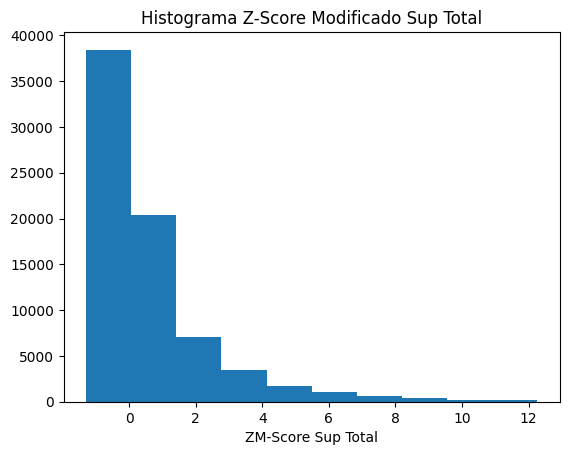

In [150]:
plt.hist(zm_total_ds.zm_property_surface_total)
plt.title('Histograma Z-Score Modificado Sup Total')
plt.xlabel('ZM-Score Sup Total')
plt.show()

**Superficie Cubierta**

In [151]:
zm_covered_ds = calculate_modified_zscore_st(ds_train, ds_train.property_surface_covered)

In [152]:
# Train

print(
    f"Los outliers superiores de sup cubierta en train son: {(len(zm_covered_ds[zm_covered_ds['zm_property_surface_covered'] > 3.5]) * 100) // len(ds_train.property_surface_covered)}% de los datos")
zm_covered_ds[zm_covered_ds['zm_property_surface_covered'] > 3.5]

# Test

print(
    f"Los outliers superiores de sup cubierta en test son: {(len(zm_covered_ds[zm_covered_ds['zm_property_surface_covered'] > 3.5]) * 100) // len(ds_test.property_surface_covered)}% de los datos")
zm_covered_ds[zm_covered_ds['zm_property_surface_covered'] > 3.5]

Los outliers superiores de sup cubierta en train son: 7% de los datos
Los outliers superiores de sup cubierta en test son: 29% de los datos


id start_date                      end_date  \
375309  CSI/oNZqoTTLT8Ui5bYc+A== 2021-10-13 2021-12-11 00:00:00.000000000   
256745  ZIH793F0i3Uk2RZiVKnXNQ== 2021-11-03 2022-02-02 00:00:00.000000000   
274519  VPOuMnTJ+492fyfGy/1+yg== 2021-09-15 2021-09-20 00:00:00.000000000   
48919   1v5ZVH0Lp1Byy2eVYlSeOw== 2021-10-16 2022-01-27 00:00:00.000000000   
222098  gvPij8doi/esQG3j5H+W4g== 2021-10-11 2021-12-24 07:43:19.924328415   
...                          ...        ...                           ...   
144942  Rws2ycqz2DxJWraovsld/g== 2021-07-29 2021-12-12 00:00:00.000000000   
451181  M+pL/kZFZchuhJjNrNmM8w== 2021-12-16 2022-02-09 00:00:00.000000000   
233224  DCHJXhetw6y4DPUZgtEEbw== 2021-03-20 2021-06-18 00:00:00.000000000   
340654  DC9wTRMuSRqVzOXs3utX4w== 2021-09-28 2021-10-20 00:00:00.000000000   
215843  UcfWmxaUJukmCYgaGzCD9A== 2021-12-22 2022-01-27 00:00:00.000000000   

          latitud   longitud  place_l3 property_type  property_rooms  \
375309 -34.591681 -58.379194    Retiro  Departamento             7.0   
256745 -34.562865 -58.439179  Belgrano  Departamento             5.0   
274519 -34.574418 -58.419747   Palermo  Departamento             4.0   
48919  -34.614446 -58.421561   Almagro          Casa             4.0   
222098 -34.566126 -58.440944  Belgrano  Departamento             6.0   
...           ...        ...       ...           ...             ...   
144942 -34.588462 -58.384803  Recoleta  Departamento             5.0   
451181 -34.608408 -58.510856  Barracas            PH             5.0   
233224 -34.554328 -58.437926  Belgrano  Departamento             4.0   
340654 -34.550311 -58.451915     Nuñez          Casa             5.0   
215843 -34.609607 -58.419964   Almagro            PH             4.0   

        property_bedrooms  property_surface_total  property_surface_covered  \
375309                4.0                   340.0                     321.0   
256745                4.0                   208.0                     190.0   
274519                3.0                   320.0                     240.0   
48919                 3.0                   220.0                     220.0   
222098                3.0                   215.0                     195.0   
...                   ...                     ...                       ...   
144942                4.0                   202.0                     190.0   
451181                3.0                   368.0                     288.0   
233224                2.0                   240.0                     170.0   
340654                3.0                   330.0                     230.0   
215843                3.0                   241.0                     206.0   

        property_price                                     property_title  \
375309        750000.0                              Departamento - Retiro   
256745        610000.0                        1 - Del Libertador Av. 5100   
274519        785000.0                       Departamento - Palermo Nuevo   
48919         650000.0   Casa • 220m² • 4 Ambientes • 1 Cochera - Almagro   
222098        570000.0                            Departamento - Belgrano   
...                ...                                                ...   
144942        570000.0  Oportunidad - Montevideo y Posadas - Excelente...   
451181        369900.0                   VENTA PH 5 AMBIENTES EN BARRACAS   
233224       1100000.0    Departamento 4 ambientes piso venta 2 cocheras    
340654        525000.0  BARRIO RIVER  • DR. VICTORINO DE LA PLAZA 1500...   
215843        234900.0  PH 4 Ambientes mas dep, Terraza, Quincho y Pla...   

        zm_property_surface_covered  
375309                     8.903400  
256745                     4.485425  
274519                     6.171675  
48919                      5.497175  
222098                     4.654050  
...                             ...  
144942                     4.485425  
451181                     7.790475  
233224                  

In [153]:
# Train

print(
    f"Los outliers inferiores de sup cubierta en train son: {len(zm_covered_ds[zm_covered_ds['zm_property_surface_covered'] < -3.5])}. Constituyen al {(len(zm_covered_ds[zm_covered_ds['zm_property_surface_covered'] < -3.5]) * 100) // len(ds_train.property_surface_covered)}% de los datos")
zm_covered_ds[zm_covered_ds['zm_property_surface_covered'] < -3.5]

# Test

print(
    f"Los outliers inferiores de sup cubierta en test son: {len(zm_covered_ds[zm_covered_ds['zm_property_surface_covered'] < -3.5])}. Constituyen al {(len(zm_covered_ds[zm_covered_ds['zm_property_surface_covered'] < -3.5]) * 100) // len(ds_test.property_surface_covered)}% de los datos")
zm_covered_ds[zm_covered_ds['zm_property_surface_covered'] < -3.5]

Los outliers inferiores de sup cubierta en train son: 0. Constituyen al 0% de los datos
Los outliers inferiores de sup cubierta en test son: 0. Constituyen al 0% de los datos


Empty DataFrame
Columns: [id, start_date, end_date, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, property_title, zm_property_surface_covered]
Index: []

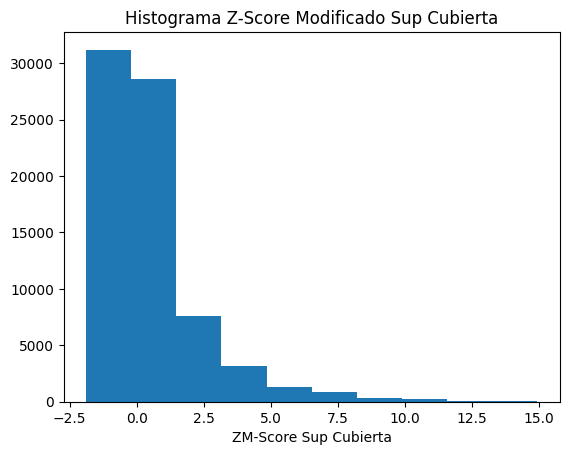

In [154]:
plt.hist(zm_covered_ds.zm_property_surface_covered)
plt.title('Histograma Z-Score Modificado Sup Cubierta')
plt.xlabel('ZM-Score Sup Cubierta')
plt.show()

**Latitud y longitud**

In [155]:
zm_latitud_ds = calculate_modified_zscore_st(ds_train, ds_train.latitud)

In [156]:
# Train

print(
    f"Los outliers superiores de latitud son: {(len(zm_latitud_ds[zm_latitud_ds['zm_latitud'] > 3.5]) * 100) // len(ds_train.latitud)}% de los datos")
zm_latitud_ds[zm_latitud_ds['zm_latitud'] > 3.5]

# Test

print(
    f"Los outliers superiores de latitud son: {(len(zm_latitud_ds[zm_latitud_ds['zm_latitud'] > 3.5]) * 100) // len(ds_test.latitud)}% de los datos")
zm_latitud_ds[zm_latitud_ds['zm_latitud'] > 3.5]

Los outliers superiores de latitud son: 0% de los datos
Los outliers superiores de latitud son: 0% de los datos


id start_date   end_date    latitud   longitud  \
226093  /3HzGdxDHF3F6Syq9x0Ptg== 2021-01-09 2021-01-10 -33.081030 -68.468140   
220851  /4CiKZFK0D3wJRClv4OO8Q== 2021-06-30 2021-07-02 -27.581620 -56.682310   
190823  vUl2yxnOaxBZr/+h5m2TOQ== 2021-11-01 2022-01-27 -31.291586 -64.292297   
234893  FmDOCgqTy/T9iZXvORmyuw== 2021-06-02 2021-06-18 -27.631190 -55.496357   
20196   yRtQDzAD+pg44SO/rnuP7g== 2021-03-15 2021-11-04 -31.473705 -64.193142   
...                          ...        ...        ...        ...        ...   
57097   0dafkOSbRnRyb1kvIdFlCw== 2021-04-20 2021-04-25 -34.128668 -63.376624   
107791  u74hqeFj1Cj8baglm/LrYg== 2021-07-16 2021-08-08 -33.762758 -61.966286   
131184  b2BGl5vIpo+uE+4U3nIDuw== 2021-05-27 2021-06-05 -31.418031 -64.506336   
58773   wZsceZ/M1uZO47xFYmwytw== 2021-03-13 2021-03-16 -31.670423 -60.764403   
102563  2RElZjaDk7sMtqYaODP8PA== 2021-05-28 2021-06-05 -32.962151 -60.646585   

       place_l3 property_type  property_rooms  property_bedrooms  \
226093      NaN  Departamento             2.0                1.0   
220851      NaN          Casa             4.0                2.0   
190823      NaN          Casa             3.0                2.0   
234893      NaN  Departamento             4.0                3.0   
20196       NaN  Departamento             1.0                1.0   
...         ...           ...             ...                ...   
57097       NaN  Departamento             2.0                1.0   
107791      NaN          Casa             4.0                3.0   
131184      NaN  Departamento             2.0                1.0   
58773       NaN          Casa             4.0                3.0   
102563      NaN  Departamento             1.0                1.0   

        property_surface_total  property_surface_covered  property_price  \
226093                    51.0                      51.0         85000.0   
220851                   105.0                     105.0        190000.0   
190823                   267.0                     104.0         85000.0   
234893                    98.0                      88.0        269000.0   
20196                     38.0                      38.0         53000.0   
...                        ...                       ...             ...   
57097                     43.0                      40.0         77500.0   
107791                   180.0                     160.0        154000.0   
131184                    50.0                      50.0         75000.0   
58773                    189.0                     189.0        165000.0   
102563                    47.0                      47.0         59000.0   

                                           property_title  zm_latitud  
226093  Vta. 2 Amb. Pozo "Las Victorias Plaza". Entr. ...   53.639203  
220851       Casa jardín 2 dorm escrit. a 1 cdra Estación  248.435605  
190823                 Duplex 2 Dormitorios Villa Allende  117.023671  
234893  Venta departamento 4 amb Vicente Lopez con cochea  246.679770  
20196   Departamento 1 dormitorio A ESTRENAR - Ituzain...  110.572778  
...                                                   ...         ...  
57097   Venta Depto 2amb c/balcon oport/ a estr Saenz ...   16.530475  
107791  VENTA Casa 4 ambientes en Los caracoles Maschwitz   29.491493  
131184         VENTA DE DEPARTAMENTO EN CARLOS PAZ CENTRO  112.544849  
58773      HERMOSA CASA 4 AMB. CON JARDIN EN LUJAN CENTRO  103.604776  
102563            Departamento en venta de un dormitorio    57.850069  

[80 rows x 14 columns]

In [157]:
# Train

print(
    f"Los outliers inferiores de sup cubierta en train son: {len(zm_latitud_ds[zm_latitud_ds['zm_latitud'] < -3.5])}. Constituyen al {(len(zm_latitud_ds[zm_latitud_ds['zm_latitud'] < -3.5]) * 100) // len(ds_train.latitud)}% de los datos")
zm_latitud_ds[zm_latitud_ds['zm_latitud'] < -3.5]

# Test

print(
    f"Los outliers inferiores de sup cubierta en test son: {len(zm_latitud_ds[zm_latitud_ds['zm_latitud'] < -3.5])}. Constituyen al {(len(zm_latitud_ds[zm_latitud_ds['zm_latitud'] < -3.5]) * 100) // len(ds_test.latitud)}% de los datos")
zm_latitud_ds[zm_latitud_ds['zm_latitud'] < -3.5]

Los outliers inferiores de sup cubierta en train son: 16. Constituyen al 0% de los datos
Los outliers inferiores de sup cubierta en test son: 16. Constituyen al 0% de los datos


id start_date                      end_date  \
10486   urWyn9L7ma60VBO8Ru6Xew== 2021-01-13 2021-03-28 07:43:19.924328415   
106288  Hrs1e9U6zkvjRh6gD/BBoQ== 2021-03-11 2021-06-05 00:00:00.000000000   
250707  n/VGq/lp+AH1XRd4RSHphg== 2021-04-29 2021-05-15 00:00:00.000000000   
457631  ZskNGaMaM9MxJ4seQfgjtg== 2021-05-08 2021-08-08 00:00:00.000000000   
410404  KeQ40Z6VTXMHoq4j8oOp+A== 2021-03-02 2021-06-05 00:00:00.000000000   
270589  tQfZpYXLoOwWd990nrLpBg== 2021-07-13 2021-10-16 00:00:00.000000000   
324200  SSbx+/6MNgxE6rIDYPA0+A== 2021-03-03 2021-06-05 00:00:00.000000000   
65844   0tGMaOsXgkOAnx8GSH1pmA== 2021-05-15 2021-05-25 00:00:00.000000000   
351916  BKk+pz+G7Tajvr6LE+9UZw== 2021-06-25 2021-07-17 00:00:00.000000000   
171545  2IMMhWMUVZd6htI0Xo9m8Q== 2021-04-19 2021-06-05 00:00:00.000000000   
411779  jt4VEm3y2Ktb573eFDHQUw== 2021-03-02 2021-03-12 00:00:00.000000000   
106297  oqSIUrrkBRMakJoEW/hYPg== 2021-03-11 2021-06-05 00:00:00.000000000   
317537  x1BlLb49Up0aSX9yuzhrMw== 2021-09-29 2022-03-25 00:00:00.000000000   
208085  2Xn6RKpg2Fps+wLCsSJavw== 2021-02-01 2021-04-16 07:43:19.924328415   
208451  r5h8YGMTL3OG6u8wekYDWg== 2021-02-01 2021-05-02 00:00:00.000000000   
308365  j4l0DxeSfN6KnNMYSo6bSg== 2021-04-28 2021-05-01 00:00:00.000000000   

          latitud   longitud         place_l3 property_type  property_rooms  \
10486  -41.163826 -71.438923              NaN          Casa             4.0   
106288 -40.131723 -71.299436              NaN  Departamento             2.0   
250707 -34.698989 -58.469994  Villa Riachuelo  Departamento             4.0   
457631 -53.788624 -67.718089              NaN  Departamento             3.0   
410404 -38.964493 -68.075830              NaN          Casa             7.0   
270589 -34.694451 -58.467532     Villa Lugano          Casa             3.0   
324200 -38.940227 -68.073865              NaN  Departamento             3.0   
65844  -34.698989 -58.469994  Villa Riachuelo  Departamento             4.0   
351916 -34.694900 -58.469161     Villa Lugano          Casa             2.0   
171545 -34.694322 -58.469549     Villa Lugano            PH             3.0   
411779 -34.698989 -58.469994  Villa Riachuelo  Departamento             4.0   
106297 -41.086352 -71.185720              NaN  Departamento             2.0   
317537 -34.698989 -58.469994  Villa Riachuelo  Departamento             4.0   
208085 -41.085373 -71.185766              NaN  Departamento             2.0   
208451 -34.694366 -58.468208     Villa Lugano  Departamento             2.0   
308365 -34.694900 -58.469161     Villa Lugano          Casa             2.0   

        property_bedrooms  property_surface_total  property_surface_covered  \
10486                 3.0                   100.0                     100.0   
106288                1.0                    44.0                      44.0   
250707                3.0                    91.0                      79.0   
457631                2.0                   121.0                     100.0   
410404                5.0                   218.0                     218.0   
270589                2.0                    70.0                      50.0   
324200                2.0                    55.0                      55.0   
65844                 3.0                    91.0                      79.0   
351916                1.0                    72.0                      72.0   
171545                2.0                    70.0                      70.0   
411779                3.0                    91.0                      79.0   
106297                1.0                    53.0                      53.0   
317537                3.0                    91.0                      79.0   
208085                1.0                    60.0                      50.0   
208451                1.0                    74.0                      42.0   
308365                1.0                    80.0                      80.0   

        property_price          

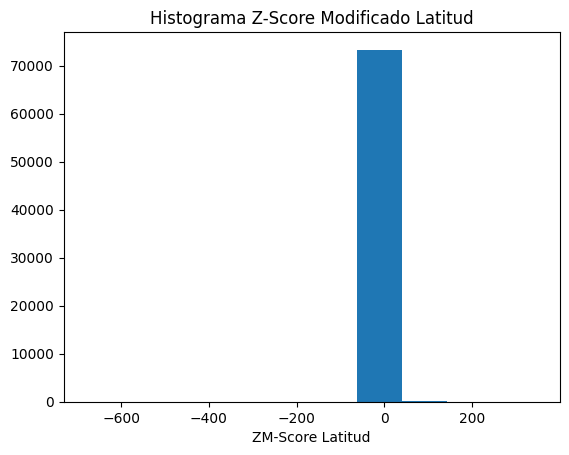

In [158]:
plt.hist(zm_latitud_ds.zm_latitud)
plt.title('Histograma Z-Score Modificado Latitud')
plt.xlabel('ZM-Score Latitud')
plt.show()

In [159]:
zm_longitud_ds = calculate_modified_zscore_st(ds_train, ds_train.longitud)

In [160]:
# Train

print(
    f"Los outliers superiores de longitud en train son: {(len(zm_longitud_ds[zm_longitud_ds['zm_longitud'] > 3.5]) * 100) // len(ds_train.longitud)}% de los datos")
zm_longitud_ds[zm_longitud_ds['zm_longitud'] > 3.5]

# Test

print(
    f"Los outliers superiores de longitud en test son: {(len(zm_longitud_ds[zm_longitud_ds['zm_longitud'] > 3.5]) * 100) // len(ds_test.longitud)}% de los datos")
zm_longitud_ds[zm_longitud_ds['zm_longitud'] > 3.5]

Los outliers superiores de longitud en train son: 0% de los datos
Los outliers superiores de longitud en test son: 0% de los datos


id start_date   end_date   latitud   longitud  \
220851  /4CiKZFK0D3wJRClv4OO8Q== 2021-06-30 2021-07-02 -27.58162 -56.682310   
234893  FmDOCgqTy/T9iZXvORmyuw== 2021-06-02 2021-06-18 -27.63119 -55.496357   
173667  NPA86ettFBDIW2fcHGhq9Q== 2021-05-11 2021-05-12 -27.63119 -55.496357   
187631  kQaGoFd//JEG6YJEilDGzg== 2021-06-05 2021-08-26 -29.68992 -57.556660   
241662  MKUbLxaAzotEHRijSe9a0w== 2021-04-01 2021-04-19 -26.61667 -54.133330   

       place_l3 property_type  property_rooms  property_bedrooms  \
220851      NaN          Casa             4.0                2.0   
234893      NaN  Departamento             4.0                3.0   
173667      NaN  Departamento             4.0                3.0   
187631      NaN  Departamento             5.0                4.0   
241662      NaN          Casa             4.0                3.0   

        property_surface_total  property_surface_covered  property_price  \
220851                   105.0                     105.0        190000.0   
234893                    98.0                      88.0        269000.0   
173667                    98.0                      88.0        269000.0   
187631                   158.0                     150.0        380000.0   
241662                   230.0                     200.0        255000.0   

                                           property_title  zm_longitud  
220851       Casa jardín 2 dorm escrit. a 1 cdra Estación    42.227443  
234893  Venta departamento 4 amb Vicente Lopez con cochea    70.738672  
173667  Venta departamento 4 amb Vicente Lopez con cochea    70.738672  
187631  5 Ambientes, 4 baños, AMENITIES, Talar de Mart...    21.207392  
241662  Venta casa  barrio  cerrado Santa Rita 4 ambie...   103.506897

In [161]:
# Train

print(
    f"Los outliers inferiores de longitud en train son: {len(zm_longitud_ds[zm_longitud_ds['zm_longitud'] < -3.5])}. Constituyen al {(len(zm_longitud_ds[zm_longitud_ds['zm_longitud'] < -3.5]) * 100) // len(ds_train.longitud)}% de los datos")
zm_longitud_ds[zm_longitud_ds['zm_longitud'] < -3.5]

# Test

print(
    f"Los outliers inferiores de longitud en test son: {len(zm_longitud_ds[zm_longitud_ds['zm_longitud'] < -3.5])}. Constituyen al {(len(zm_longitud_ds[zm_longitud_ds['zm_longitud'] < -3.5]) * 100) // len(ds_test.longitud)}% de los datos")
zm_longitud_ds[zm_longitud_ds['zm_longitud'] < -3.5]

Los outliers inferiores de longitud en train son: 82. Constituyen al 0% de los datos
Los outliers inferiores de longitud en test son: 82. Constituyen al 0% de los datos


id start_date                      end_date  \
226093  /3HzGdxDHF3F6Syq9x0Ptg== 2021-01-09 2021-01-10 00:00:00.000000000   
190823  vUl2yxnOaxBZr/+h5m2TOQ== 2021-11-01 2022-01-27 00:00:00.000000000   
10486   urWyn9L7ma60VBO8Ru6Xew== 2021-01-13 2021-03-28 07:43:19.924328415   
106288  Hrs1e9U6zkvjRh6gD/BBoQ== 2021-03-11 2021-06-05 00:00:00.000000000   
20196   yRtQDzAD+pg44SO/rnuP7g== 2021-03-15 2021-11-04 00:00:00.000000000   
...                          ...        ...                           ...   
57097   0dafkOSbRnRyb1kvIdFlCw== 2021-04-20 2021-04-25 00:00:00.000000000   
107791  u74hqeFj1Cj8baglm/LrYg== 2021-07-16 2021-08-08 00:00:00.000000000   
131184  b2BGl5vIpo+uE+4U3nIDuw== 2021-05-27 2021-06-05 00:00:00.000000000   
58773   wZsceZ/M1uZO47xFYmwytw== 2021-03-13 2021-03-16 00:00:00.000000000   
102563  2RElZjaDk7sMtqYaODP8PA== 2021-05-28 2021-06-05 00:00:00.000000000   

          latitud   longitud place_l3 property_type  property_rooms  \
226093 -33.081030 -68.468140      NaN  Departamento             2.0   
190823 -31.291586 -64.292297      NaN          Casa             3.0   
10486  -41.163826 -71.438923      NaN          Casa             4.0   
106288 -40.131723 -71.299436      NaN  Departamento             2.0   
20196  -31.473705 -64.193142      NaN  Departamento             1.0   
...           ...        ...      ...           ...             ...   
57097  -34.128668 -63.376624      NaN  Departamento             2.0   
107791 -33.762758 -61.966286      NaN          Casa             4.0   
131184 -31.418031 -64.506336      NaN  Departamento             2.0   
58773  -31.670423 -60.764403      NaN          Casa             4.0   
102563 -32.962151 -60.646585      NaN  Departamento             1.0   

        property_bedrooms  property_surface_total  property_surface_covered  \
226093                1.0                    51.0                      51.0   
190823                2.0                   267.0                     104.0   
10486                 3.0                   100.0                     100.0   
106288                1.0                    44.0                      44.0   
20196                 1.0                    38.0                      38.0   
...                   ...                     ...                       ...   
57097                 1.0                    43.0                      40.0   
107791                3.0                   180.0                     160.0   
131184                1.0                    50.0                      50.0   
58773                 3.0                   189.0                     189.0   
102563                1.0                    47.0                      47.0   

        property_price                                     property_title  \
226093         85000.0  Vta. 2 Amb. Pozo "Las Victorias Plaza". Entr. ...   
190823         85000.0                 Duplex 2 Dormitorios Villa Allende   
10486         410000.0  BAJO EL PRECIO!! CASA 4 AMB. EN LA LOMA - CERR...   
106288        105000.0  Hermoso departamento en venta, totalmente equi...   
20196          53000.0  Departamento 1 dormitorio A ESTRENAR - Ituzain...   
...                ...                                                ...   
57097          77500.0  Venta Depto 2amb c/balcon oport/ a estr Saenz ...   
107791        154000.0  VENTA Casa 4 ambientes en Los caracoles Maschwitz   
131184         75000.0         VENTA DE DEPARTAMENTO EN CARLOS PAZ CENTRO   
58773         165000.0     HERMOSA CASA 4 AMB. CON JARDIN EN LUJAN CENTRO   
102563         59000.0            Departamento en venta de un dormitorio    

        zm_longitud  
226093  -241.113042  
190823  -140.722543  
10486   -312.532958  
106288  -309.179604  
20196   -138.338776  
...             ...  
57097   -118.709053  
107791   -84.803434  
131184  -145.868197  
58773    -55.909236  
102563   -53.076795  

[82 rows x 14 columns]

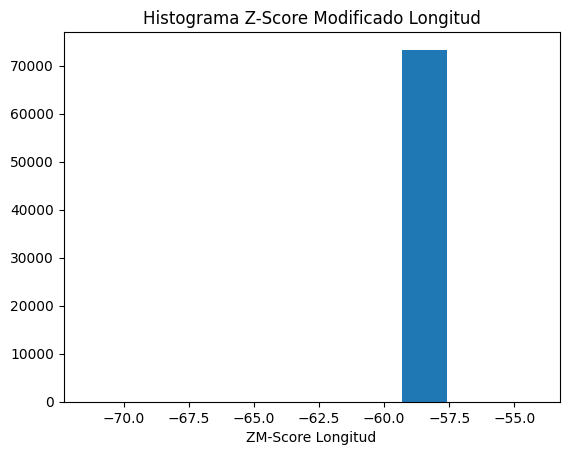

In [162]:
plt.hist(zm_longitud_ds.longitud)
plt.title('Histograma Z-Score Modificado Longitud')
plt.xlabel('ZM-Score Longitud')
plt.show()

#### Multivariados

**Clustering - Mahalanobis**

In [163]:
def calculate_mahalanobis_distance(dataset, col1, col2):
    X = dataset[[f'{col1}', f'{col2}']].copy()
    sample_X = X.sample(frac=0.1)

    mu = sample_X.mean()
    X_diff = X - mu
    X_diff = X_diff.values.T

    cov = np.cov(sample_X.values.T)
    inv_cov = np.linalg.inv(cov)
    W = sc.linalg.sqrtm(inv_cov)

    Wx = np.matmul(W, X_diff)
    X['mahalanobis'] = [np.dot(Wx[:, i], Wx[:, i]) for i in range(Wx.shape[1])]

    return X

In [164]:
def create_scatter_plot(dataset, col1, col2):
    #Scatter Plot
    plt.scatter(dataset[col1], dataset[col2])
    plt.title(f'Dispersograma {col1} vs {col2}')
    plt.xlabel(f'{col1}')
    plt.ylabel(f'{col2}')
    plt.show()

In [165]:
def create_scattergram(dataset, col1, col2, outlier_limit):
    #Grafico scatter
    es_outlier = (dataset['mahalanobis'] > outlier_limit)

    sns.scatterplot(x=dataset[col1], y=dataset[col2], hue=es_outlier)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, title="Outlier")
    plt.title(f'Dispersograma {col1} vs {col2}')
    plt.show()

**Analisis entre ambientes y habitaciones de valores atipicos**

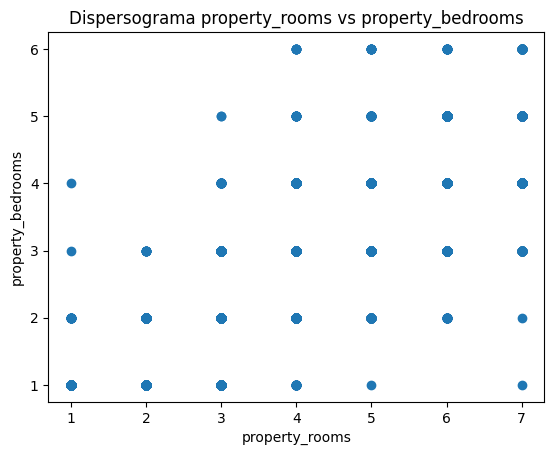

In [166]:
create_scatter_plot(ds_train, 'property_rooms', 'property_bedrooms')

In [167]:
mahalanobis_rooms_bedrooms_train = calculate_mahalanobis_distance(ds_train, 'property_rooms', 'property_bedrooms')
mahalanobis_rooms_bedrooms_test = calculate_mahalanobis_distance(ds_test, 'property_rooms', 'property_bedrooms')

mahalanobis_rooms_bedrooms_train.head()

property_rooms  property_bedrooms  mahalanobis
354662             2.0                1.0     1.201210
436534             4.0                3.0     1.503468
303074             4.0                3.0     1.503468
102759             4.0                3.0     1.503468
415231             3.0                2.0     0.043483

<AxesSubplot: ylabel='mahalanobis'>

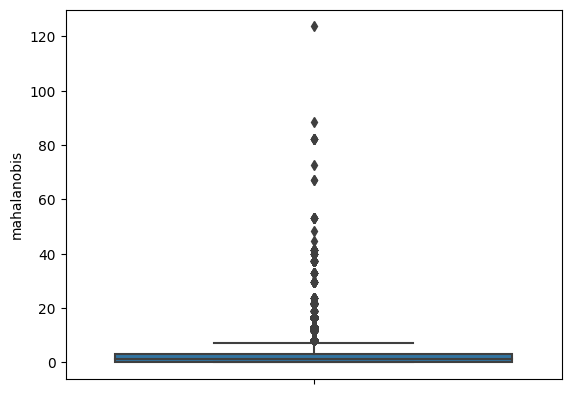

In [168]:
sns.boxplot(y=mahalanobis_rooms_bedrooms_train.mahalanobis)

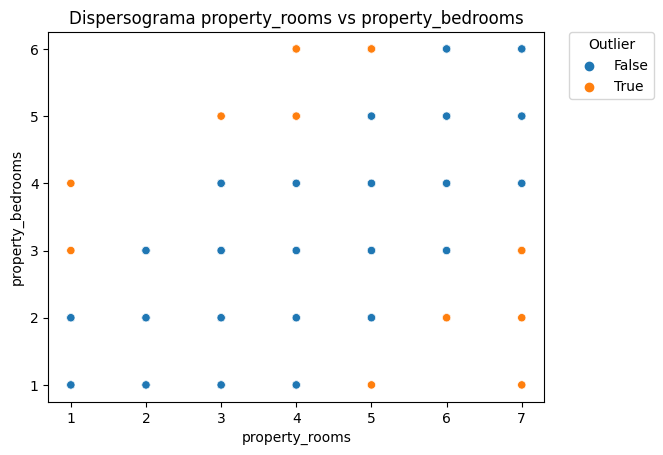

Los outliers para mahalanobis con un umbral de 35 son: 146. Constituyen el 0% de los datos


In [169]:
umbral = 35
create_scattergram(mahalanobis_rooms_bedrooms_train, 'property_rooms', 'property_bedrooms', umbral)

print(
    f"Los outliers para mahalanobis con un umbral de {umbral} son: {len(mahalanobis_rooms_bedrooms_train[mahalanobis_rooms_bedrooms_train['mahalanobis'] > umbral])}. Constituyen el {(len(mahalanobis_rooms_bedrooms_train[mahalanobis_rooms_bedrooms_train['mahalanobis'] > umbral]) * 100) // len(ds_train)}% de los datos")

<AxesSubplot: ylabel='mahalanobis'>

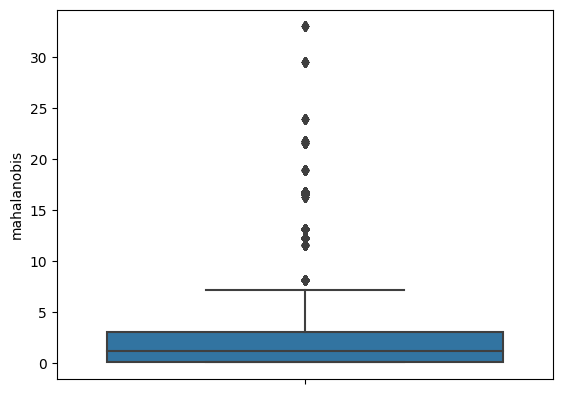

In [170]:
sns.boxplot(y=mahalanobis_rooms_bedrooms_train[mahalanobis_rooms_bedrooms_train['mahalanobis'] < umbral].mahalanobis)

In [171]:
mahalanobis_rooms_bedrooms_train[mahalanobis_rooms_bedrooms_train['mahalanobis'] > umbral]

property_rooms  property_bedrooms  mahalanobis
336275             4.0                5.0    40.026718
401390             7.0                3.0    37.201270
385681             7.0                3.0    37.201270
440036             6.0                2.0    41.488175
154495             6.0                2.0    41.488175
...                ...                ...          ...
33267              7.0                3.0    37.201270
366671             7.0                3.0    37.201270
392466             6.0                2.0    41.488175
239955             7.0                3.0    37.201270
327377             7.0                3.0    37.201270

[146 rows x 3 columns]

In [172]:
# Train

indice_outlier_train = mahalanobis_rooms_bedrooms_train[mahalanobis_rooms_bedrooms_train['mahalanobis'] > umbral].index
ds_train.drop(indice_outlier_train, inplace=True)
print(f"Se han eliminado: {len(indice_outlier_train)} registros en train")

# Test

indice_outlier_test = mahalanobis_rooms_bedrooms_test[mahalanobis_rooms_bedrooms_test['mahalanobis'] > umbral].index
ds_test.drop(indice_outlier_test, inplace=True)
print(f"Se han eliminado: {len(indice_outlier_test)} registros en test")

Se han eliminado: 146 registros en train
Se han eliminado: 38 registros en test


Dispersograma sin los outliers mencionados


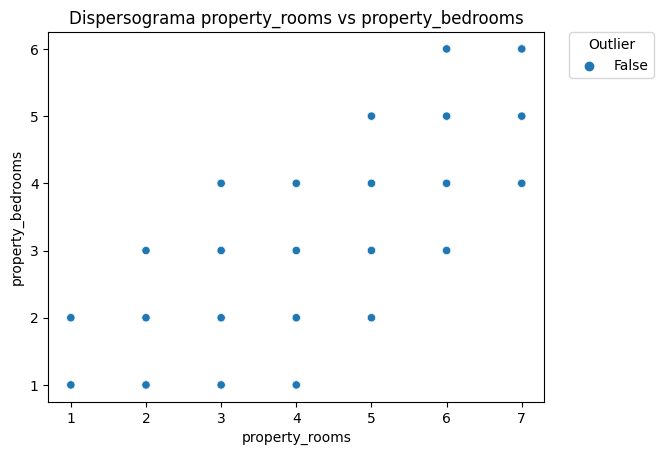

In [173]:
print(f"Dispersograma sin los outliers mencionados")
create_scattergram(mahalanobis_rooms_bedrooms_test[mahalanobis_rooms_bedrooms_test.mahalanobis < umbral],
                   'property_rooms',
                   'property_bedrooms', umbral)

**Analisis entre superficie total y superificie cubierta de valores atipicos**

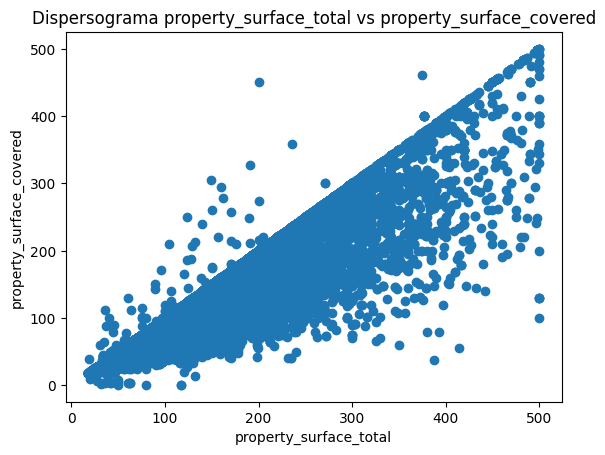

In [174]:
create_scatter_plot(ds_train, 'property_surface_total', 'property_surface_covered')

In [175]:
mahalanobis_surfaces_train = calculate_mahalanobis_distance(ds_train, 'property_surface_total',
                                                            'property_surface_covered')
mahalanobis_surfaces_test = calculate_mahalanobis_distance(ds_test, 'property_surface_total',
                                                           'property_surface_covered')

mahalanobis_surfaces_train.head()

property_surface_total  property_surface_covered  mahalanobis
354662                    58.0                      56.0     0.219989
436534                    91.0                      80.0     0.007571
303074                    80.0                      75.0     0.076757
102759                    67.0                      67.0     0.253383
415231                    52.0                      52.0     0.329538

<AxesSubplot: ylabel='mahalanobis'>

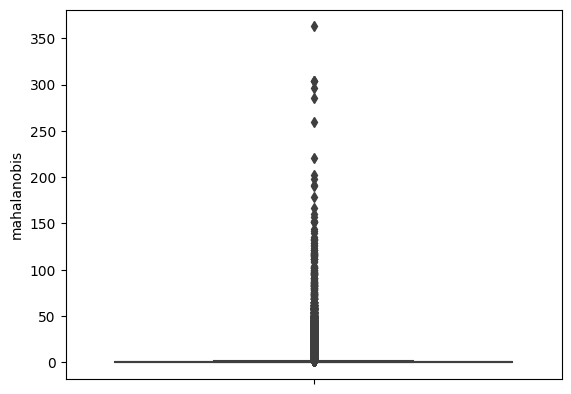

In [176]:
sns.boxplot(y=mahalanobis_surfaces_train.mahalanobis)

In [177]:
mahalanobis_surfaces_train.isna().sum()

property_surface_total      0
property_surface_covered    0
mahalanobis                 0
dtype: int64

In [178]:
#Defino umbral
umbral = 175  # elegimos este umbral de varias pruebas hasta llegar a un grafico de dispersion razonable

#Observaciones anómalas
mahalanobis_surfaces_train[mahalanobis_surfaces_train['mahalanobis'] > umbral]

property_surface_total  property_surface_covered  mahalanobis
52066                    380.0                      80.0   202.228801
275735                   432.0                     144.0   178.623077
121279                   500.0                     130.0   304.276538
450430                   442.0                     140.0   197.840201
138208                   500.0                     100.0   362.846677
412681                   393.0                      80.0   220.839760
61175                    500.0                     200.0   190.335241
393711                   414.0                      56.0   295.795158
310407                   388.0                      38.0   285.741563
97083                    500.0                     130.0   304.276538
97055                    500.0                     130.0   304.276538
104359                   200.0                     450.0   259.214749
430838                   350.0                      60.0   191.281796

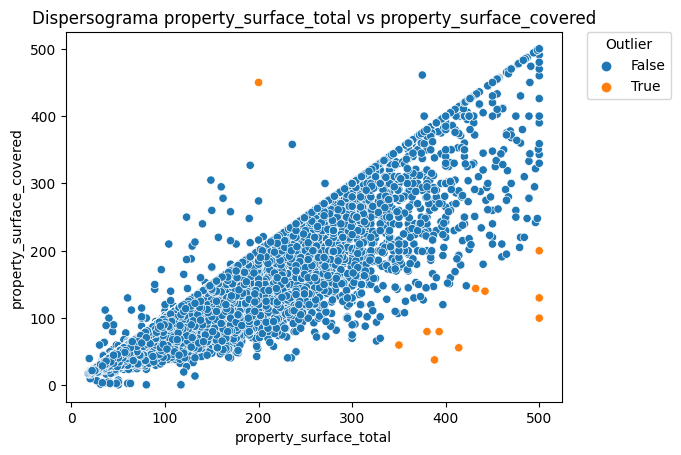

In [179]:
create_scattergram(mahalanobis_surfaces_train, 'property_surface_total', 'property_surface_covered', umbral)

In [180]:
# Train

indice_outlier_train = mahalanobis_surfaces_train[mahalanobis_surfaces_train['mahalanobis'] > umbral].index
ds_train.drop(indice_outlier_train, inplace=True)
print(f"Se han eliminado: {len(indice_outlier_train)} registros en train")

# Test

indice_outlier_test = mahalanobis_surfaces_test[mahalanobis_surfaces_test['mahalanobis'] > umbral].index
ds_test.drop(indice_outlier_test, inplace=True)
print(f"Se han eliminado: {len(indice_outlier_test)} registros en test")

Se han eliminado: 13 registros en train
Se han eliminado: 5 registros en test


Dispersograma sin los outliers mencionados


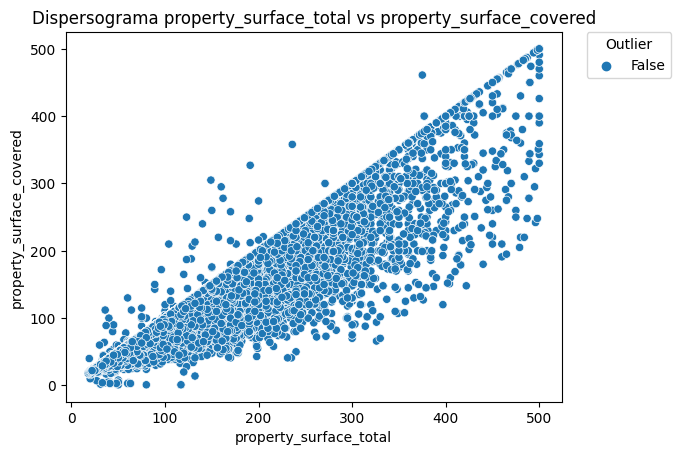

In [181]:
print(f"Dispersograma sin los outliers mencionados")
create_scattergram(mahalanobis_surfaces_train[mahalanobis_surfaces_train.mahalanobis < umbral],
                   'property_surface_total',
                   'property_surface_covered', umbral)

**Analisis entre latitud y logitud de valores atipicos**

In [182]:
mahalanobis_lat_long_train = calculate_mahalanobis_distance(ds_train, 'latitud', 'longitud')
mahalanobis_lat_long_test = calculate_mahalanobis_distance(ds_test, 'latitud', 'longitud')

In [183]:
#Defino umbral
umbral = 1  # elegimos este umbral de varias pruebas hasta llegar a un grafico de dispersion razonable

#Observaciones anómalas
print(
    f"El mínimo según el umbral es de: {mahalanobis_lat_long_train[mahalanobis_lat_long_train['mahalanobis'] > umbral]['mahalanobis'].min()}")
mahalanobis_lat_long_train[mahalanobis_lat_long_train['mahalanobis'] > umbral]

El mínimo según el umbral es de: 144.80903570122638


latitud   longitud  mahalanobis
226093 -33.081030 -68.468140  1240.152522
220851 -27.581620 -56.682310  1760.154279
190823 -31.291586 -64.292297   799.178595
10486  -41.163826 -71.438923  3330.986644
234893 -27.631190 -55.496357  1788.194797
...           ...        ...          ...
57097  -34.128668 -63.376624   286.268540
107791 -33.762758 -61.966286   168.718076
131184 -31.418031 -64.506336   798.995957
58773  -31.670423 -60.764403   372.358170
102563 -32.962151 -60.646585   153.768417

[85 rows x 3 columns]

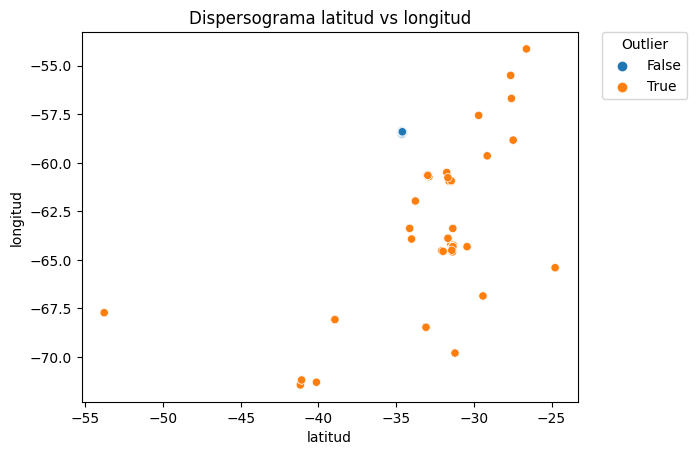

El grafico muestra 85 outliers
El mínimo según el umbral es de: 144.80903570122638


In [184]:
create_scattergram(mahalanobis_lat_long_train, 'latitud', 'longitud', umbral)
print(
    f"El grafico muestra {len(mahalanobis_lat_long_train[mahalanobis_lat_long_train['mahalanobis'] > umbral])} outliers")
print(
    f"El mínimo según el umbral es de: {mahalanobis_lat_long_train[mahalanobis_lat_long_train['mahalanobis'] > umbral]['mahalanobis'].min()}")

Dispersograma sin los outliers mencionados


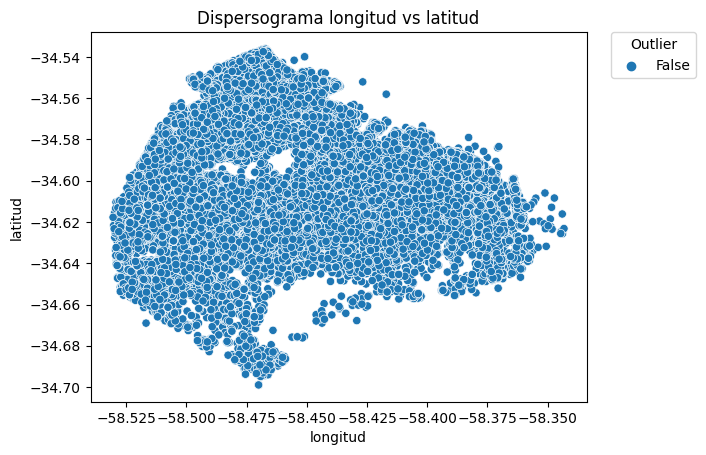

In [185]:
print("Dispersograma sin los outliers mencionados")
create_scattergram(mahalanobis_lat_long_train[mahalanobis_lat_long_train.mahalanobis < umbral], 'longitud', 'latitud',
                   umbral)

In [186]:
# Train

indice_outlier_train = mahalanobis_lat_long_train[mahalanobis_lat_long_train['mahalanobis'] > umbral].index
ds_train.drop(indice_outlier_train, inplace=True)
print(f"Se han eliminado: {len(indice_outlier_train)} registros en train")

# Test


indice_outlier_test = mahalanobis_lat_long_test[mahalanobis_lat_long_test['mahalanobis'] > umbral].index
ds_test.drop(indice_outlier_test, inplace=True)
print(f"Se han eliminado: {len(indice_outlier_test)} registros en test")

Se han eliminado: 85 registros en train
Se han eliminado: 6733 registros en test


In [187]:
ds_train.place_l3.isna().sum()

40

In [188]:
ds_train.dropna(subset='place_l3', inplace=True)
ds_train.place_l3.isna().sum()

0

**Analisis entre superficie total y precio**

In [189]:
mahalanobis_price_surface_train = calculate_mahalanobis_distance(ds_train, 'property_surface_total', 'property_price')
mahalanobis_price_surface_test = calculate_mahalanobis_distance(ds_test, 'property_surface_total', 'property_price')

mahalanobis_price_surface_train['mahalanobis'].describe()

count    73117.000000
mean         1.848135
std         11.707327
min          0.000059
25%          0.180423
50%          0.397930
75%          0.689193
max       1681.184127
Name: mahalanobis, dtype: float64

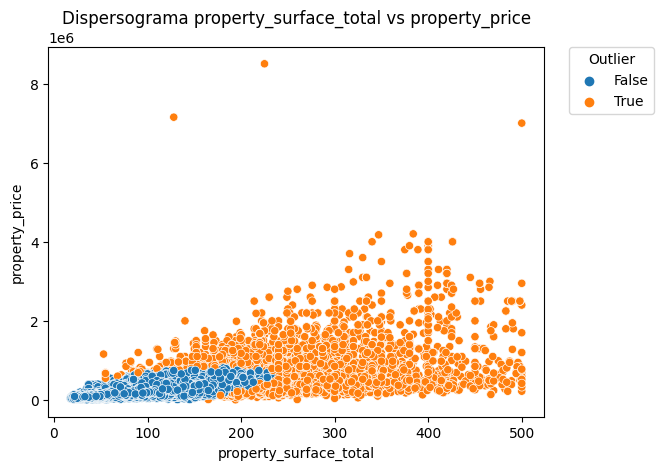

El grafico muestra 4717 outliers
El mínimo según el umbral es de: 5.001569735446409
Los outliers representan un 6.451304074291889%


In [190]:
umbral = 5
create_scattergram(mahalanobis_price_surface_train, 'property_surface_total', 'property_price', umbral)
print(
    f"El grafico muestra {len(mahalanobis_price_surface_train[mahalanobis_price_surface_train['mahalanobis'] > umbral])} outliers")
print(
    f"El mínimo según el umbral es de: {mahalanobis_price_surface_train[mahalanobis_price_surface_train['mahalanobis'] > umbral]['mahalanobis'].min()}")
print(
    f"Los outliers representan un {len(mahalanobis_price_surface_train[mahalanobis_price_surface_train['mahalanobis'] > umbral]) * 100 / len(ds_train)}%")

<AxesSubplot: ylabel='mahalanobis'>

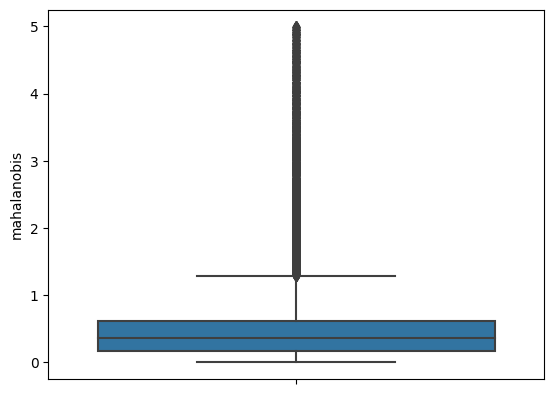

In [191]:
sns.boxplot(y=mahalanobis_price_surface_train[mahalanobis_price_surface_train['mahalanobis'] < umbral].mahalanobis)

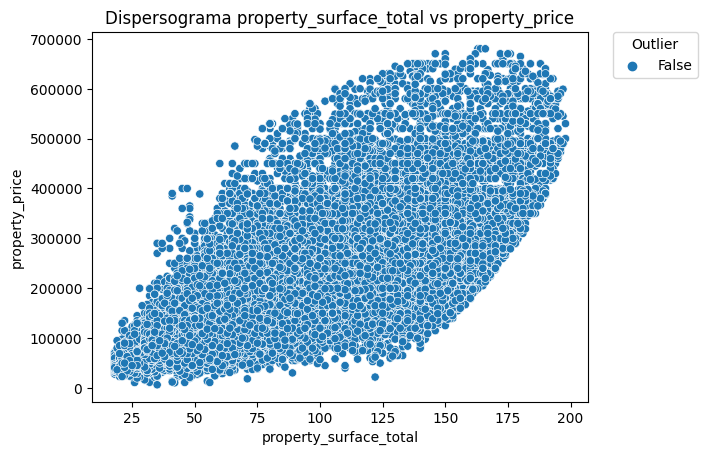

In [192]:
create_scattergram(mahalanobis_price_surface_train[mahalanobis_price_surface_train.mahalanobis < 3],
                   'property_surface_total',
                   'property_price', 3)

In [193]:
mahalanobis_price_surface_train[
    'price_m2'] = mahalanobis_price_surface_train.property_price / mahalanobis_price_surface_train.property_surface_total

mahalanobis_price_surface_test[
    'price_m2'] = mahalanobis_price_surface_test.property_price / mahalanobis_price_surface_test.property_surface_total

cantidad de datos del ds: 73117
outliers encontrados para los price_m2: 3359
hay 4% de outliers de price_m2 sobre el ds
limit sup: 4285.123966942148, limite inf: 324.793388429752


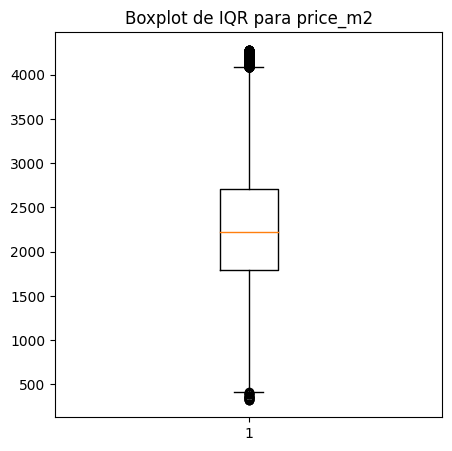

cantidad de datos del ds: 10928
outliers encontrados para los price_m2: 374
hay 3% de outliers de price_m2 sobre el ds
limit sup: 4082.8424334656415, limite inf: 575.1075721309078


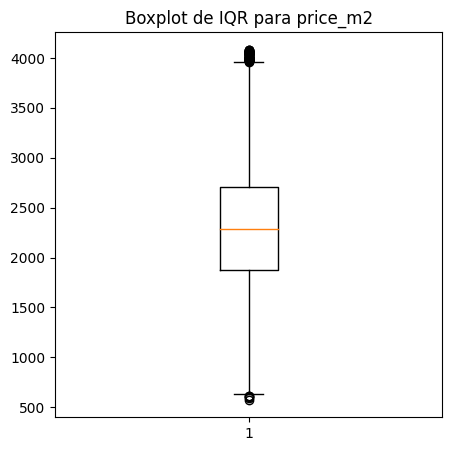

In [194]:
calculate_univariate_iqr(mahalanobis_price_surface_train['price_m2'], mahalanobis_price_surface_train)
calculate_univariate_iqr(mahalanobis_price_surface_test['price_m2'], mahalanobis_price_surface_test)

Hay 3336 registros en train por encima del límite superior en train (4.562550432867869)
Hay 23 registros en train por debajo del límite inferior en train  (0.031456432840515886)
Hay 296 registros en train por encima del límite superior en train (0.4048306139475088)%
Hay 3 registros en train por debajo del límite inferior en train  (0.004103012979197724%)


Text(0.5, 1.0, 'Distribución sin outliers')

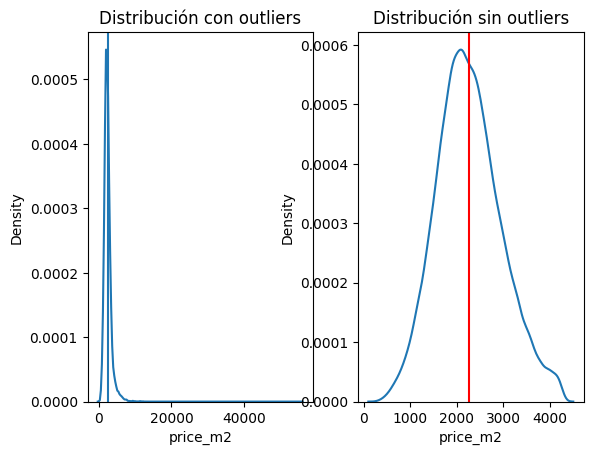

In [195]:
limites = boxplot_outliers_edges(mahalanobis_price_surface_train['price_m2'])
limite_inf = limites[0]
limite_sup = limites[1]
outliers_sup_price_m2_train = mahalanobis_price_surface_train[(mahalanobis_price_surface_train.price_m2 > limite_sup)]
outliers_inf_price_m2_train = mahalanobis_price_surface_train[(mahalanobis_price_surface_train.price_m2 < limite_inf)]

outliers_sup_price_m2_test = mahalanobis_price_surface_test[(mahalanobis_price_surface_test.price_m2 > limite_sup)]
outliers_inf_price_m2_test = mahalanobis_price_surface_test[(mahalanobis_price_surface_test.price_m2 < limite_inf)]

print(
    f"Hay {len(outliers_sup_price_m2_train)} registros en train por encima del límite superior en train ({len(outliers_sup_price_m2_train) * 100 / len(ds_train)})")
print(
    f"Hay {len(outliers_inf_price_m2_train)} registros en train por debajo del límite inferior en train  ({len(outliers_inf_price_m2_train) * 100 / len(ds_train)})")

print(
    f"Hay {len(outliers_sup_price_m2_test)} registros en train por encima del límite superior en train ({len(outliers_sup_price_m2_test) * 100 / len(ds_train)})%")
print(
    f"Hay {len(outliers_inf_price_m2_test)} registros en train por debajo del límite inferior en train  ({len(outliers_inf_price_m2_test) * 100 / len(ds_train)}%)")

fig, axs = plt.subplots(ncols=2)

ds_plot = mahalanobis_price_surface_train[
    (mahalanobis_price_surface_train.price_m2 > limite_inf) & (mahalanobis_price_surface_train.price_m2 < limite_sup)]

sns.kdeplot(mahalanobis_price_surface_train.price_m2, ax=axs[0])
sns.kdeplot(ds_plot.price_m2, ax=axs[1])

axs[0].axvline(mahalanobis_price_surface_train.price_m2.mean())
axs[1].axvline(ds_plot.price_m2.mean(), color='red')

axs[0].set_title("Distribución con outliers")
axs[1].set_title("Distribución sin outliers")

In [196]:
# Train

ds_train.drop(outliers_sup_price_m2_train.index, inplace=True)
print(f"Se han eliminado: {len(outliers_sup_price_m2_train)} registros en train")

# Test

ds_test.drop(outliers_sup_price_m2_test.index, inplace=True)
print(f"Se han eliminado: {len(outliers_sup_price_m2_test)} registros en test")

Se han eliminado: 3336 registros en train
Se han eliminado: 296 registros en test


In [197]:
# Train

ds_train.drop(outliers_inf_price_m2_train.index, inplace=True)
print(f"Se han eliminado: {len(outliers_inf_price_m2_train)} registros en train")

# Test

ds_test.drop(outliers_inf_price_m2_test.index, inplace=True)
print(f"Se han eliminado: {len(outliers_inf_price_m2_test)} registros en test")

Se han eliminado: 23 registros en train
Se han eliminado: 3 registros en test


#### LOF

In [198]:
def create_scores_based_on_training(dataset, col1, col2):
    #Conjunto de entrenamiento
    dataset = dataset[~(dataset[f'{col1}'].isna())]  # que hago con los NAN? Para la preddicion necesito sacarlos.
    dataset = dataset[~(dataset[f'{col2}'].isna())]

    X = dataset[[f'{col1}', f'{col2}']].values

    #Creo el clasificador
    clf = LocalOutlierFactor(n_neighbors=20)

    #Genero prediccion
    y_pred = clf.fit_predict(X)

    #Guardo los scores
    dataset['scores'] = clf.negative_outlier_factor_

    return dataset.copy()

In [199]:
def create_dispersion_diagram(dataset, col1, col2):
    new_lof_ds = dataset.copy()
    new_lof_ds['target'] = 0
    new_col_ds = new_lof_ds
    new_col_ds[[f'{col1}', f'{col2}', 'target']]

    sns.scatterplot(x=new_col_ds[f'{col1}'], y=new_col_ds[f'{col2}'], hue=new_col_ds['target'])
    plt.title(f'Diagrama de Dispersión {col1} vs {col2}')
    plt.show()
    return new_lof_ds

In [200]:
def create_lof_graph(dataset, col1, col2):
    #Calculo radio para plotear score
    radius = (dataset.scores.max() - dataset.scores) / (dataset.scores.max() - dataset.scores.min())

    #Grafico LOF
    plt.figure(figsize=(10, 10))
    plt.title("Local Outlier Factor (LOF)")
    plt.scatter(dataset[f'{col1}'].values, dataset[f'{col2}'].values, edgecolor='grey', s=30, label='Datos',
                facecolors='none')
    plt.scatter(dataset[f'{col1}'].values, dataset[f'{col2}'].values, s=1300 * radius, edgecolors='red',
                facecolors='none', label='Outlier scores')
    legend = plt.legend(loc='upper left')
    legend.legendHandles[0]._sizes = [10]
    legend.legendHandles[1]._sizes = [20]
    plt.xlabel(f'{col1}')
    plt.ylabel(f'{col2}')
    plt.show()

**Analisis de outliers para ambientes y habitaciones**

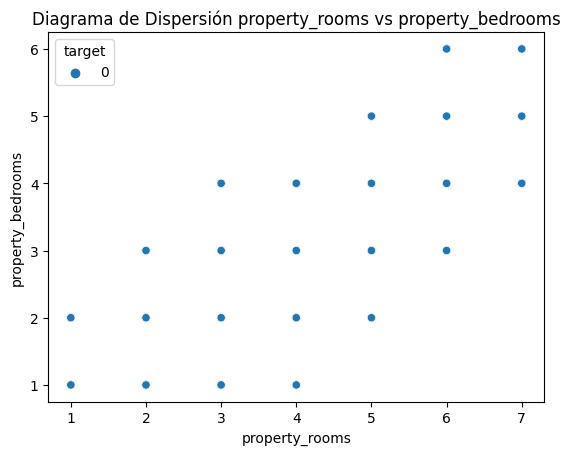

In [201]:
rooms_bedrooms_lof_df = create_dispersion_diagram(ds_train, 'property_rooms', 'property_bedrooms')

In [202]:
new_rooms_bedrooms_lof_df = create_scores_based_on_training(rooms_bedrooms_lof_df, 'property_rooms',
                                                            'property_bedrooms')
new_rooms_bedrooms_lof_df

id start_date                      end_date  \
354662  SwXZaNyfO0CbXXW59oSp2g== 2021-03-31 2021-05-01 00:00:00.000000000   
436534  tOlObh+4Rly3GF+Lyd2IeA== 2021-08-25 2021-11-07 07:43:19.924328415   
303074  kvnbG7HQLUTqcUoAq4zRTg== 2021-08-26 2021-10-14 00:00:00.000000000   
102759  xLB5HBPzxU8HoVLjDvZfQw== 2021-05-28 2021-06-03 00:00:00.000000000   
415231  uH4bX2cowY0mYdrH8DZaMw== 2021-09-08 2021-09-26 00:00:00.000000000   
...                          ...        ...                           ...   
12671   86gP4tmpxEMsBNAuWdfDnA== 2021-07-06 2021-10-03 00:00:00.000000000   
167893  cC/pUvA7i8tuGMsfIGDa/Q== 2021-04-30 2021-05-01 00:00:00.000000000   
284368  rMywGKyNCLFpLxYMy0un0A== 2021-02-24 2021-05-10 00:00:00.000000000   
215843  UcfWmxaUJukmCYgaGzCD9A== 2021-12-22 2022-01-27 00:00:00.000000000   
408447  P2XfNVd5Sq0aRUowpHHkPg== 2021-03-05 2021-03-08 00:00:00.000000000   

          latitud   longitud           place_l3 property_type  property_rooms  \
354662 -34.635768 -58.494408           Floresta            PH             2.0   
436534 -34.569809 -58.447177         Colegiales  Departamento             4.0   
303074 -34.623384 -58.436355          Caballito  Departamento             4.0   
102759 -34.590503 -58.408862            Palermo  Departamento             4.0   
415231 -34.628205 -58.374628           Barracas  Departamento             3.0   
...           ...        ...                ...           ...             ...   
12671  -34.607065 -58.514039       Villa Devoto  Departamento             3.0   
167893 -34.604499 -58.461743           Paternal  Departamento             1.0   
284368 -34.606385 -58.457973  Parque Centenario  Departamento             2.0   
215843 -34.609607 -58.419964            Almagro            PH             4.0   
408447 -34.601112 -58.399817          Balvanera  Departamento             1.0   

        property_bedrooms  property_surface_total  property_surface_covered  \
354662                1.0                    58.0                      56.0   
436534                3.0                    91.0                      80.0   
303074                3.0                    80.0                      75.0   
102759                3.0                    67.0                      67.0   
415231                2.0                    52.0                      52.0   
...                   ...                     ...                       ...   
12671                 2.0                    65.0                      65.0   
167893                1.0                    37.0                      36.0   
284368                1.0                    45.0                      45.0   
215843                3.0                   241.0                     206.0   
408447                1.0                    33.0                      29.0   

        property_price                                     property_title  \
354662        107000.0   VENTA PH FLORESTA DOS AMBIENTES APTO PROFESIONAL   
436534        270000.0  Departamento venta 4 ambientes cochera baulera...   
303074        170000.0                           Departamento - Caballito   
102759        212000.0                             Departamento - Palermo   
415231        115200.0    VENTA DEPARTAMENTO DE 3 AMBIENTES  en SAN TELMO   
...                ...                                                ...   
12671         180000.0                        Departamento - Villa Devoto   
167893         69900.0     Monoambiente con Balcón Exc Vista y Ubicación!   
284368         94784.0        INCREIBLE 2 AMB EN CABALLITO AMPLIA FINANC!   
215843        234900.0  PH 4 Ambientes mas dep, Terraza, Quincho y Pla...   
408447         85000.0  Alucinante Departamento Mono ambiente a Estren...   

        target  scores  
354662       0    -1.0  
436534       0    -1.0  
303074       0    -1.0  
102759       0    -1.0  
415231       0    -1.0  
...        ...     ...  
12671        0    -1.0  
167893       0    -1.0  
284368       0    -1.0  
215843  

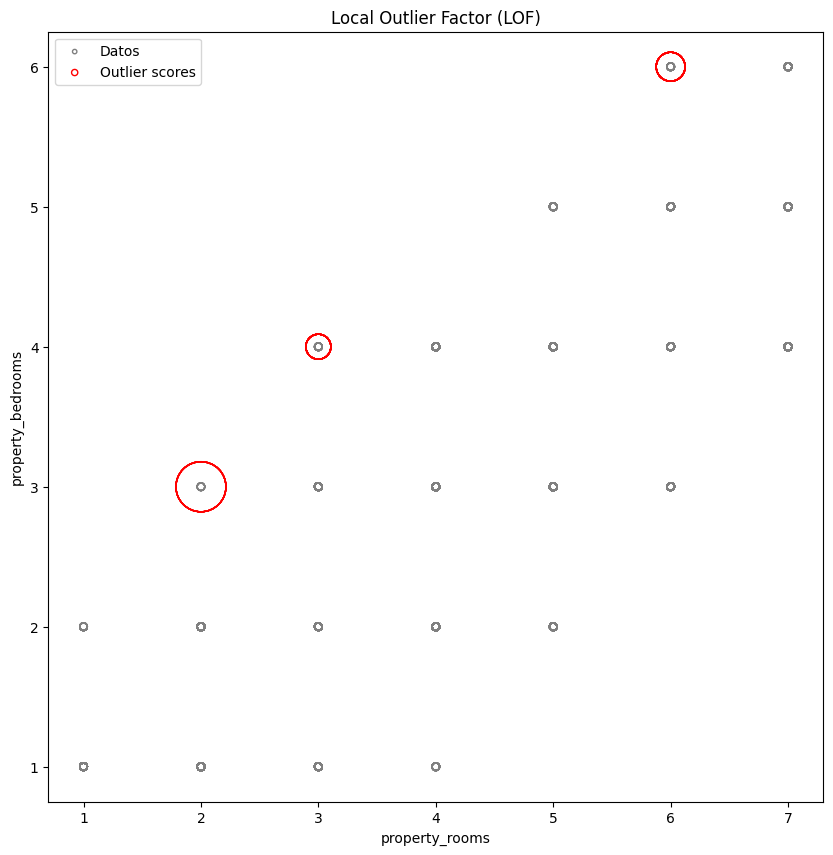

In [203]:
create_lof_graph(new_rooms_bedrooms_lof_df, 'property_rooms', 'property_bedrooms')

**Analisis de outliers para superficie total y superficie cubierta**

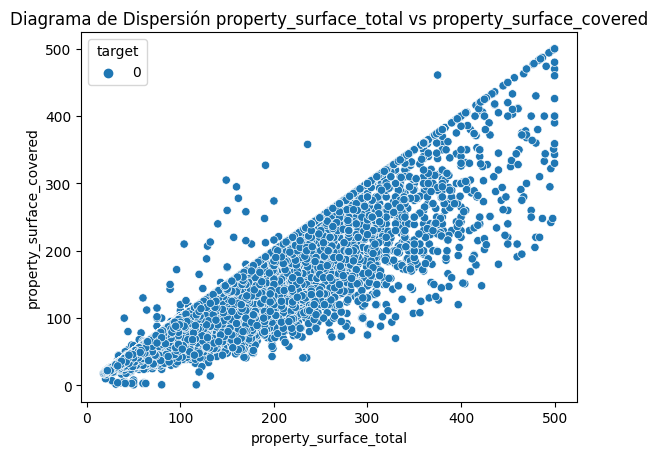

In [204]:
total_covered_lof_df = create_dispersion_diagram(ds_train, 'property_surface_total',
                                                 'property_surface_covered')

In [205]:
new_total_covered_lof_df = create_scores_based_on_training(total_covered_lof_df, 'property_surface_total',
                                                           'property_surface_covered')
new_total_covered_lof_df

id start_date                      end_date  \
354662  SwXZaNyfO0CbXXW59oSp2g== 2021-03-31 2021-05-01 00:00:00.000000000   
436534  tOlObh+4Rly3GF+Lyd2IeA== 2021-08-25 2021-11-07 07:43:19.924328415   
303074  kvnbG7HQLUTqcUoAq4zRTg== 2021-08-26 2021-10-14 00:00:00.000000000   
102759  xLB5HBPzxU8HoVLjDvZfQw== 2021-05-28 2021-06-03 00:00:00.000000000   
415231  uH4bX2cowY0mYdrH8DZaMw== 2021-09-08 2021-09-26 00:00:00.000000000   
...                          ...        ...                           ...   
12671   86gP4tmpxEMsBNAuWdfDnA== 2021-07-06 2021-10-03 00:00:00.000000000   
167893  cC/pUvA7i8tuGMsfIGDa/Q== 2021-04-30 2021-05-01 00:00:00.000000000   
284368  rMywGKyNCLFpLxYMy0un0A== 2021-02-24 2021-05-10 00:00:00.000000000   
215843  UcfWmxaUJukmCYgaGzCD9A== 2021-12-22 2022-01-27 00:00:00.000000000   
408447  P2XfNVd5Sq0aRUowpHHkPg== 2021-03-05 2021-03-08 00:00:00.000000000   

          latitud   longitud           place_l3 property_type  property_rooms  \
354662 -34.635768 -58.494408           Floresta            PH             2.0   
436534 -34.569809 -58.447177         Colegiales  Departamento             4.0   
303074 -34.623384 -58.436355          Caballito  Departamento             4.0   
102759 -34.590503 -58.408862            Palermo  Departamento             4.0   
415231 -34.628205 -58.374628           Barracas  Departamento             3.0   
...           ...        ...                ...           ...             ...   
12671  -34.607065 -58.514039       Villa Devoto  Departamento             3.0   
167893 -34.604499 -58.461743           Paternal  Departamento             1.0   
284368 -34.606385 -58.457973  Parque Centenario  Departamento             2.0   
215843 -34.609607 -58.419964            Almagro            PH             4.0   
408447 -34.601112 -58.399817          Balvanera  Departamento             1.0   

        property_bedrooms  property_surface_total  property_surface_covered  \
354662                1.0                    58.0                      56.0   
436534                3.0                    91.0                      80.0   
303074                3.0                    80.0                      75.0   
102759                3.0                    67.0                      67.0   
415231                2.0                    52.0                      52.0   
...                   ...                     ...                       ...   
12671                 2.0                    65.0                      65.0   
167893                1.0                    37.0                      36.0   
284368                1.0                    45.0                      45.0   
215843                3.0                   241.0                     206.0   
408447                1.0                    33.0                      29.0   

        property_price                                     property_title  \
354662        107000.0   VENTA PH FLORESTA DOS AMBIENTES APTO PROFESIONAL   
436534        270000.0  Departamento venta 4 ambientes cochera baulera...   
303074        170000.0                           Departamento - Caballito   
102759        212000.0                             Departamento - Palermo   
415231        115200.0    VENTA DEPARTAMENTO DE 3 AMBIENTES  en SAN TELMO   
...                ...                                                ...   
12671         180000.0                        Departamento - Villa Devoto   
167893         69900.0     Monoambiente con Balcón Exc Vista y Ubicación!   
284368         94784.0        INCREIBLE 2 AMB EN CABALLITO AMPLIA FINANC!   
215843        234900.0  PH 4 Ambientes mas dep, Terraza, Quincho y Pla...   
408447         85000.0  Alucinante Departamento Mono ambiente a Estren...   

        target    scores  
354662       0 -1.000000  
436534       0 -1.000000  
303074       0 -1.000000  
102759       0 -1.000000  
415231       0 -1.000000  
...        ...       ...  
12671        0 -1.000000  
167893       0 -1.000000  
284368       0 

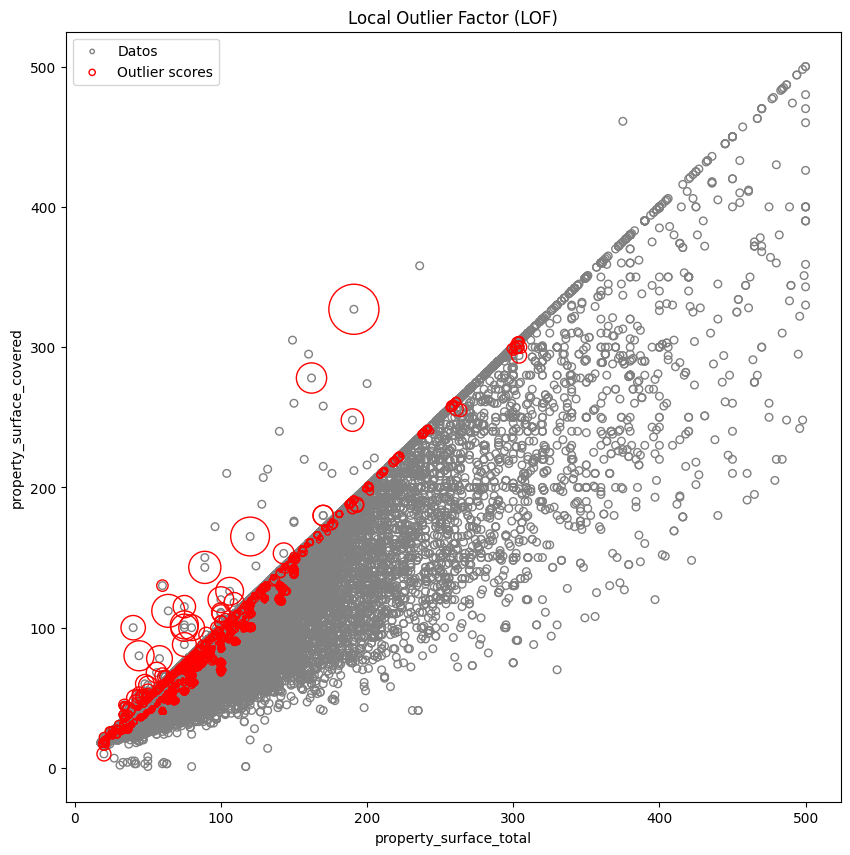

In [206]:
create_lof_graph(new_total_covered_lof_df, 'property_surface_total', 'property_surface_covered')

### Reduccion de la Dimensionalidad

#### Analisis PCA

In [207]:
# Train
ds_train.drop(columns=['id'], inplace=True)

# Test
ds_test.drop(columns=['id'], inplace=True)

In [208]:
from sklearn.preprocessing import StandardScaler

ds_reducido = ds_train.drop(
    ['start_date', 'end_date', 'place_l3', 'property_title', 'property_type', 'property_price'], axis=1)
ds_reducido

latitud   longitud  property_rooms  property_bedrooms  \
354662 -34.635768 -58.494408             2.0                1.0   
436534 -34.569809 -58.447177             4.0                3.0   
303074 -34.623384 -58.436355             4.0                3.0   
102759 -34.590503 -58.408862             4.0                3.0   
415231 -34.628205 -58.374628             3.0                2.0   
...           ...        ...             ...                ...   
12671  -34.607065 -58.514039             3.0                2.0   
167893 -34.604499 -58.461743             1.0                1.0   
284368 -34.606385 -58.457973             2.0                1.0   
215843 -34.609607 -58.419964             4.0                3.0   
408447 -34.601112 -58.399817             1.0                1.0   

        property_surface_total  property_surface_covered  
354662                    58.0                      56.0  
436534                    91.0                      80.0  
303074                    80.0                      75.0  
102759                    67.0                      67.0  
415231                    52.0                      52.0  
...                        ...                       ...  
12671                     65.0                      65.0  
167893                    37.0                      36.0  
284368                    45.0                      45.0  
215843                   241.0                     206.0  
408447                    33.0                      29.0  

[69758 rows x 6 columns]

In [209]:
ds_reducido_normalizado = pd.DataFrame(StandardScaler().fit_transform(ds_reducido), columns=ds_reducido.columns)
ds_reducido_normalizado

latitud  longitud  property_rooms  property_bedrooms  \
0     -1.491025 -1.455098       -0.583438          -0.887796   
1      1.007789 -0.190260        1.039316           1.235123   
2     -1.021850  0.099565        1.039316           1.235123   
3      0.223786  0.835806        1.039316           1.235123   
4     -1.204520  1.752596        0.227939           0.173664   
...         ...       ...             ...                ...   
69753 -0.403643 -1.980803        0.227939           0.173664   
69754 -0.306428 -0.580333       -1.394815          -0.887796   
69755 -0.377872 -0.479373       -0.583438          -0.887796   
69756 -0.499952  0.538498        1.039316           1.235123   
69757 -0.178104  1.078033       -1.394815          -0.887796   

       property_surface_total  property_surface_covered  
0                   -0.395260                 -0.298203  
1                    0.145570                  0.177844  
2                   -0.034707                  0.078668  
3                   -0.247761                 -0.080015  
4                   -0.493593                 -0.377544  
...                       ...                       ...  
69753               -0.280539                 -0.119685  
69754               -0.739425                 -0.694909  
69755               -0.608315                 -0.516392  
69756                2.603888                  2.677093  
69757               -0.804980                 -0.833757  

[69758 rows x 6 columns]

**Replicamos para test las mismas transformaciones**

In [210]:
ds_reducido_test = ds_test.drop(
    ['start_date', 'end_date', 'place_l3', 'property_title', 'property_type', 'property_price'], axis=1)
ds_reducido_test

latitud   longitud  property_rooms  property_bedrooms  \
304746 -34.626705 -58.385174             4.0                3.0   
397245 -34.557145 -58.466550             1.0                1.0   
444049 -34.603738 -58.398443             3.0                2.0   
197361 -34.614708 -58.418004             3.0                2.0   
319023 -34.567463 -58.449964             2.0                1.0   
...           ...        ...             ...                ...   
440789 -34.561818 -58.467789             3.0                2.0   
176385 -34.610377 -58.447886             2.0                1.0   
244015 -34.615916 -58.418322             4.0                3.0   
196485 -34.587055 -58.405742             2.0                1.0   
53734  -34.562337 -58.468009             1.0                1.0   

        property_surface_total  property_surface_covered  
304746                    75.0                      71.0  
397245                    40.0                      40.0  
444049                    81.0                      70.0  
197361                    51.0                      42.0  
319023                    55.0                      40.0  
...                        ...                       ...  
440789                    76.0                      70.0  
176385                    48.0                      41.0  
244015                   100.0                     100.0  
196485                    35.0                      35.0  
53734                     36.0                      30.0  

[10629 rows x 6 columns]

In [211]:
ds_reducido_test_normalizado = pd.DataFrame(StandardScaler().fit_transform(ds_reducido_test),
                                            columns=ds_reducido.columns)
ds_reducido_test_normalizado

latitud  longitud  property_rooms  property_bedrooms  \
0     -1.716870  1.867812        1.141900           1.345208   
1      1.606081 -1.075538       -1.374115          -0.855025   
2     -0.619709  1.387879        0.303228           0.245091   
3     -1.143738  0.680366        0.303228           0.245091   
4      1.113165 -0.475627       -0.535443          -0.855025   
...         ...       ...             ...                ...   
10624  1.382851 -1.120364        0.303228           0.245091   
10625 -0.936875 -0.400466       -0.535443          -0.855025   
10626 -1.201459  0.668857        1.141900           1.345208   
10627  0.177270  1.123860       -0.535443          -0.855025   
10628  1.358054 -1.128310       -1.374115          -0.855025   

       property_surface_total  property_surface_covered  
0                   -0.039366                  0.089261  
1                   -0.666933                 -0.590613  
2                    0.068216                  0.067329  
3                   -0.469698                 -0.546750  
4                   -0.397976                 -0.590613  
...                       ...                       ...  
10624               -0.021436                  0.067329  
10625               -0.523489                 -0.568682  
10626                0.408895                  0.725272  
10627               -0.756585                 -0.700270  
10628               -0.738655                 -0.809927  

[10629 rows x 6 columns]

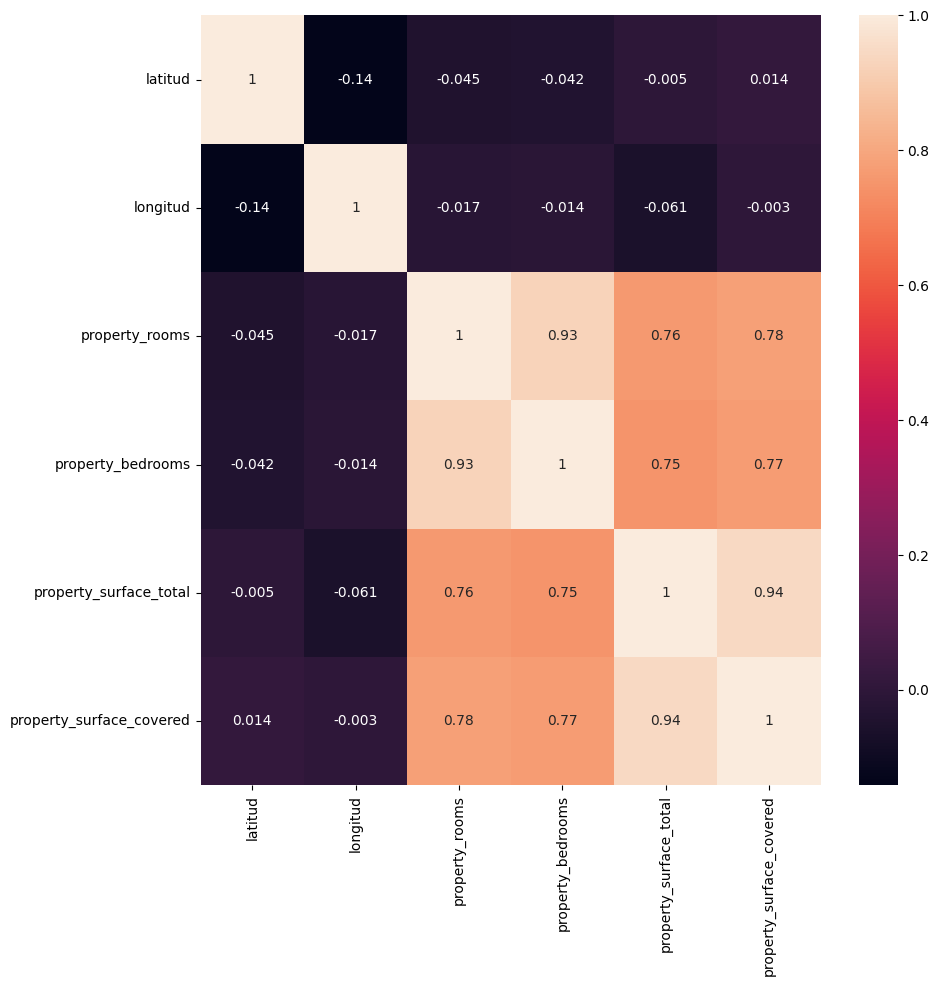

In [212]:
plt.figure(figsize=(10, 10))
ax = sns.heatmap(ds_reducido_normalizado.corr(), annot=True)

In [213]:
ds_reducido_normalizado.shape

(69758, 6)

In [214]:
from sklearn.decomposition import PCA

pca = PCA(n_components=6)
superficie_transformada = pca.fit_transform(ds_reducido_normalizado)

ds_pca = pd.DataFrame(data=superficie_transformada,
                      columns=['cp_1', 'cp_2', 'cp_3', 'cp_4', 'cp_5', 'cp_6'])
ds_pca

cp_1      cp_2      cp_3      cp_4      cp_5      cp_6
0     -1.031693  0.005527  2.081845  0.489162 -0.198333 -0.192583
1      1.284766 -0.782795 -0.558095 -1.059080  0.111042  0.039018
2      1.169536  0.866690  0.668286 -1.042348  0.113693 -0.046948
3      0.951631  0.515055 -0.716666 -1.314167  0.101866 -0.015593
4     -0.250106  2.125807 -0.365010 -0.522259 -0.056050 -0.003907
...         ...       ...       ...       ...       ...       ...
69753  0.042619 -1.081225  1.700695 -0.396541 -0.043822 -0.198133
69754 -1.842714 -0.221717  0.646835  0.432641  0.367864 -0.091503
69755 -1.282014 -0.082876  0.624245  0.202598 -0.211142 -0.110171
69756  3.777228  0.650388 -0.191301  1.524004  0.191300 -0.080404
69757 -1.977616  0.859455 -0.608918  0.343962  0.360675  0.043609

[69758 rows x 6 columns]

In [215]:
varianza_explicada = pca.explained_variance_ratio_
for varianza in varianza_explicada:
    print(round(varianza, 2))

0.58
0.19
0.14
0.07
0.01
0.01


In [216]:
varianza_explicada.cumsum()

array([0.57772829, 0.7685346 , 0.91183373, 0.97909459, 0.99095928,
       1.        ])

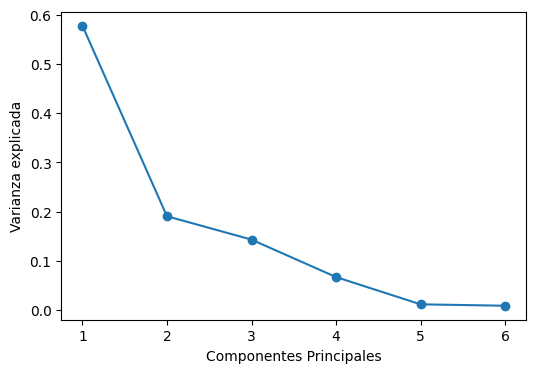

In [217]:
varianza_explicada = pca.explained_variance_ratio_
list_x = list(range(1, len(varianza_explicada) + 1))

plt.figure(figsize=(6, 4))
plt.plot(list_x, varianza_explicada, '-o')
plt.xlabel(r'Componentes Principales')
plt.ylabel('Varianza explicada')
plt.show()

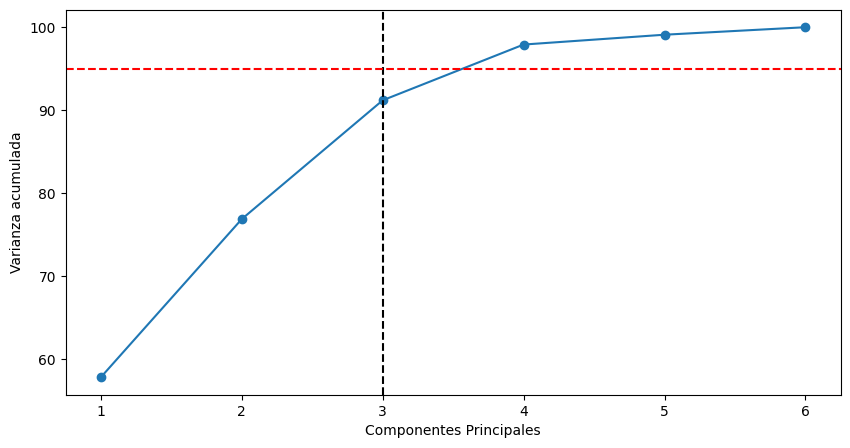

In [218]:
varianza_explicada = pca.explained_variance_ratio_
list_x = list(range(1, len(varianza_explicada) + 1))
k = np.argmax(varianza_explicada.cumsum() * 100 > 95)

plt.figure(figsize=(10, 5))
plt.plot(list_x, varianza_explicada.cumsum() * 100, '-o')
plt.xlabel(r'Componentes Principales')
plt.ylabel('Varianza acumulada')
plt.axvline(x=k, color="k", linestyle="--")
plt.axhline(y=95, color="r", linestyle="--")
plt.show()

In [219]:
ds_pca.drop(columns=['cp_4', 'cp_5', 'cp_6'], inplace=True)
ds_pca.head()

cp_1      cp_2      cp_3
0 -1.031693  0.005527  2.081845
1  1.284766 -0.782795 -0.558095
2  1.169536  0.866690  0.668286
3  0.951631  0.515055 -0.716666
4 -0.250106  2.125807 -0.365010

### Exportamos datasets

In [226]:
ds_test = ds_test.drop(['start_date', 'end_date'], axis=1)

In [229]:
ds_train.to_csv('datasets/tp1-train.csv')
ds_test.to_csv('datasets/tp1-test.csv')